In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [3]:
df_kems = kem_data_process("data/kem_bench_oqs_50_iter_20250214.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     frodo640aes          1       2.174       0.537       0.502   
1     frodo640aes          2       0.387       0.524       0.490   
2     frodo640aes          3       0.382       0.526       0.487   
3     frodo640aes          4       0.398       0.518       0.493   
4     frodo640aes          5       0.376       0.523       0.488   
...           ...        ...         ...         ...         ...   
2595       hqc256         46       5.301      10.677      16.543   
2596       hqc256         47       5.299      10.681      16.554   
2597       hqc256         48       5.303      10.678      16.542   
2598       hqc256         49       5.299      10.693      16.542   
2599       hqc256         50       5.303      10.684      16.545   

      TotalTime(ms)  
0             3.213  
1             1.401  
2             1.395  
3             1.409  
4             1.387  
...             ...  
2595         32.521  
2596         32.534  
2597         32.523  
2598         32.534  
2599         32.532  

[900 rows x 6 columns]

In [4]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_50_iter_20250214.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0    qkd_frodo640aes          1       2.101     102.244     163.630   
1    qkd_frodo640aes          2       0.404     135.830     114.031   
2    qkd_frodo640aes          3       0.410     135.722     114.869   
3    qkd_frodo640aes          4       0.409     134.873     164.858   
4    qkd_frodo640aes          5       0.424     136.064     162.738   
..               ...        ...         ...         ...         ...   
895       qkd_hqc256         46      11.674     159.877     180.713   
896       qkd_hqc256         47      11.688     156.709     179.199   
897       qkd_hqc256         48      11.597     159.011     179.774   
898       qkd_hqc256         49      11.675     157.535     180.851   
899       qkd_hqc256         50      11.610     157.330     182.155   

     TotalTime(ms)  
0          267.975  
1          250.265  
2          251.001  
3          300.140  
4          299.226  
..             ...  
895        352.264  
896        347.596  
897        350.382  
898        350.061  
899        351.095  

[900 rows x 6 columns]

In [5]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [6]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [7]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                     48            0.137           0.003   
bikel3                     48            0.382           0.006   
bikel5                     48            0.900           0.005   
frodo1344aes               48            0.582           0.019   
frodo1344shake             48            2.465           0.067   
frodo640aes                48            0.381           0.006   
frodo640shake              48            1.381           0.005   
frodo976aes                48            0.523           0.006   
frodo976shake              48            1.482           0.211   
hqc128                     48            0.949           0.002   
hqc192                     48            2.897           0.006   
hqc256                     48            5.297           0.005   
kyber1024                  48            0.013           0.000   
kyber512                   48            0.006           0.000   
kyber768                   48            0.009           0.001   
mlkem1024                  48            0.013           0.001   
mlkem512                   48            0.006           0.000   
mlkem768                   48            0.010           0.000   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.133           0.143            0.024   
bikel3                   0.374           0.404            0.054   
bikel5                   0.892           0.922            0.107   
frodo1344aes             0.569           0.624            0.756   
frodo1344shake           2.437           2.787            3.214   
frodo640aes              0.374           0.401            0.522   
frodo640shake            1.374           1.398            1.487   
frodo976aes              0.516           0.541            0.692   
frodo976shake            1.355           1.943            1.574   
hqc128                   0.946           0.955            1.920   
hqc192                   2.888           2.909            5.876   
hqc256                   5.289           5.318           10.672   
kyber1024                0.013           0.015            0.015   
kyber512                 0.006           0.007            0.007   
kyber768                 0.008           0.009            0.010   
mlkem1024                0.013           0.016            0.012   
mlkem512                 0.006           0.007            0.006   
mlkem768                 0.010           0.013            0.009   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.001           0.023           0.026   
bikel3                   0.001           0.053           0.059   
bikel5                   0.001           0.106           0.114   
frodo1344aes             0.018           0.742           0.796   
frodo1344shake           0.111           3.080           3.641   
frodo640aes              0.016           0.515           0.627   
frodo640shake            0.004           1.479           1.497   
frodo976aes              0.005           0.683           0.709   
frodo976shake            0.220           1.441           2.069   
hqc128                   0.003           1.915           1.933   
hqc192                   0.360           5.806           8.308   
hqc256                   0.014          10.656          10.744   
kyber1024                0.001           0.015           0.018   
kyber512                 0.000           0.007           0.007   
kyber768                 0.000           0.010           0.012   
mlkem1024                0.001           0.012           0.020   
mlkem512                 0.000           0.005           0.006   
mlkem768                 0.000           0.008           0.009   

                Decaps(ms)_mean  

In [8]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                     48            0.339           0.053   
qkd_bikel3                     48            0.831           0.015   
qkd_bikel5                     48            1.975           0.010   
qkd_frodo1344aes               48            1.334           0.071   
qkd_frodo1344shake             48            5.234           0.470   
qkd_frodo640aes                48            0.410           0.006   
qkd_frodo640shake              48            1.402           0.030   
qkd_frodo976aes                48            0.796           0.048   
qkd_frodo976shake              48            3.006           0.087   
qkd_hqc128                     48            1.928           0.327   
qkd_hqc192                     48            6.339           0.350   
qkd_hqc256                     48           11.682           0.085   
qkd_kyber1024                  48            0.069           0.016   
qkd_kyber512                   48            0.059           0.010   
qkd_kyber768                   48            0.058           0.009   
qkd_mlkem1024                  48            0.071           0.014   
qkd_mlkem512                   48            0.054           0.013   
qkd_mlkem768                   48            0.065           0.013   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                   0.309           0.494          128.290   
qkd_bikel3                   0.818           0.894          129.884   
qkd_bikel5                   1.959           2.009          126.741   
qkd_frodo1344aes             1.303           1.662          129.797   
qkd_frodo1344shake           3.532           5.619          168.043   
qkd_frodo640aes              0.403           0.425          123.300   
qkd_frodo640shake            1.382           1.596          133.197   
qkd_frodo976aes              0.766           0.948          124.639   
qkd_frodo976shake            2.488           3.166          132.236   
qkd_hqc128                   1.386           2.217          128.698   
qkd_hqc192                   4.608           6.909          121.079   
qkd_hqc256                  11.582          12.018          148.187   
qkd_kyber1024                0.058           0.154          113.587   
qkd_kyber512                 0.048           0.077          119.482   
qkd_kyber768                 0.048           0.114          107.760   
qkd_mlkem1024                0.060           0.113          110.566   
qkd_mlkem512                 0.041           0.114          112.394   
qkd_mlkem768                 0.054           0.100          122.081   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                  13.310          82.888         160.630   
qkd_bikel3                   8.053          83.285         142.830   
qkd_bikel5                   4.610          97.680         130.747   
qkd_frodo1344aes            14.488          83.237         161.289   
qkd_frodo1344shake          85.296          90.871         362.189   
qkd_frodo640aes             20.646          82.999         136.299   
qkd_frodo640shake            8.013          83.886         149.764   
qkd_frodo976aes             19.676          82.816         136.586   
qkd_frodo976shake            3.369         120.091         149.568   
qkd_hqc128                   3.444         112.127         141.363   
qkd_hqc192                   3.634         116.741         143.512   
qkd_hqc256                  20.091         107.159         160.916   
qkd_kyber1024               24.522          82.461         137.182   
qkd_kyber512                22.028          83.633         135.442   
qkd_kyber768                24.440          83.663         136.018   
qkd_mlke

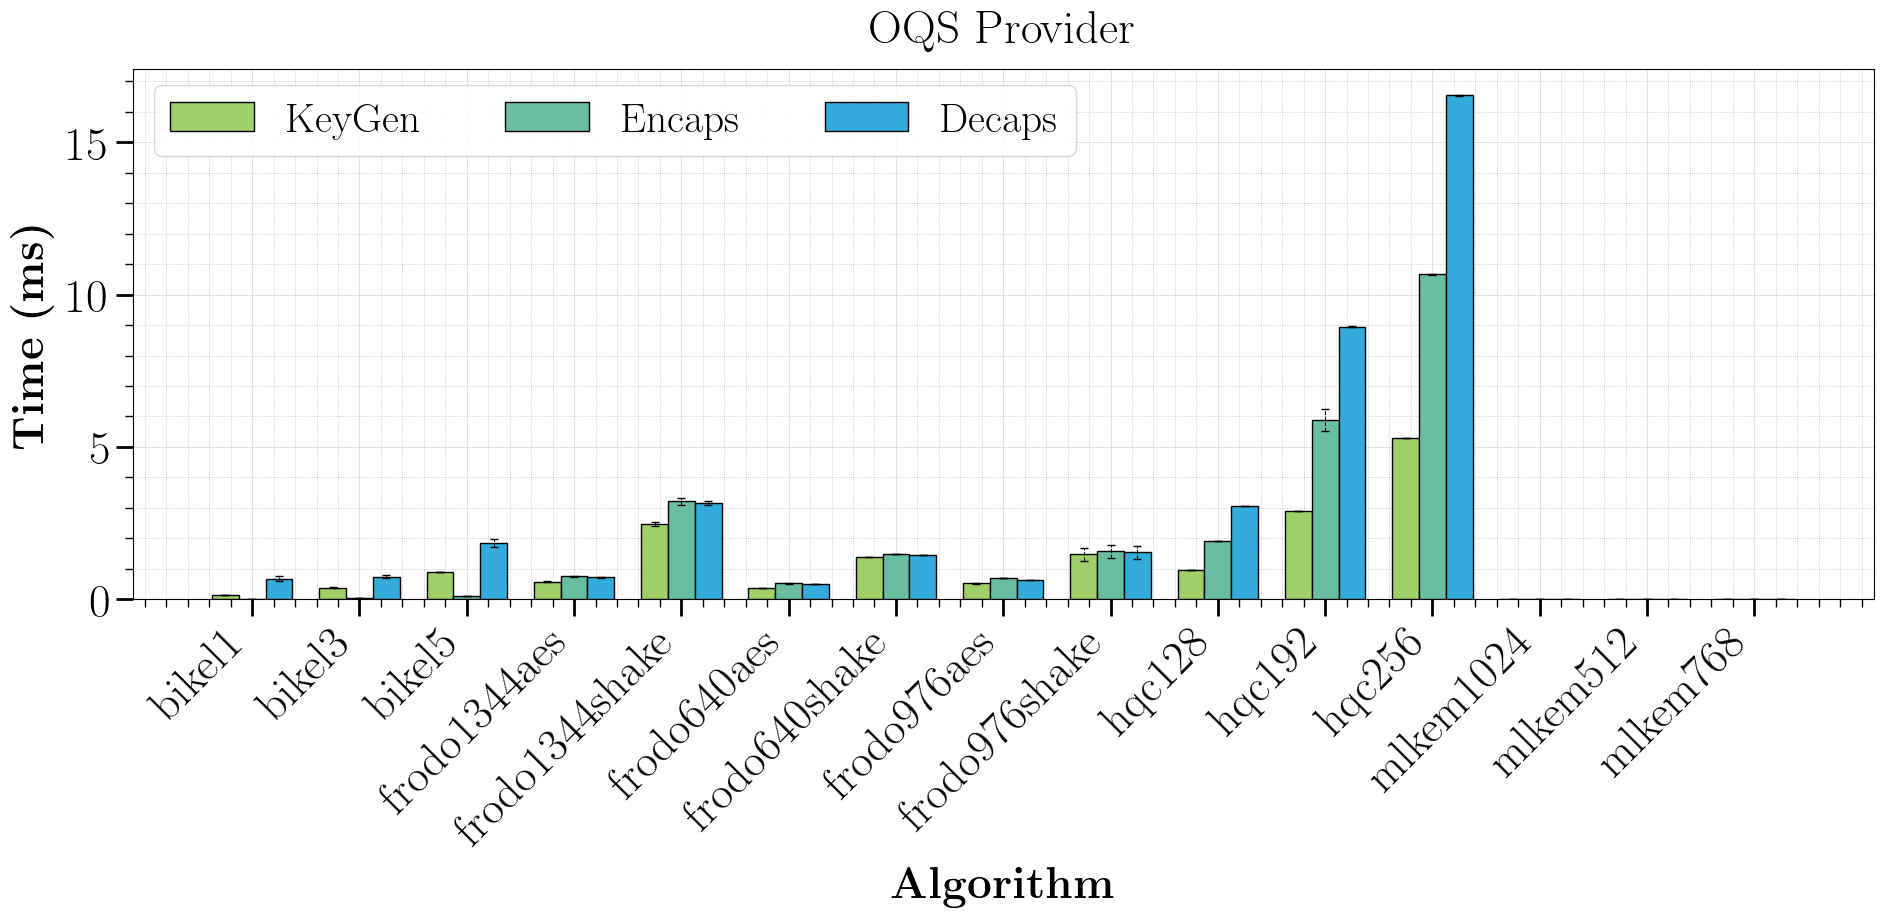

In [9]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_kems_ops_times.pdf", y_start=None)

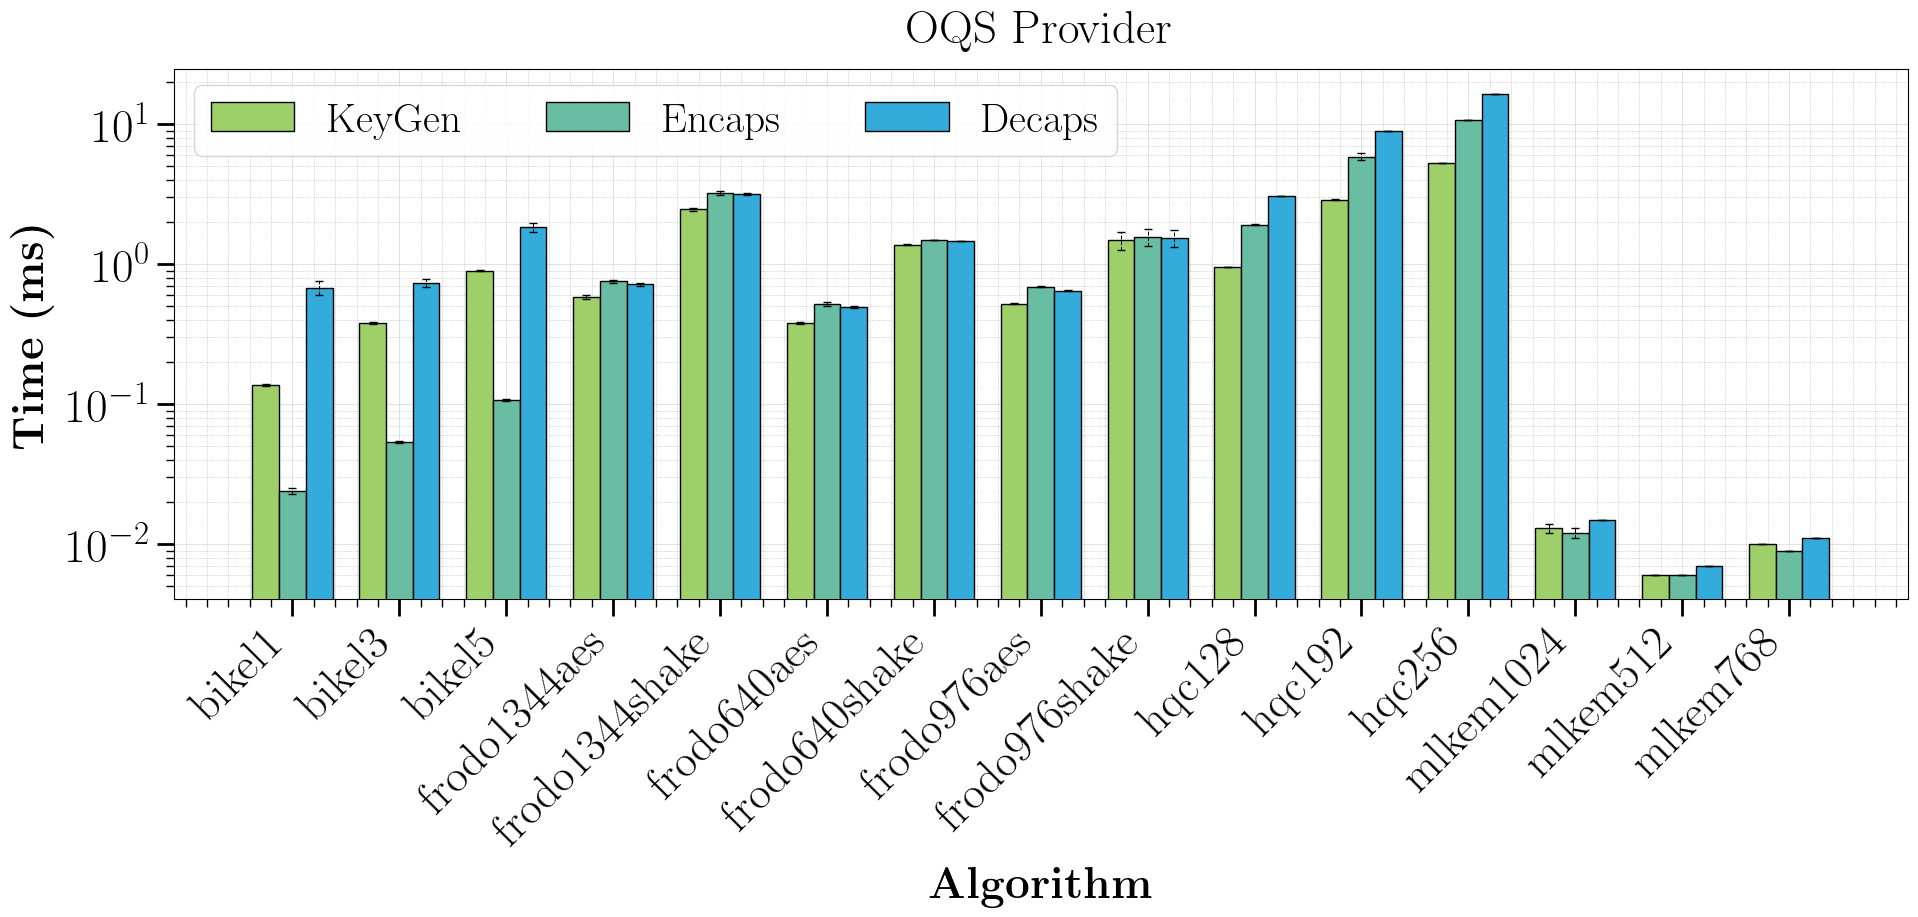

In [10]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_kems_ops_times_log.pdf", log_scale=True, y_start=None)

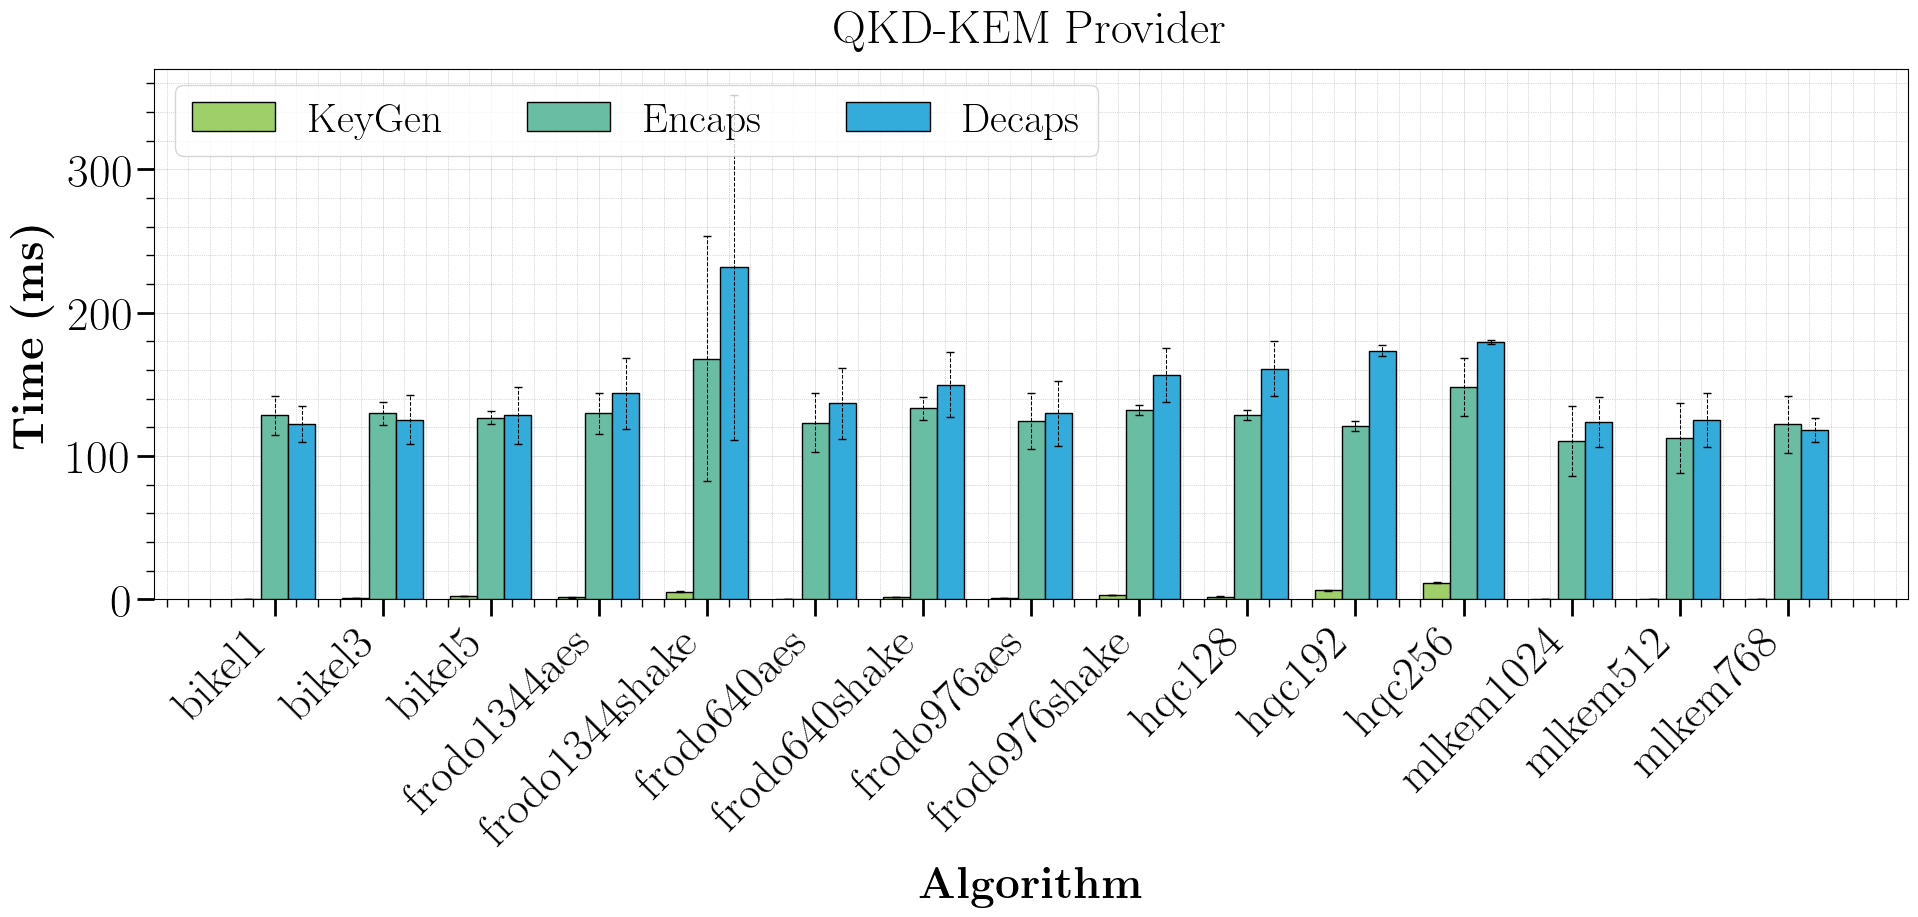

In [11]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_qkdkems_ops_times.pdf", y_start=None)

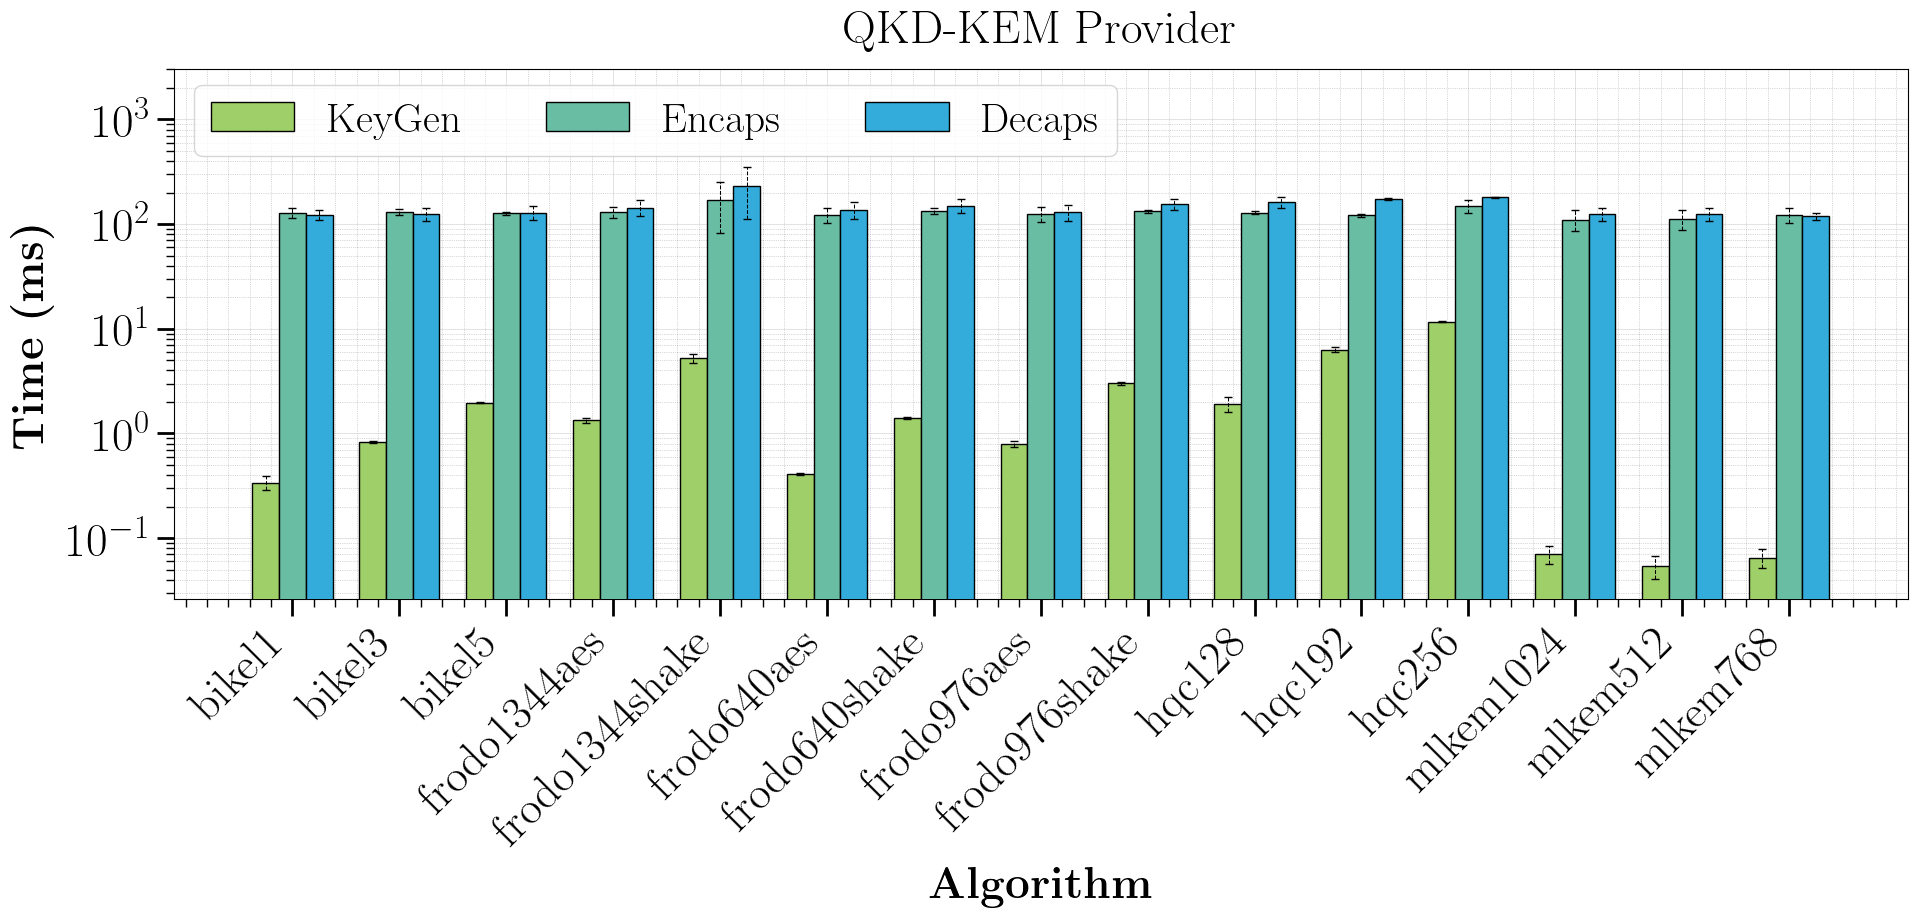

In [13]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", log_scale=True, y_end=3000, plot_title="cerberis_CH_OFF_qkdkems_ops_times_log.pdf", y_start=None)

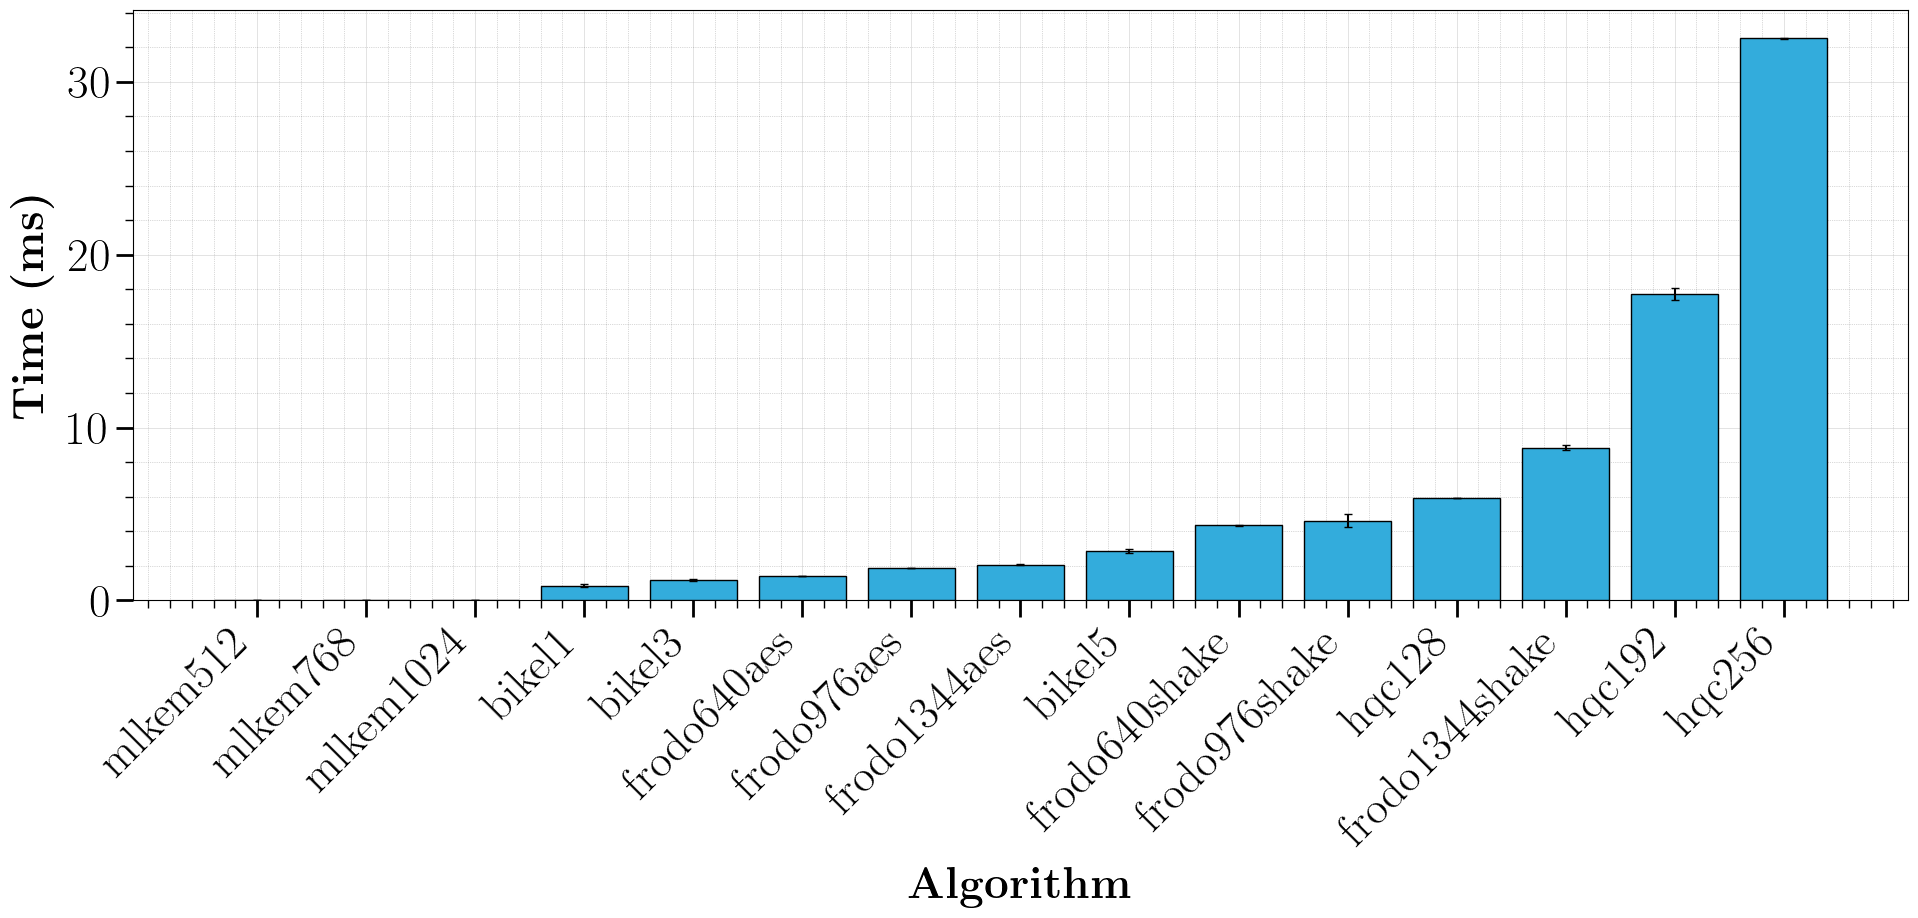

In [14]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_kems_total_times.pdf", y_start=None)

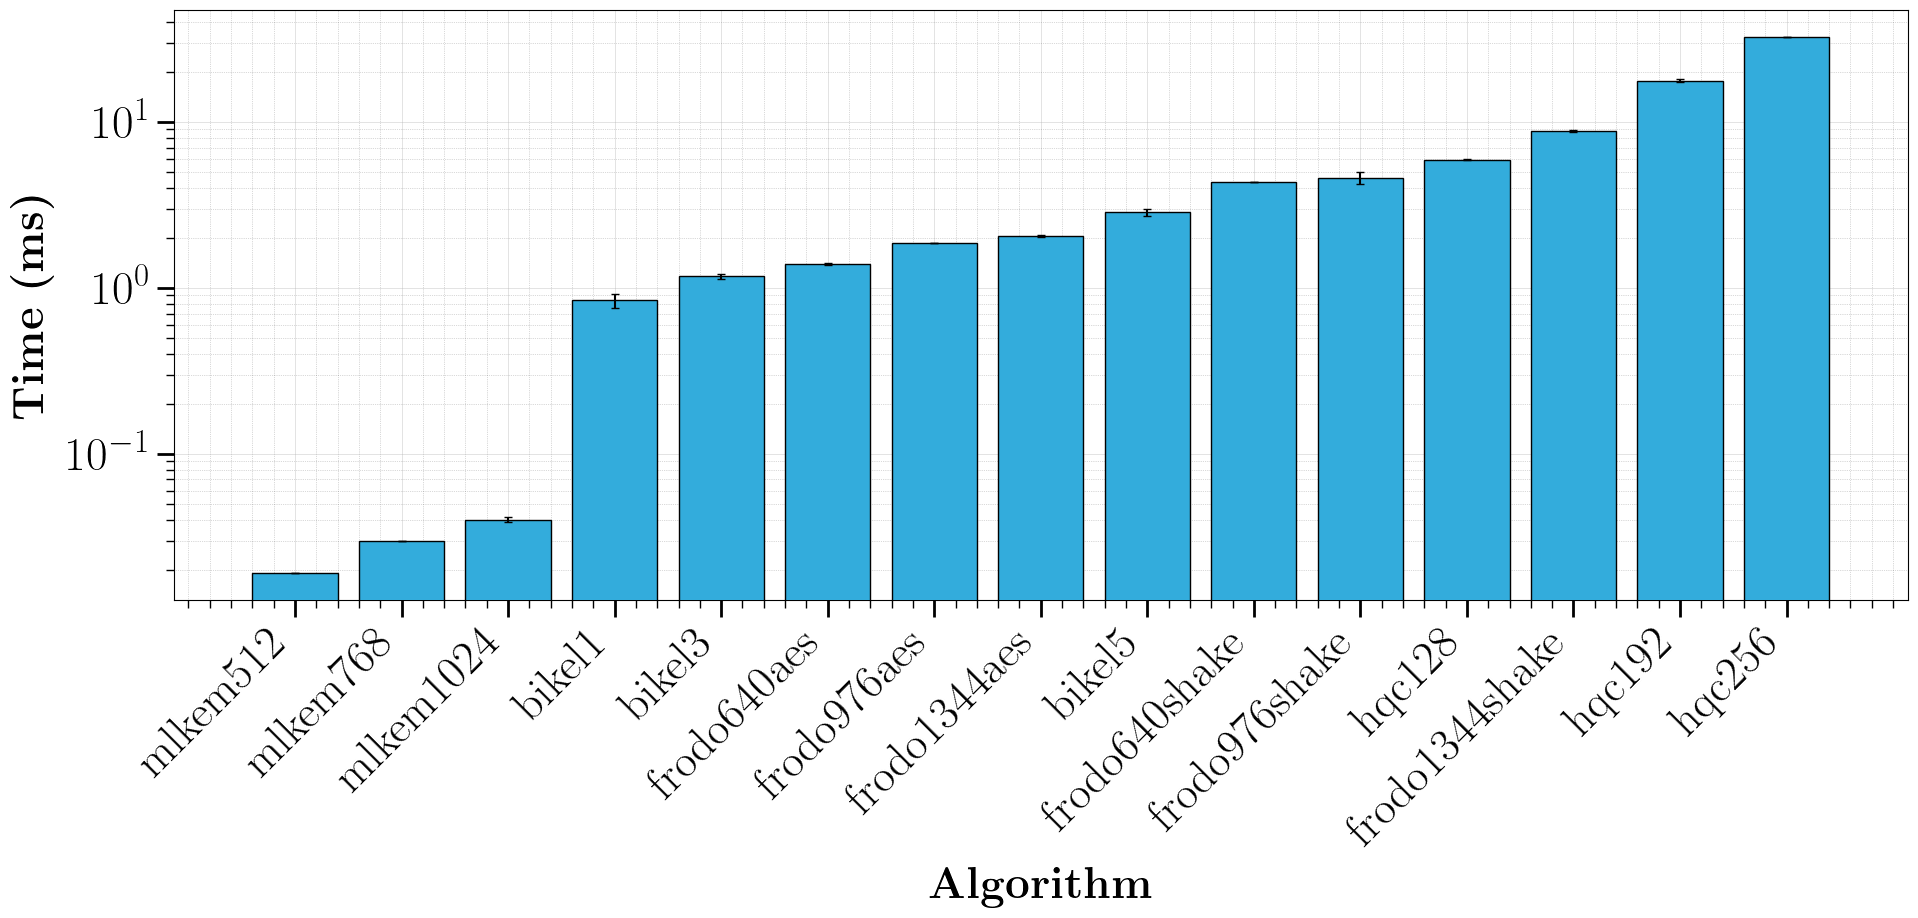

In [15]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", log_scale=True, plot_title="cerberis_CH_OFF_kems_total_times_log.pdf", y_start=None)

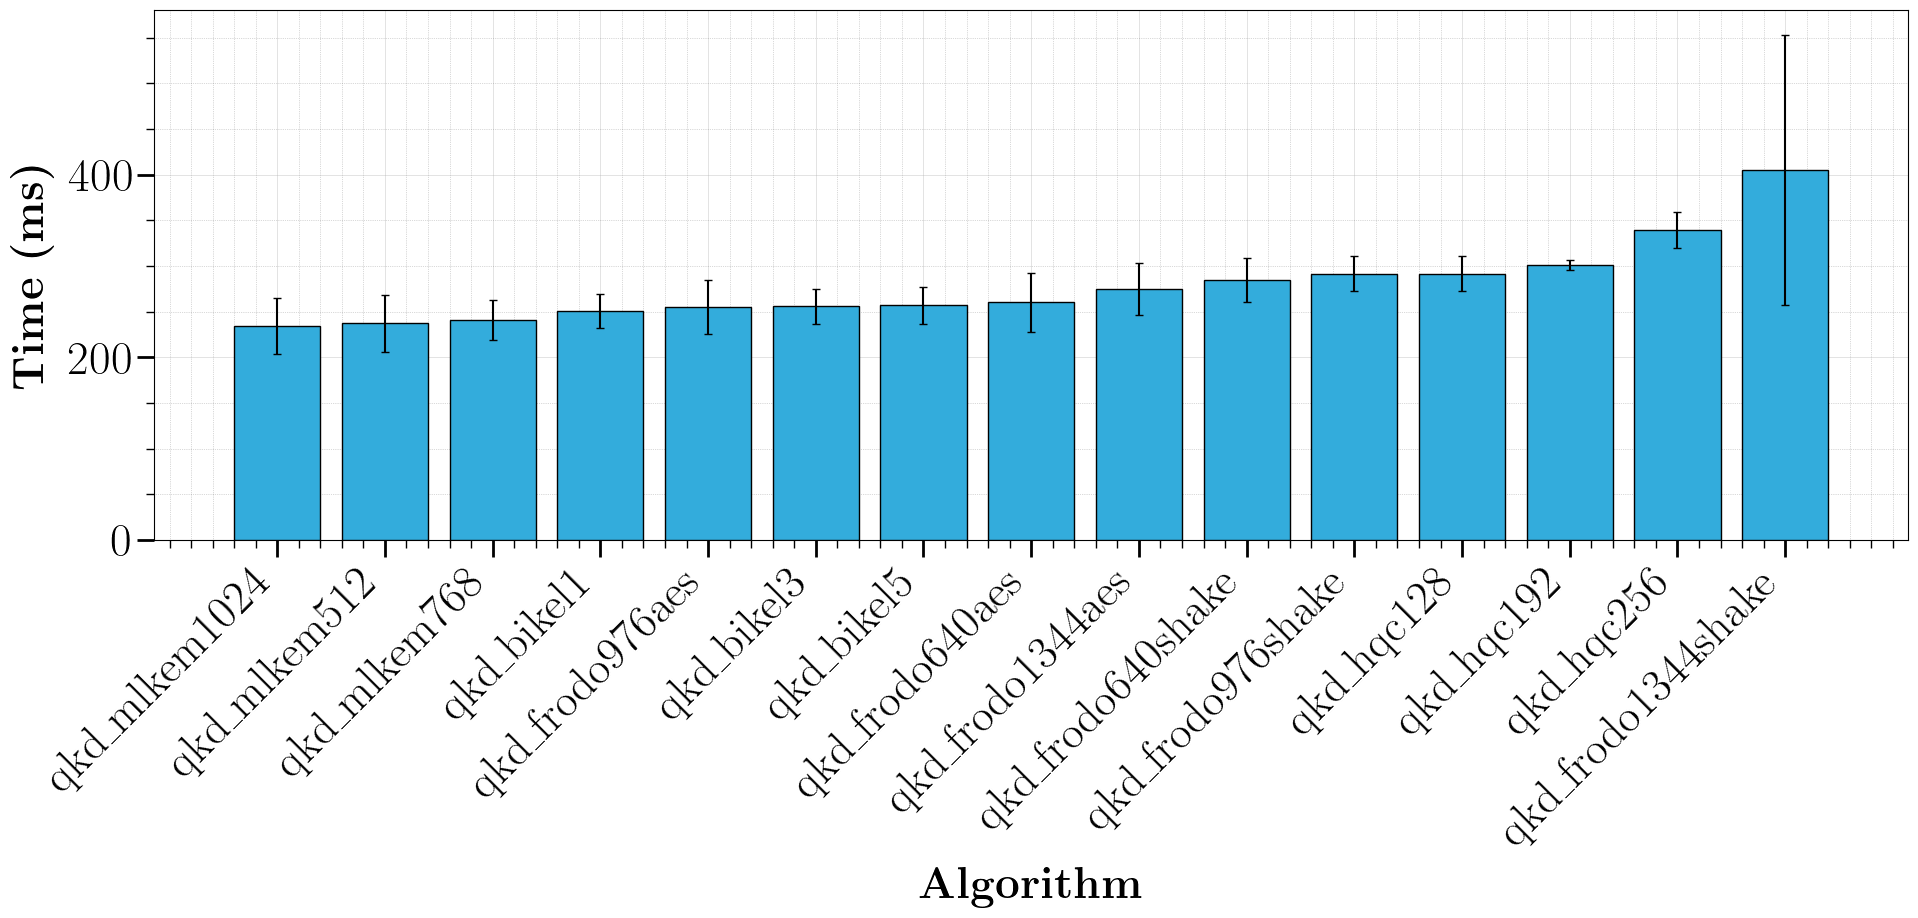

In [17]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_qkdkems_total_times.pdf", y_start=None)

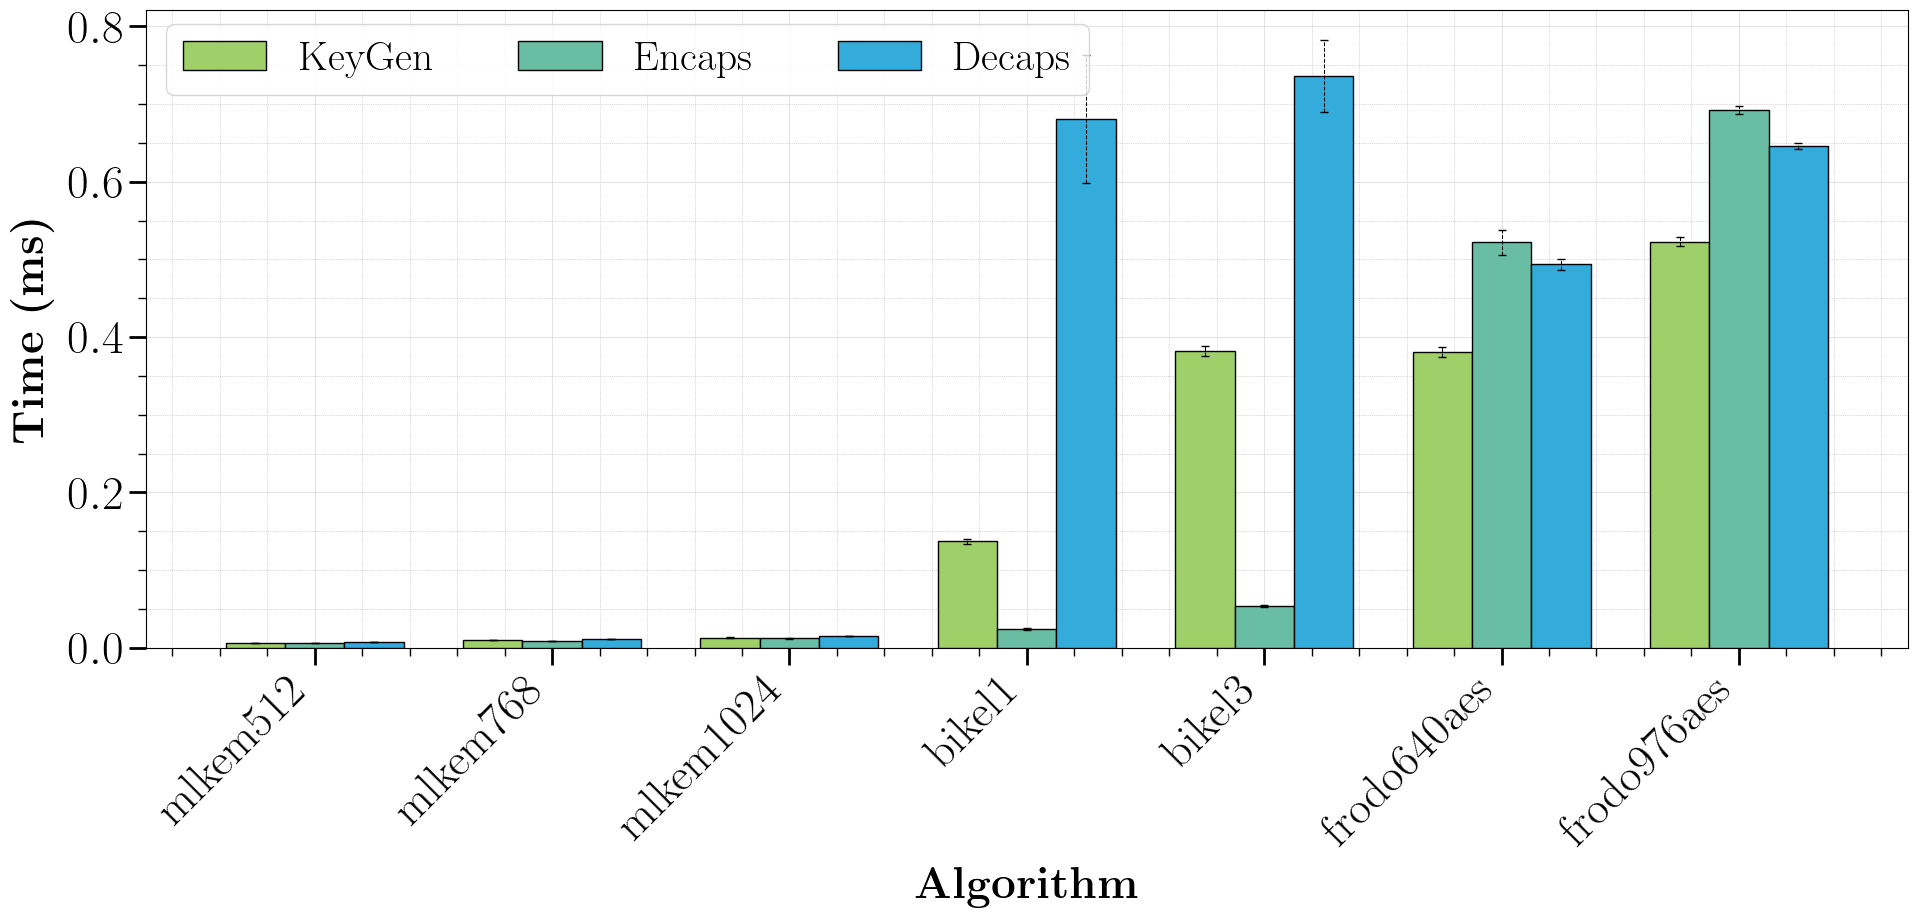

In [18]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="cerberis_CH_OFF_kems_fast_times.pdf")

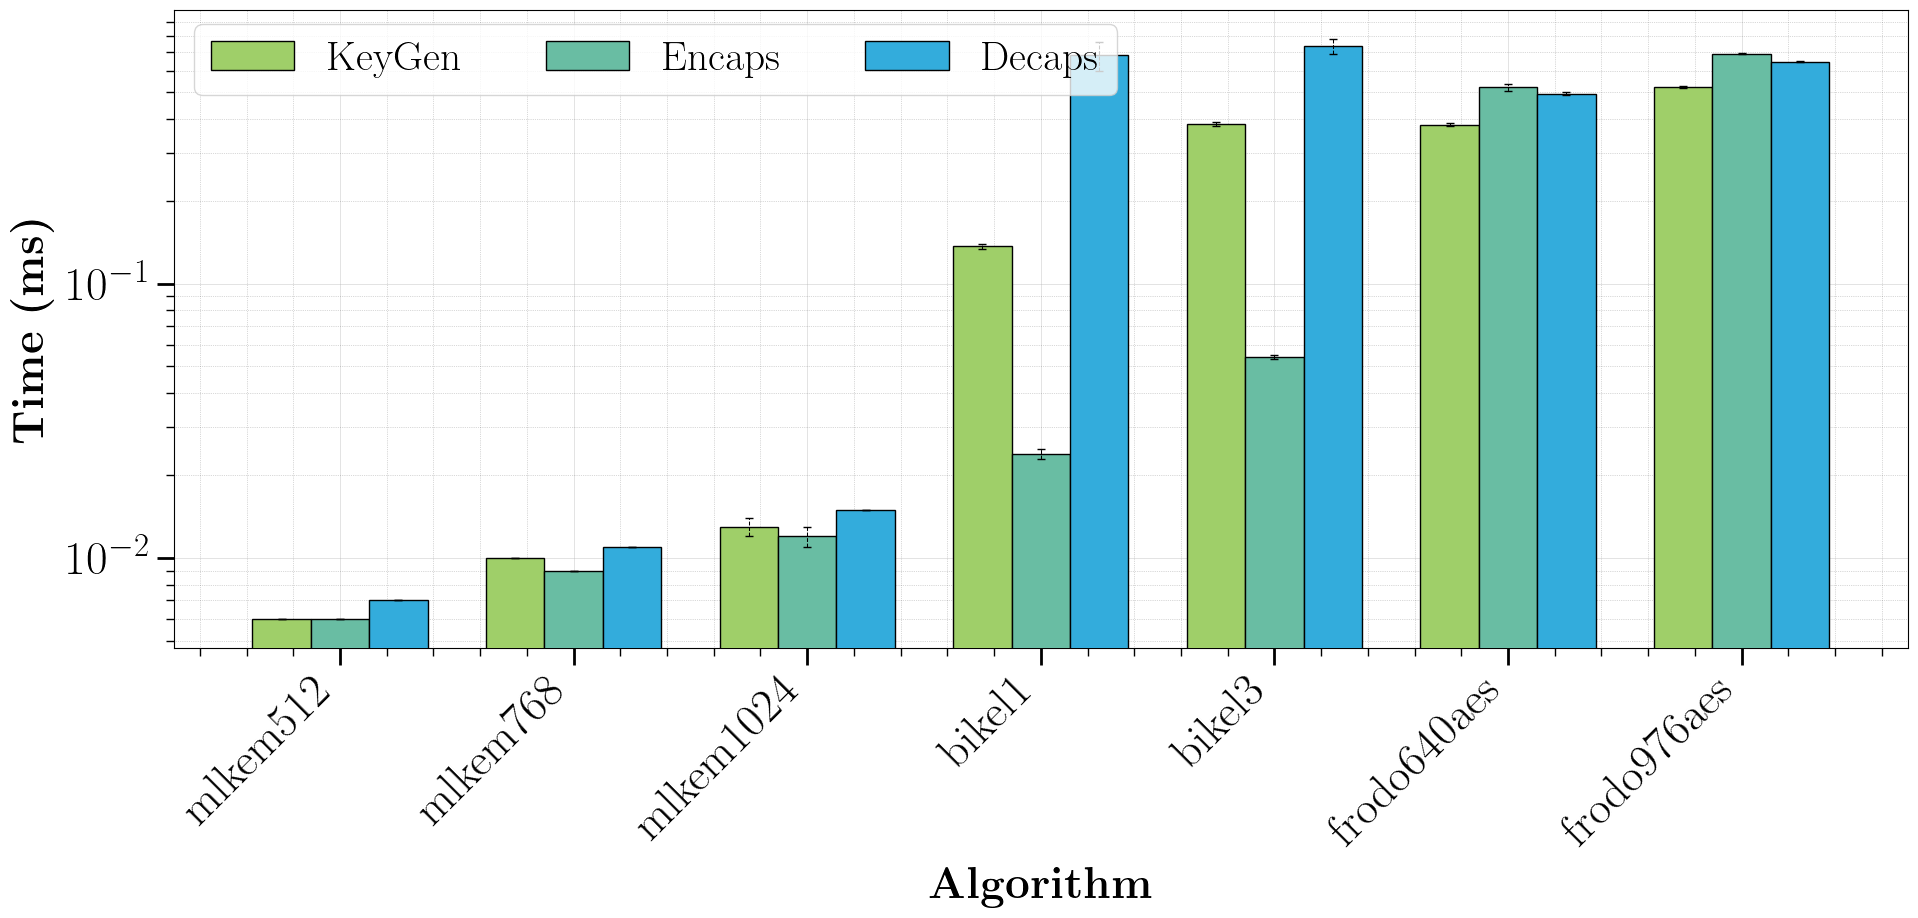

In [19]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", log_scale=True, plot_title="cerberis_CH_OFF_kems_fast_times_log.pdf")

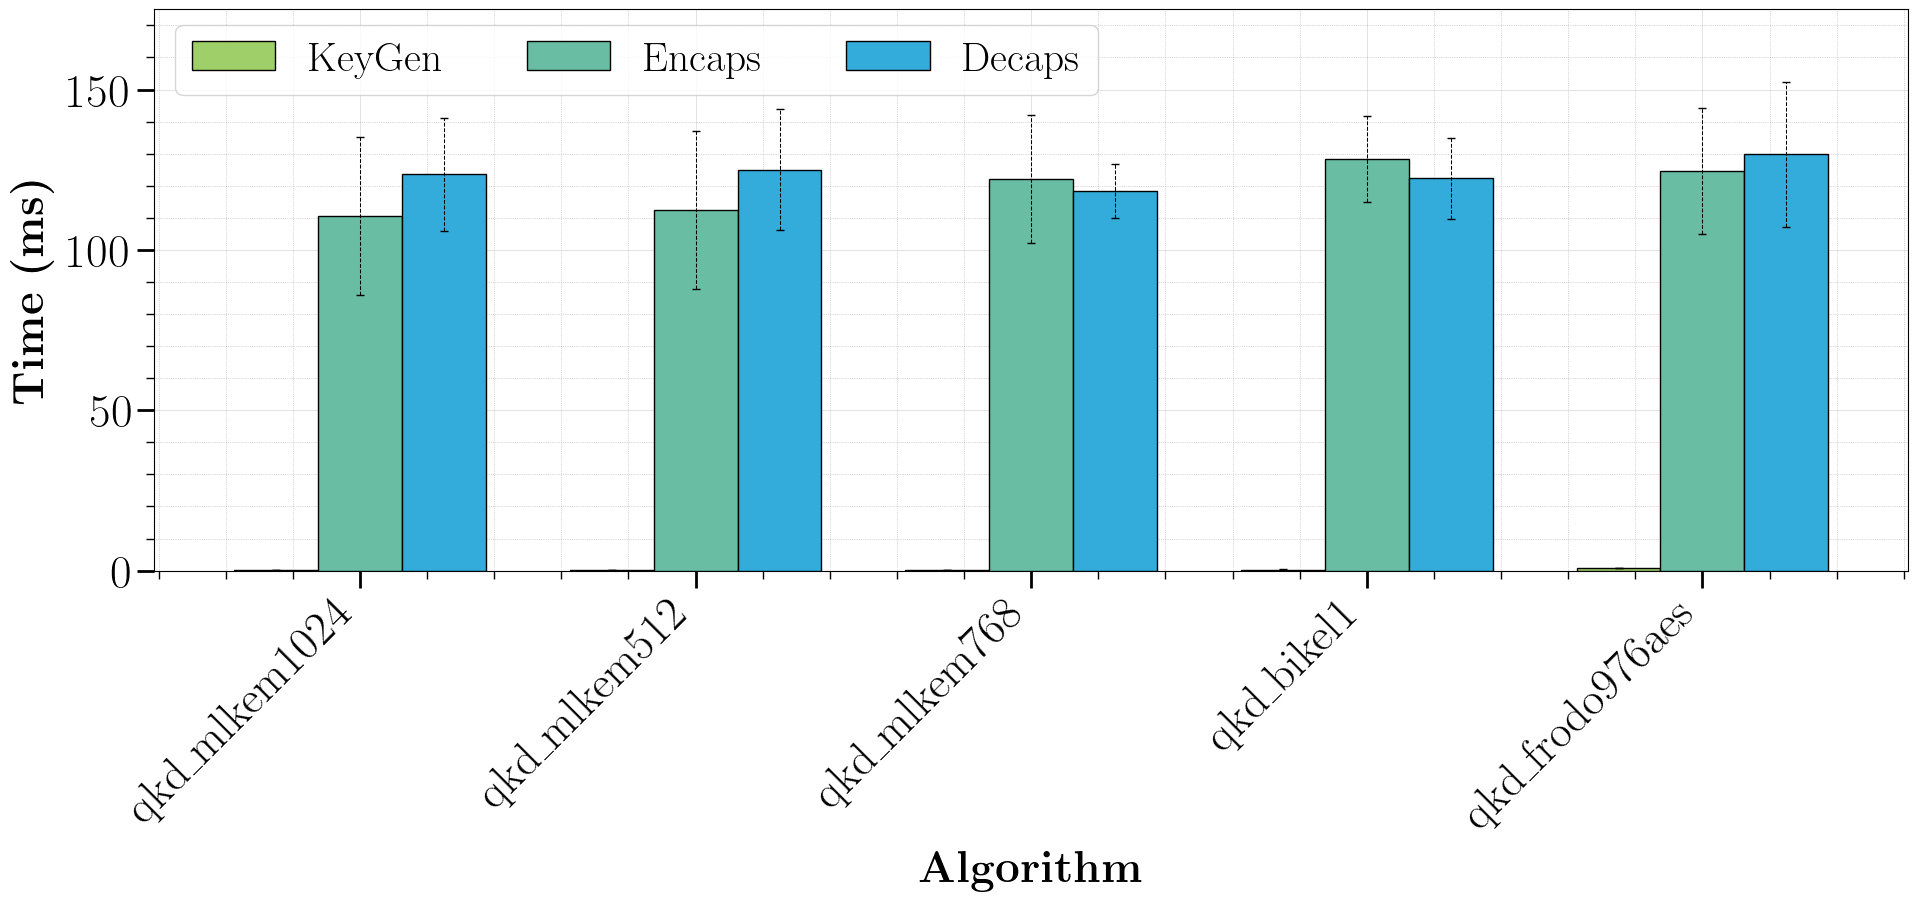

In [23]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", y_end=175, plot_title="cerberis_CH_OFF_qkdkems_fast_times.pdf")

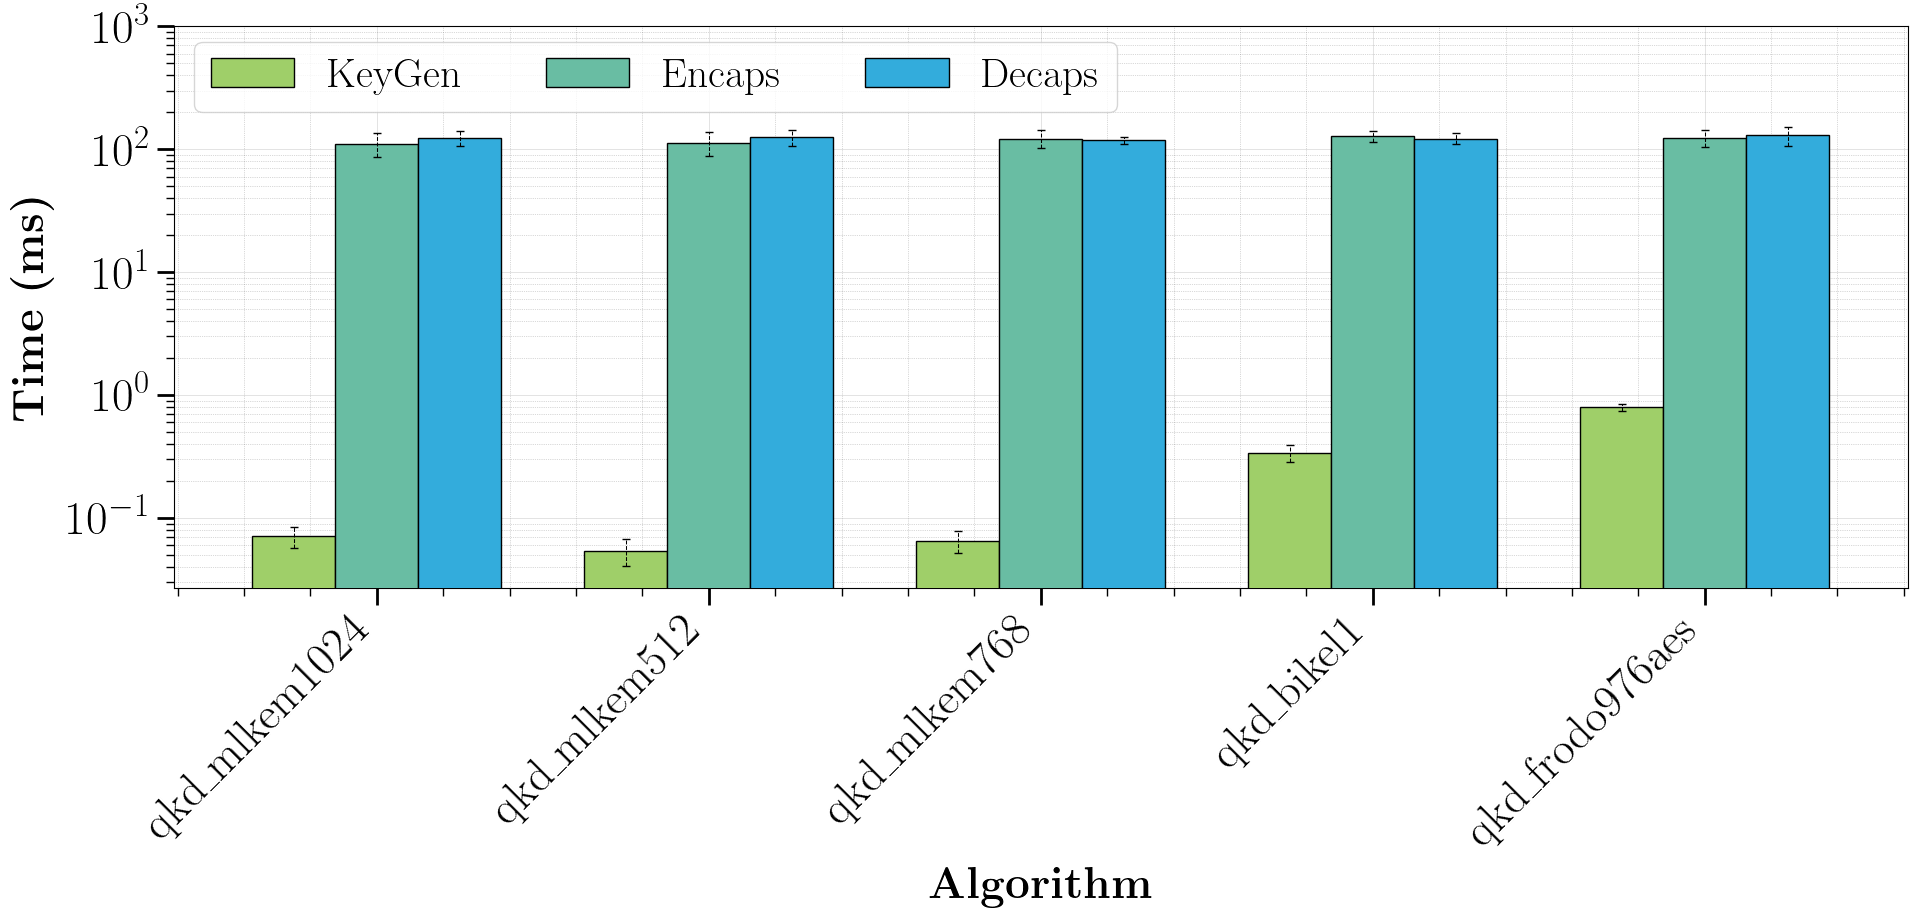

In [27]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", log_scale=True, y_end=1000, plot_title="cerberis_CH_OFF_qkdkems_fast_times_log.pdf")

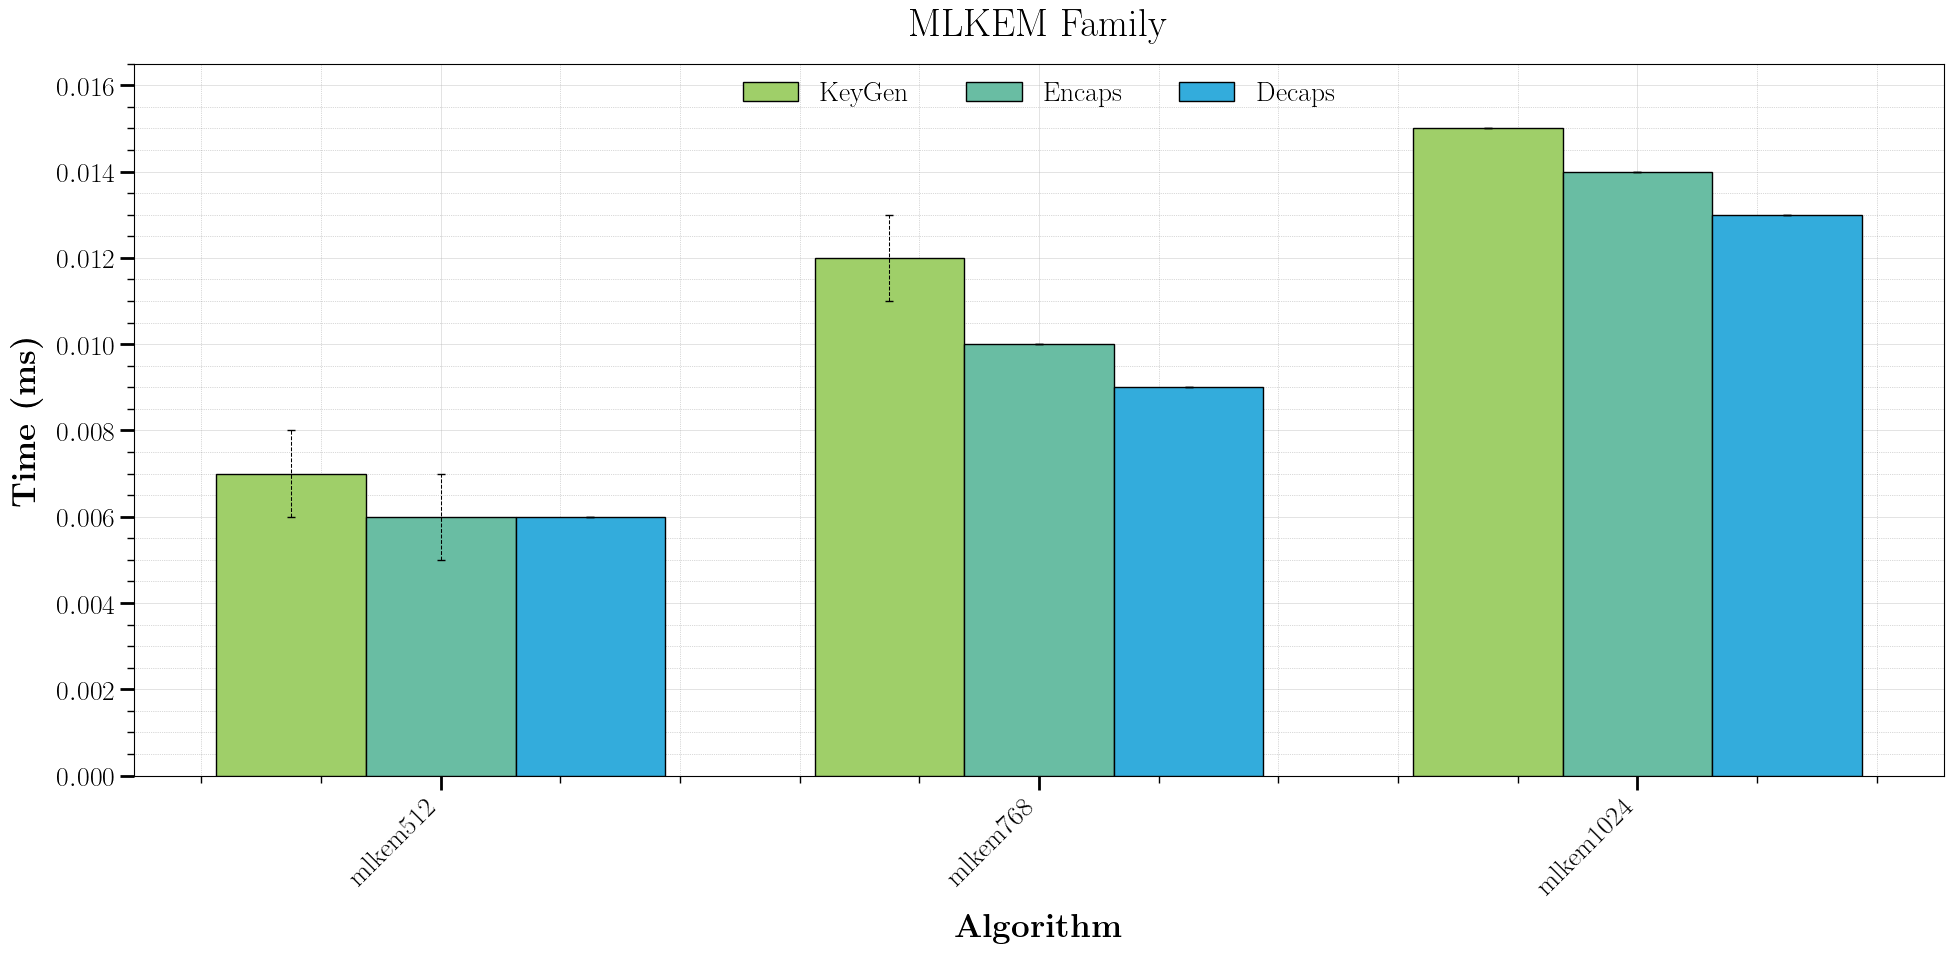

In [14]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

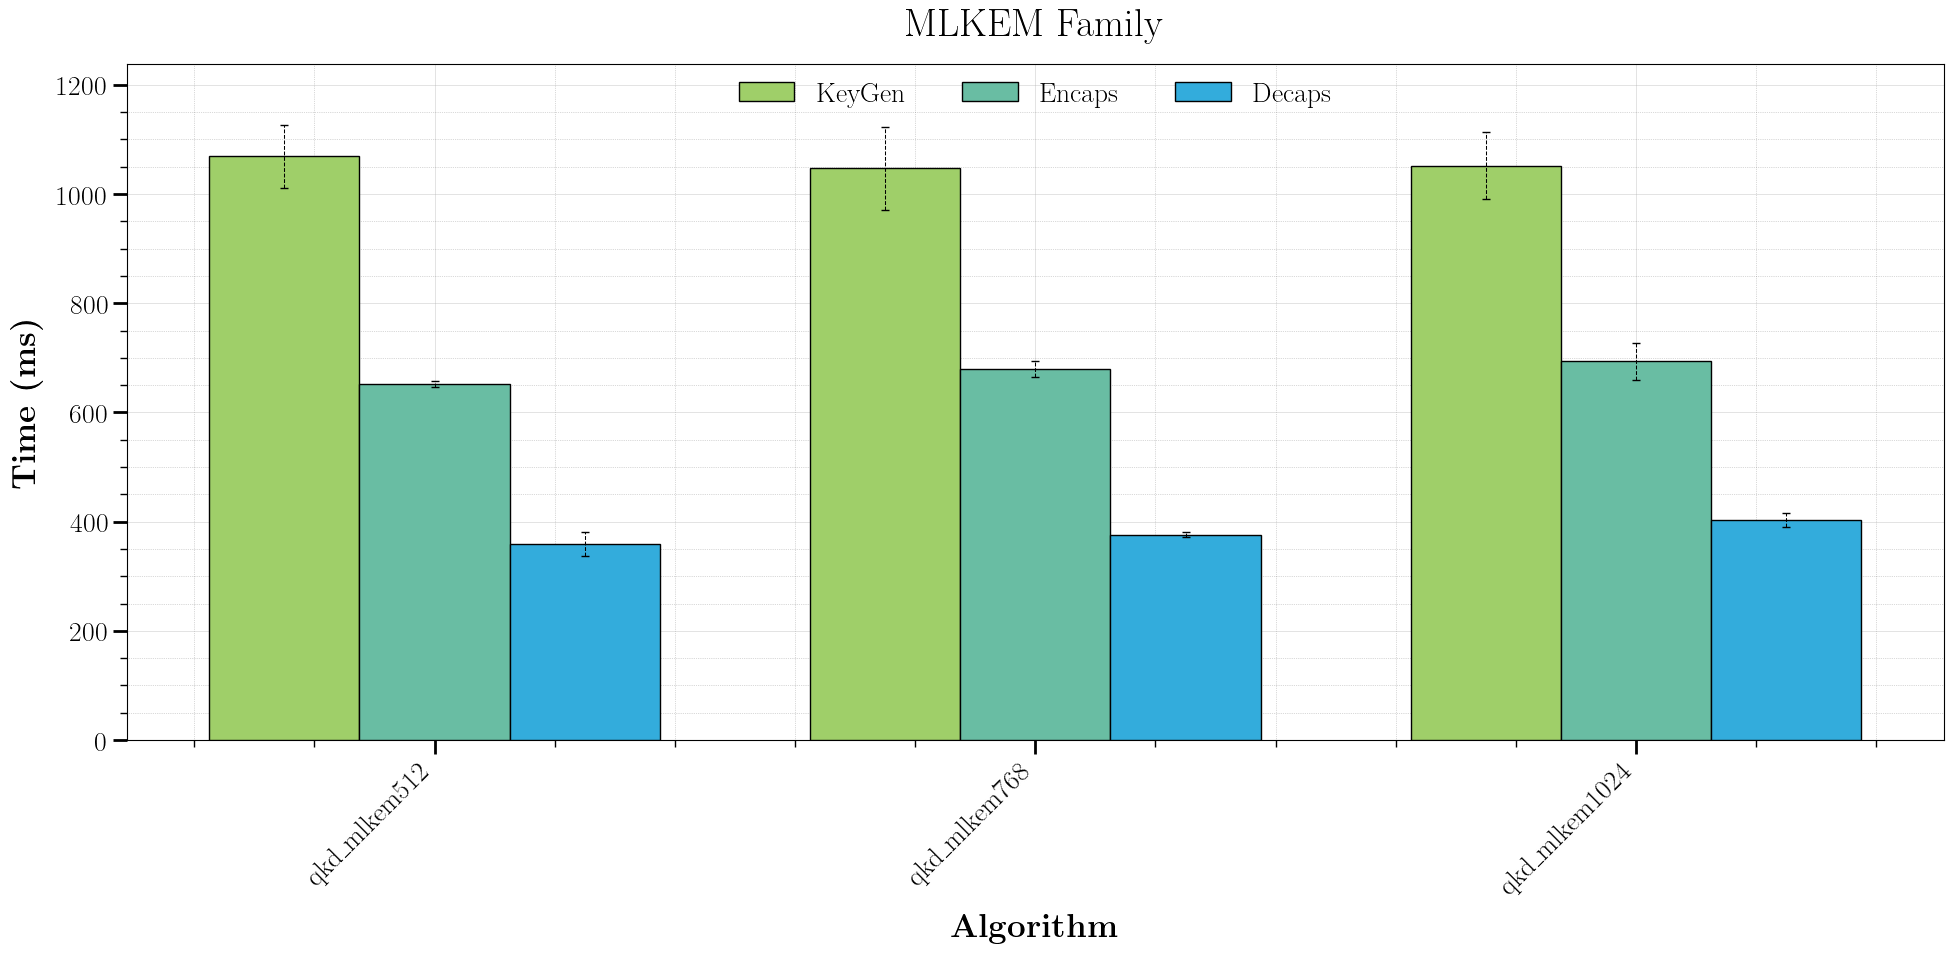

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

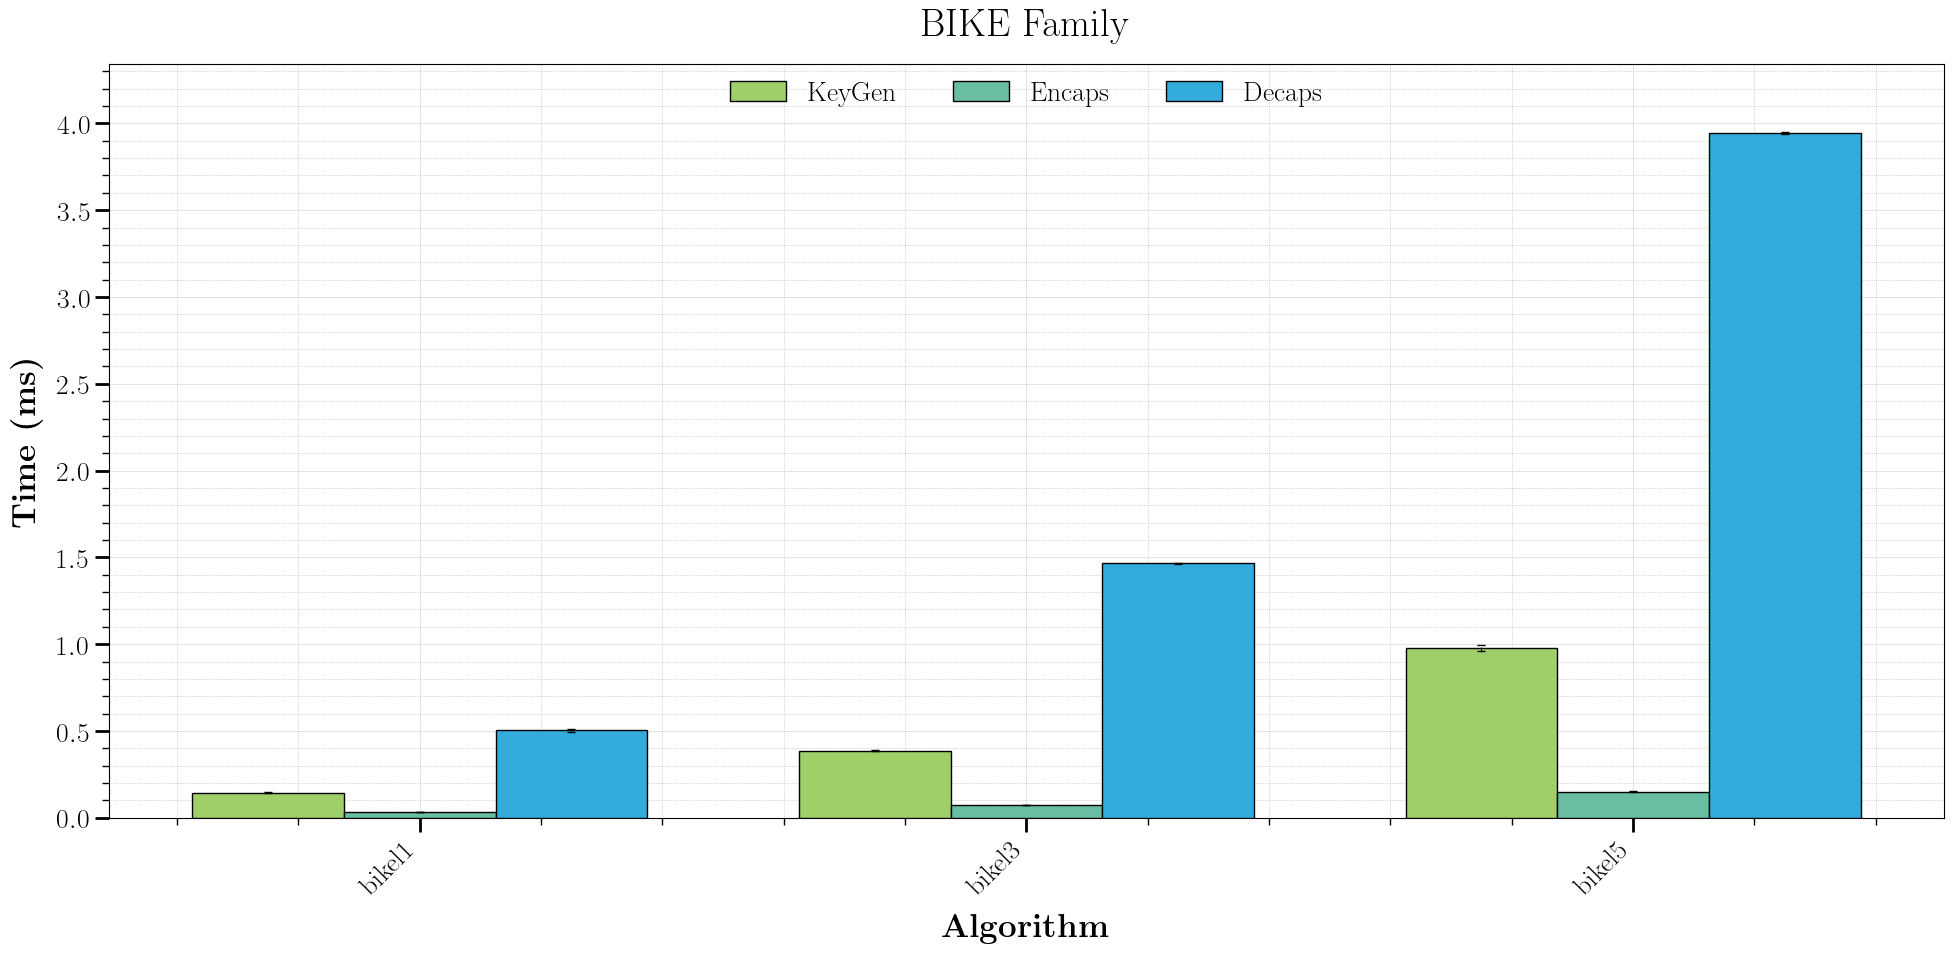

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

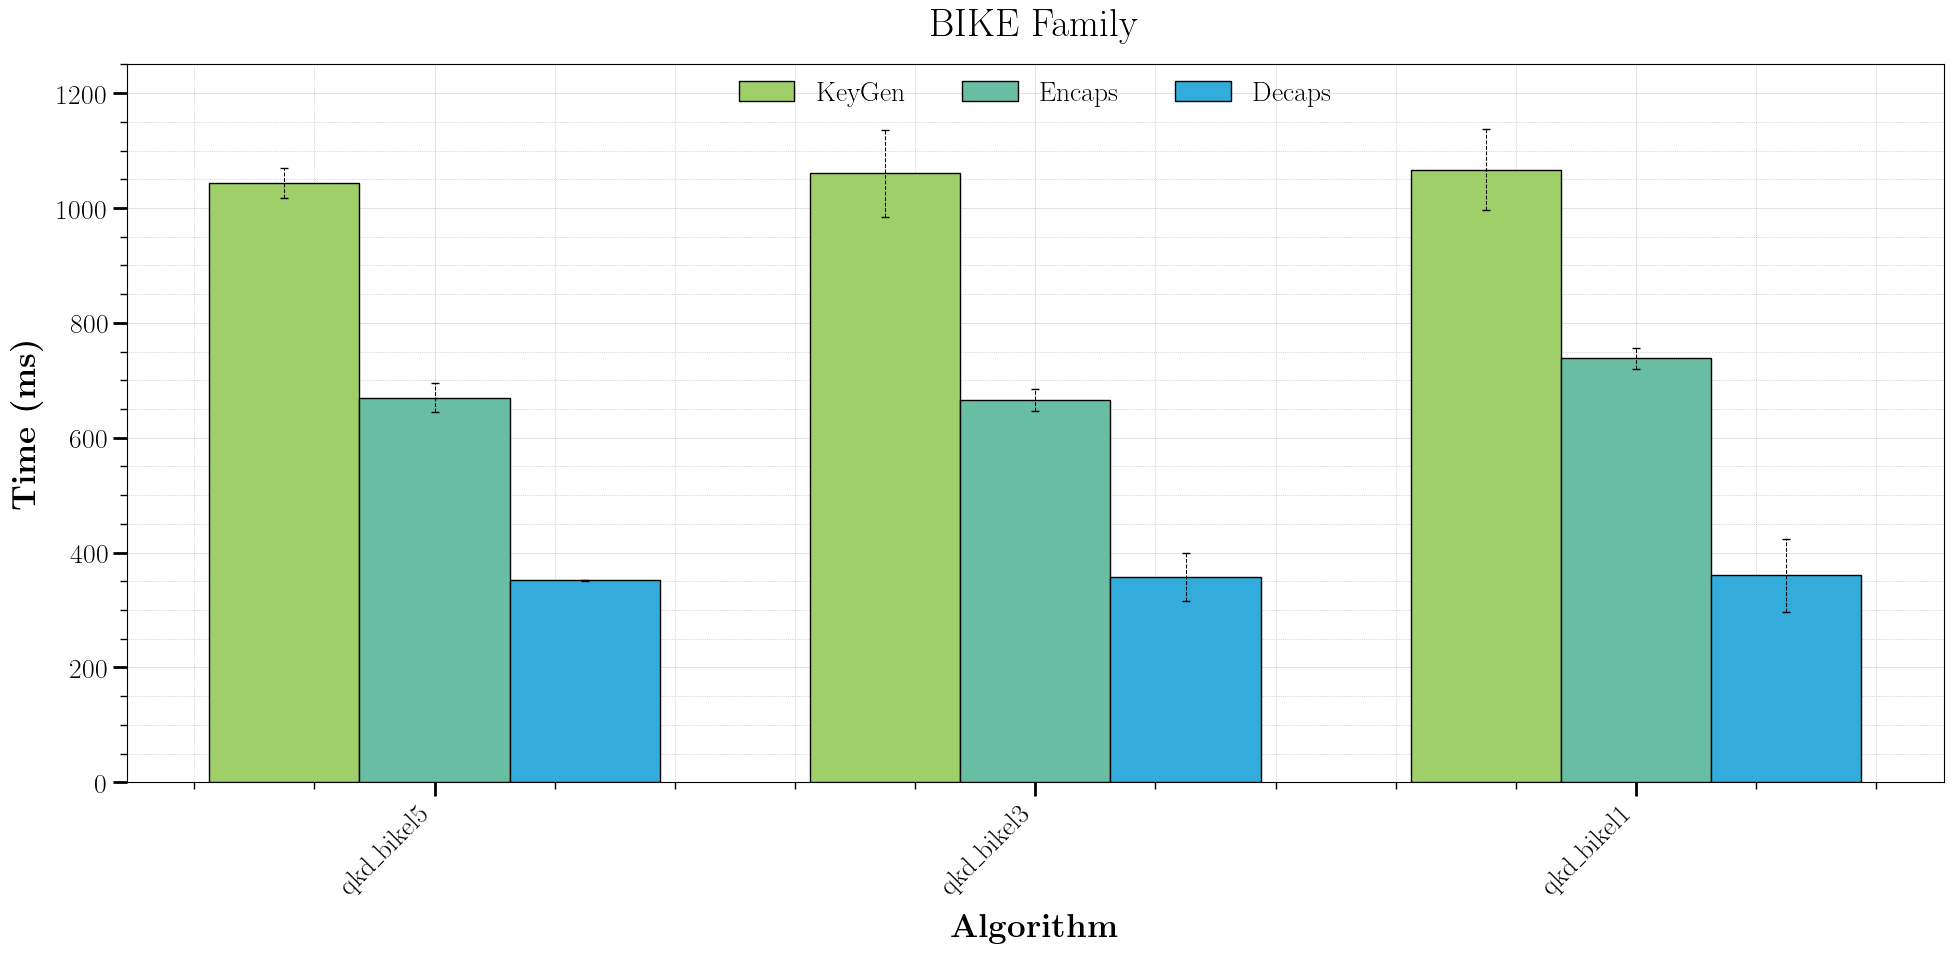

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times.pdf", log_scale=False)

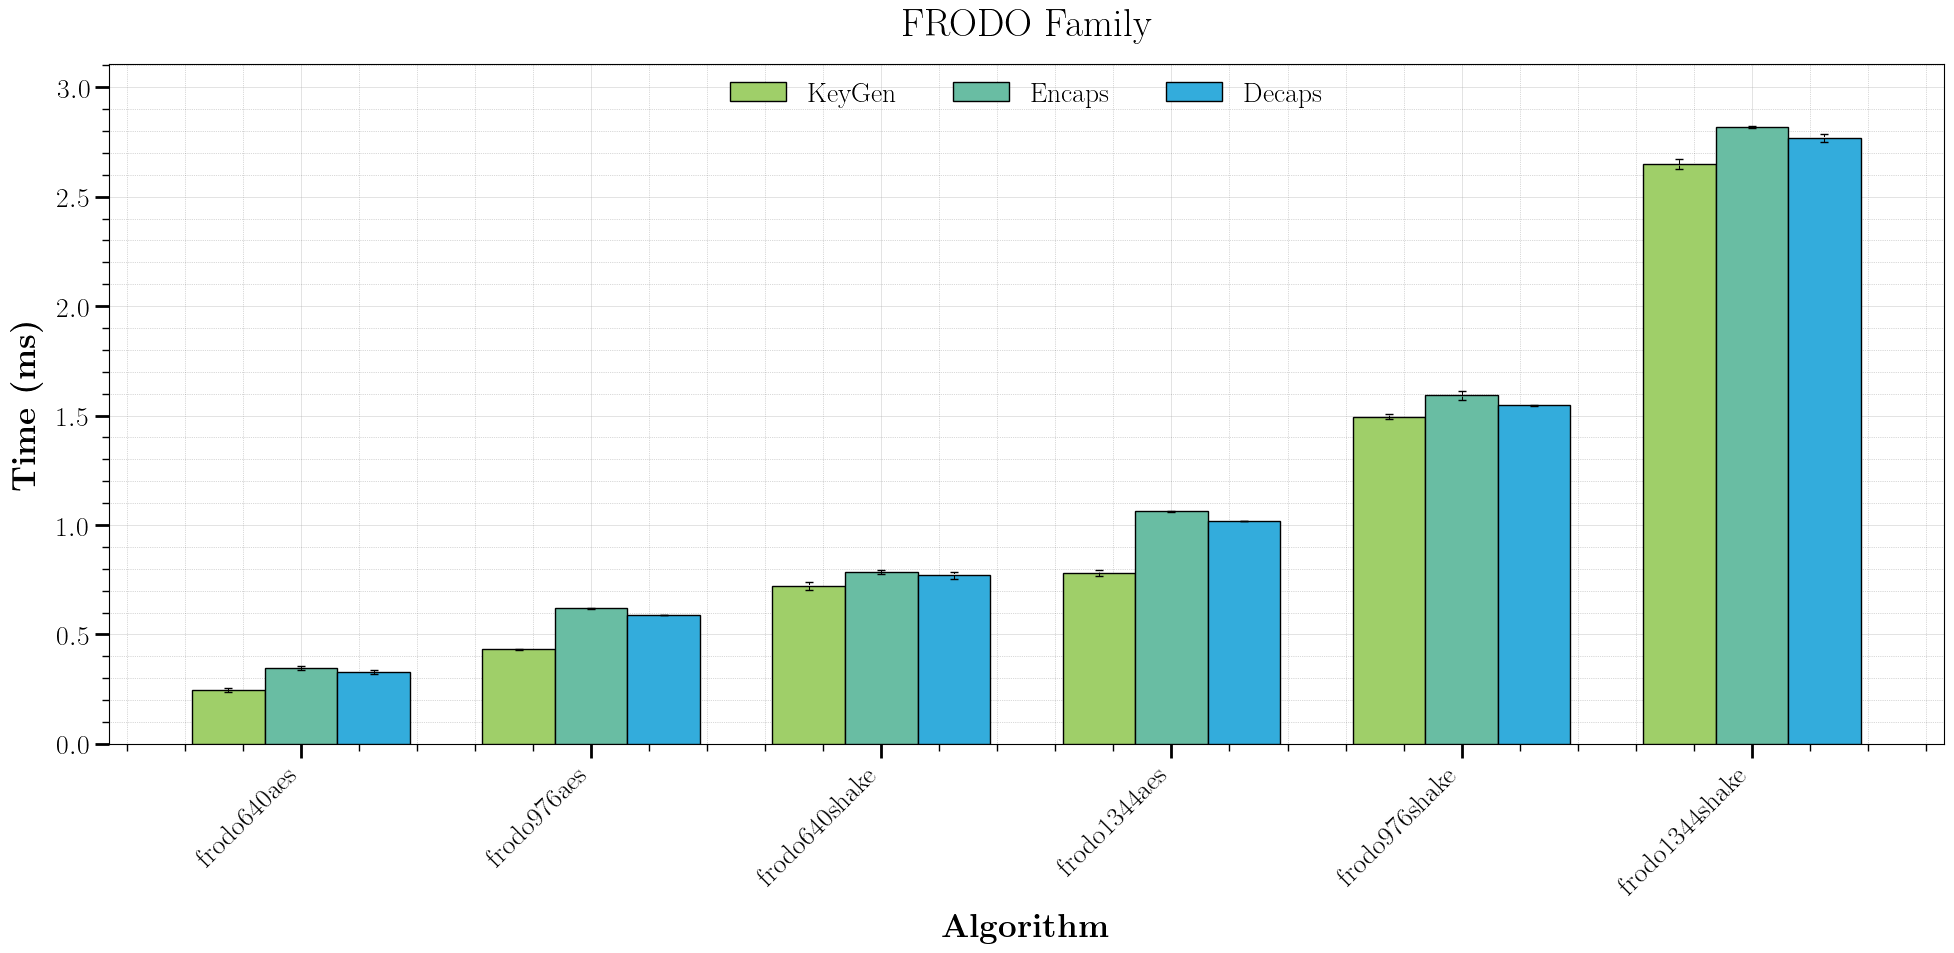

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

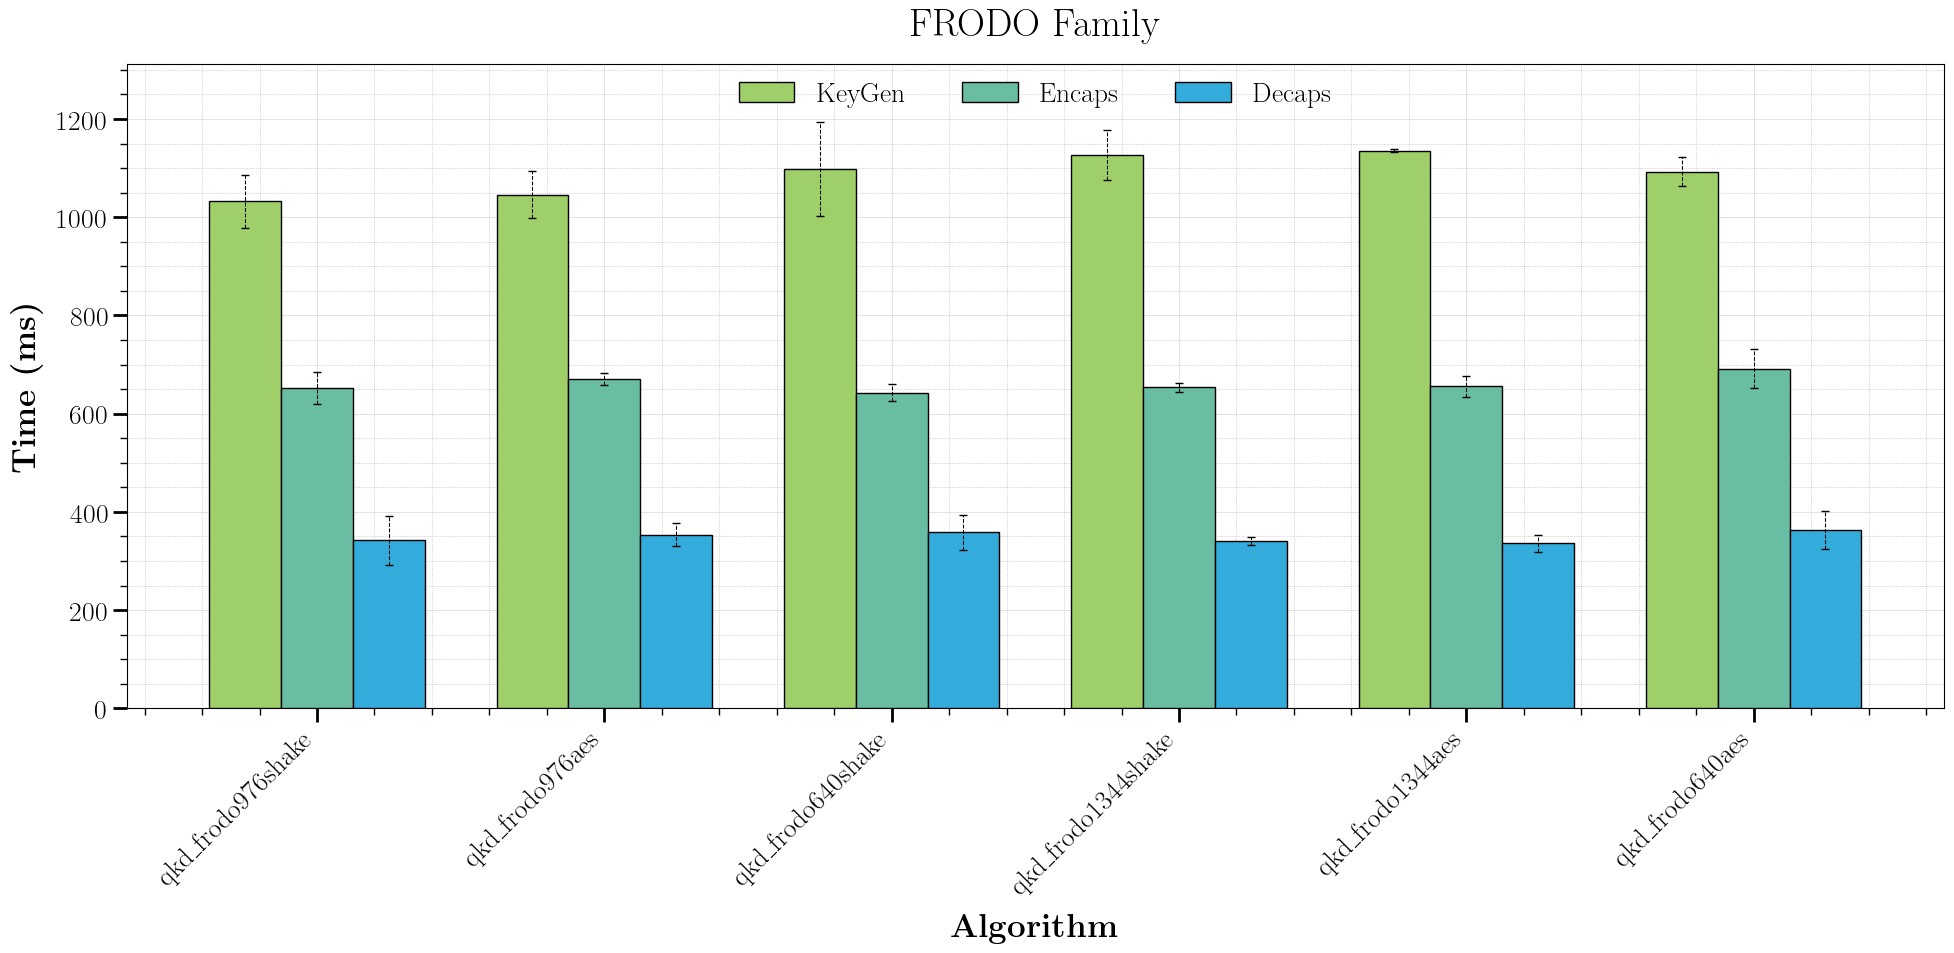

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

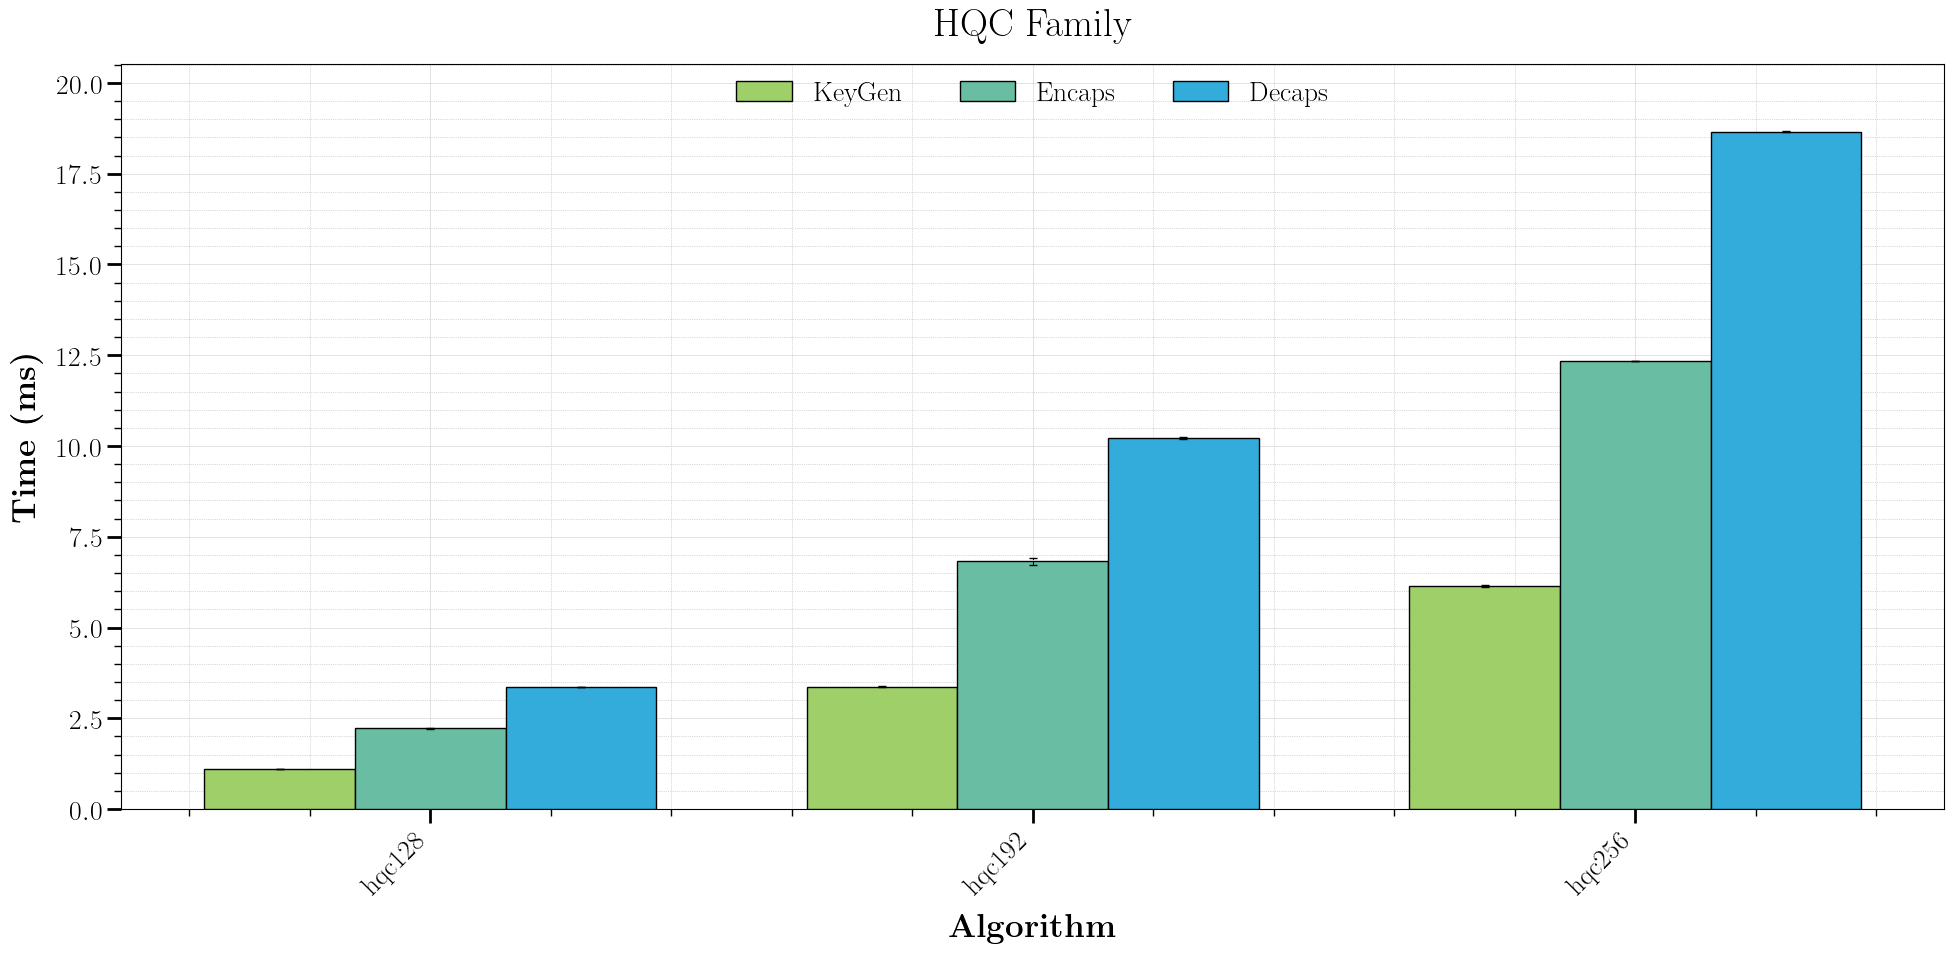

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

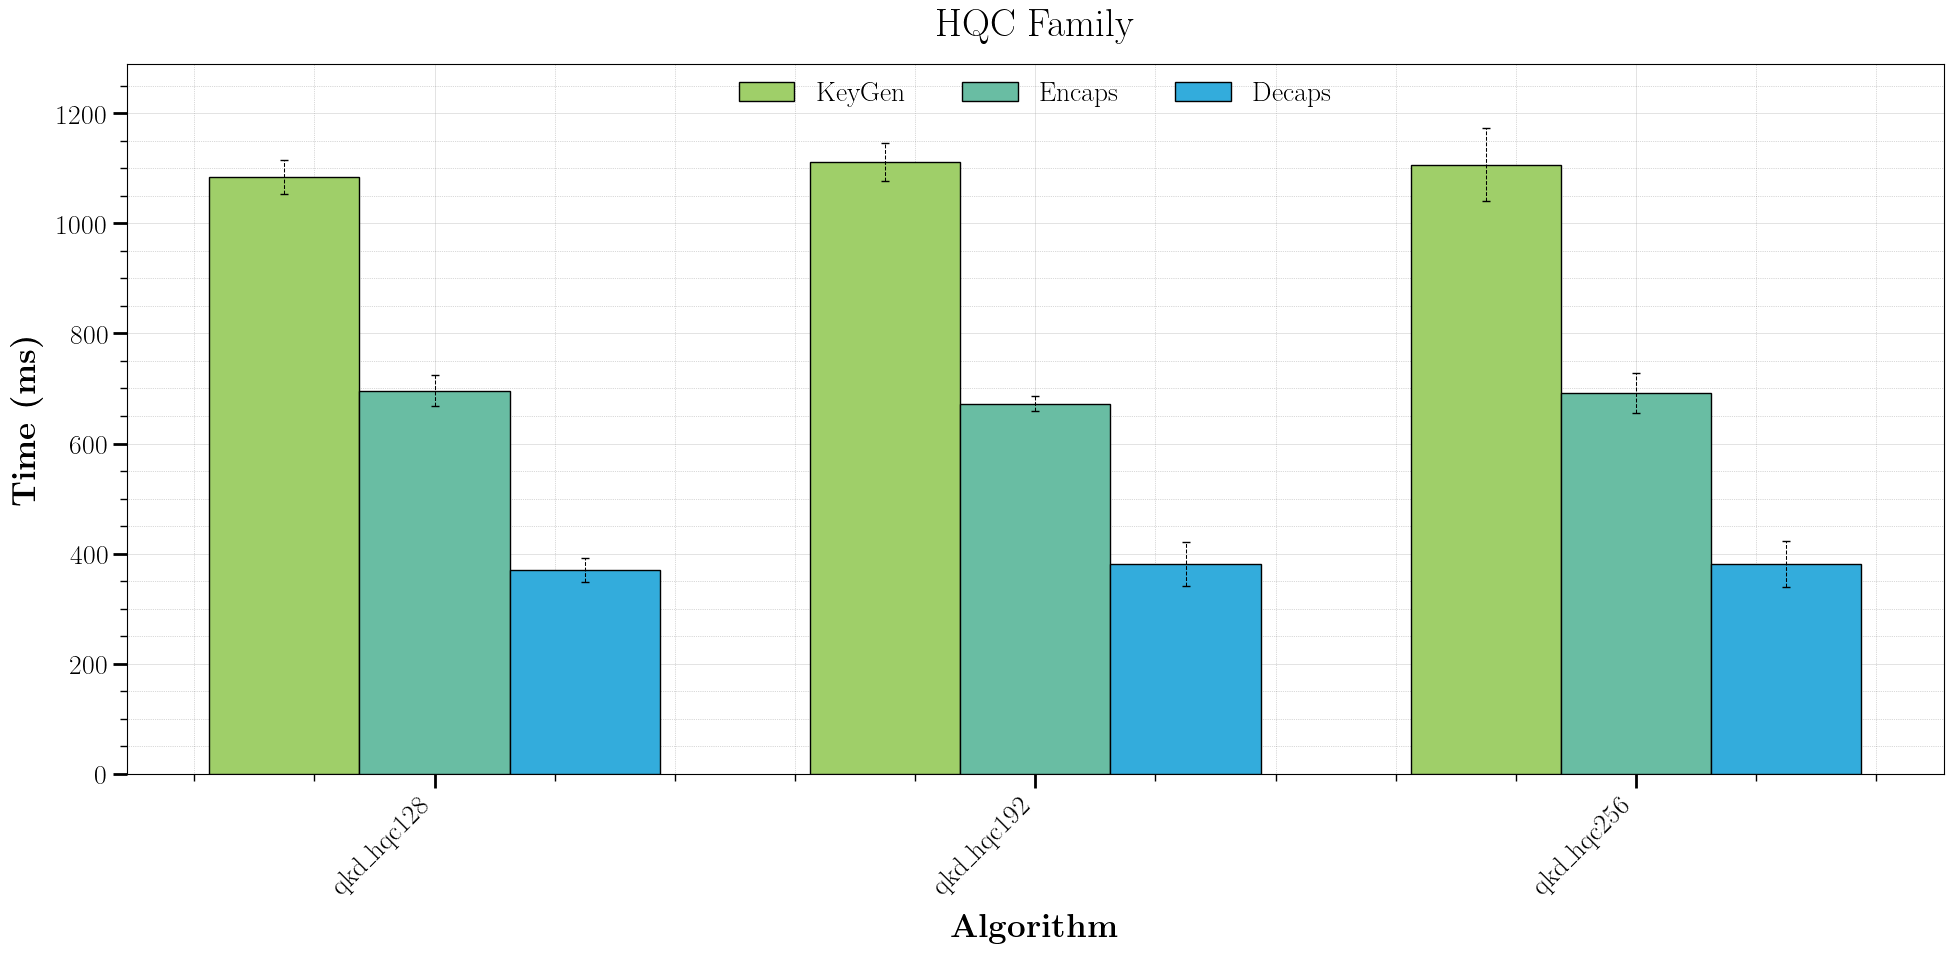

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

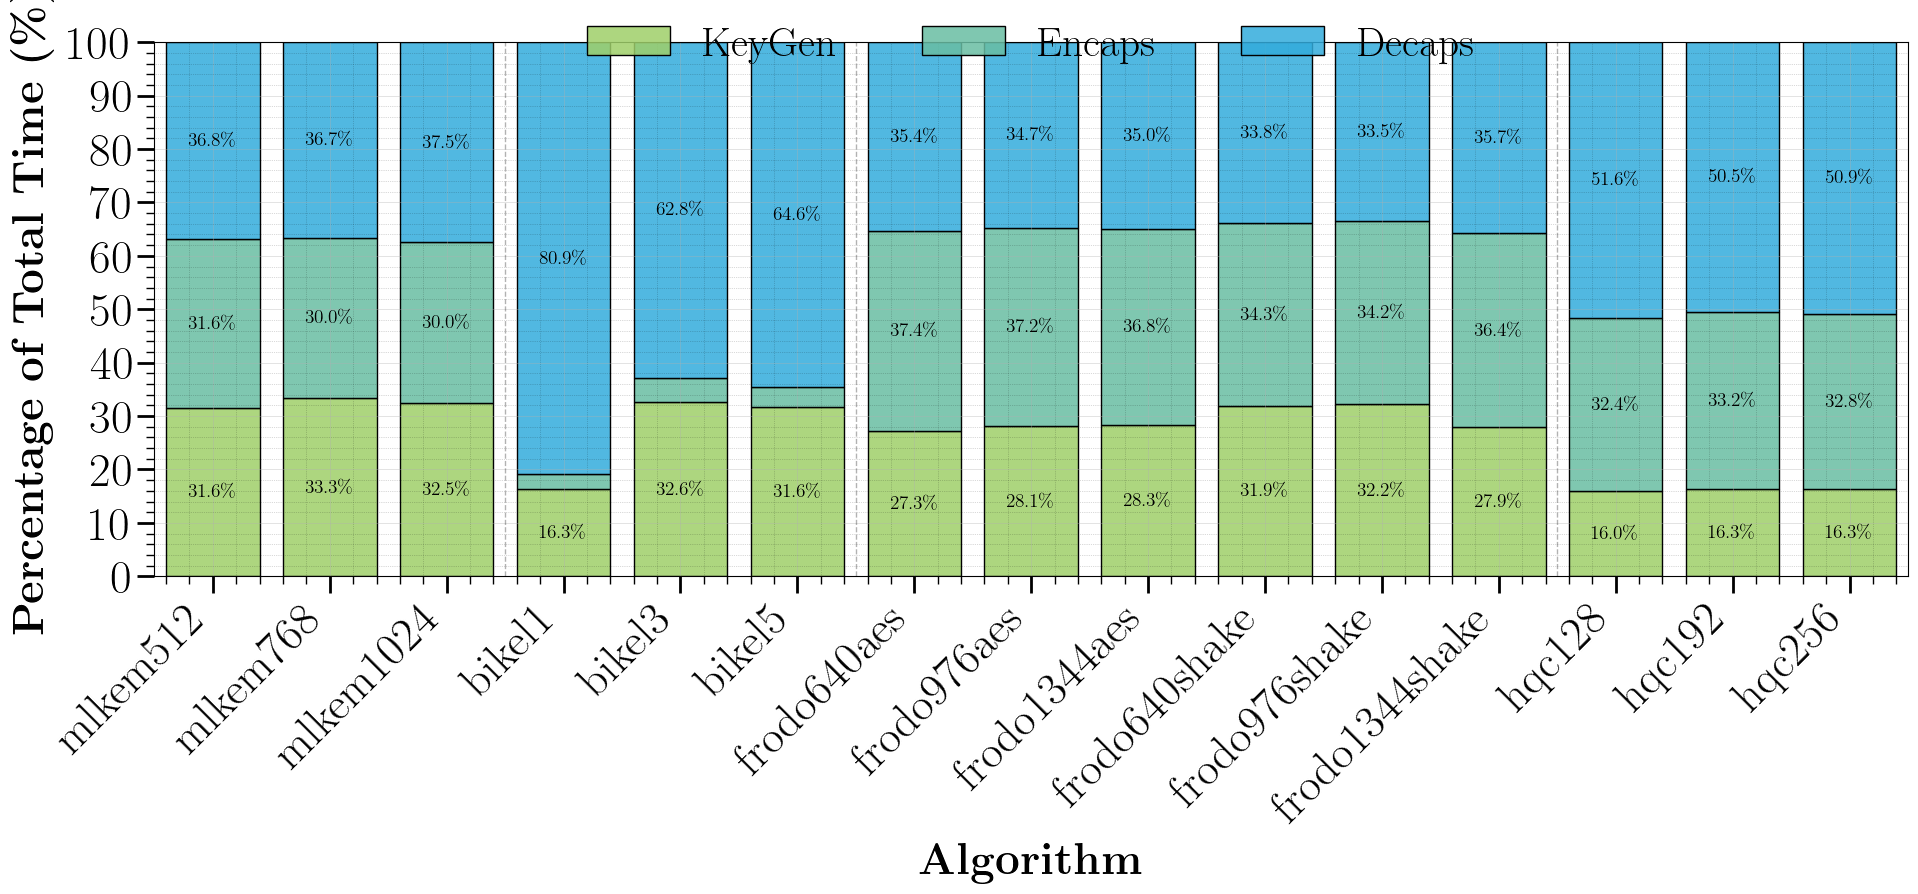

In [28]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="cerberis_CH_OFF_kems_ops_overhead.pdf")

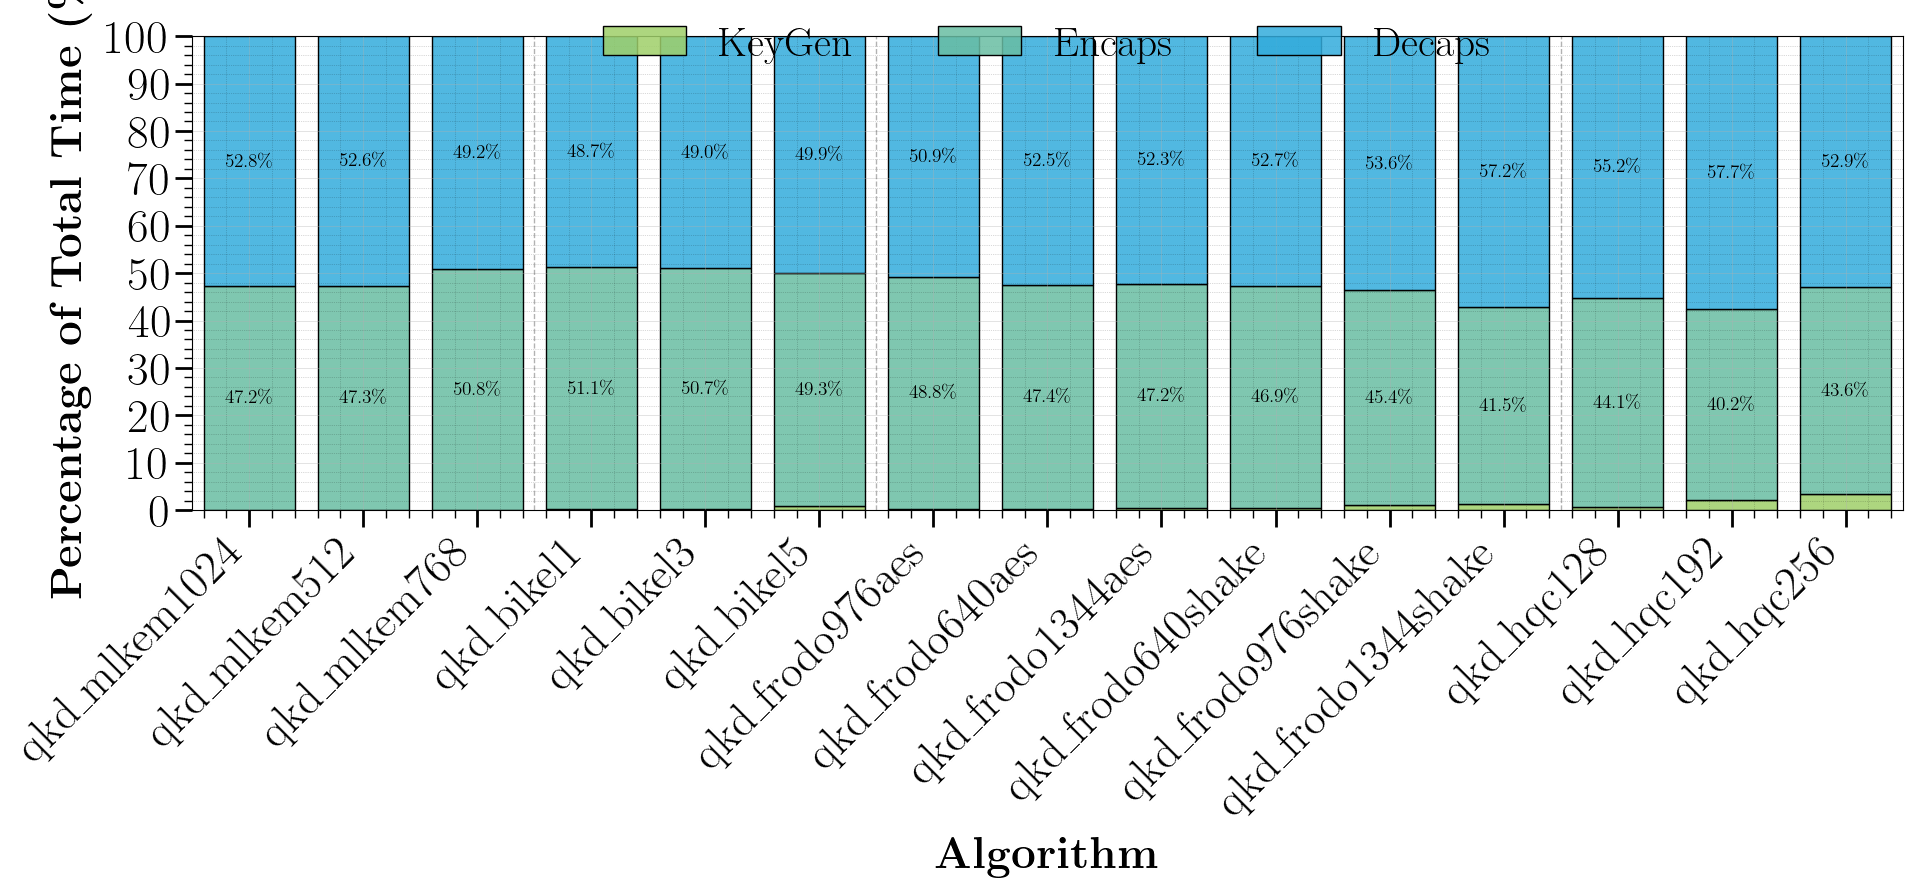

In [29]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="cerberis_CH_OFF_qkdkems_ops_overhead.pdf")

In [24]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['OQS', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats.to_csv("data/comparison_stats.csv")

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant Algorithm                                                        
OQS     bikel1                      3            0.144           0.002   
        bikel3                      3            0.386           0.002   
        bikel5                      3            0.977           0.016   
        frodo1344aes                3            0.779           0.014   
        frodo1344shake              3            2.650           0.022   
        frodo640aes                 3            0.246           0.008   
        frodo640shake               3            0.721           0.017   
        frodo976aes                 3            0.431           0.004   
        frodo976shake               3            1.495           0.011   
        hqc128                      3            1.110           0.004   
        hqc192                      3            3.375           0.002   
        hqc256                      3            6.140           0.035   
        mlkem1024                   3            0.015           0.000   
        mlkem512                    3            0.007           0.001   
        mlkem768                    3            0.012           0.001   
QKD     bikel1                      3         1066.767          70.695   
        bikel3                      3         1060.449          75.825   
        bikel5                      3         1043.554          26.422   
        frodo1344aes                3         1135.535           3.276   
        frodo1344shake              3         1126.056          50.683   
        frodo640aes                 3         1093.100          28.993   
        frodo640shake               3         1097.522          95.778   
        frodo976aes                 3         1045.809          48.221   
        frodo976shake               3         1032.476          53.380   
        hqc128                      3         1084.674          30.411   
        hqc192                      3         1111.629          35.103   
        hqc256                      3         1106.609          66.368   
        mlkem1024                   3         1051.798          60.953   
        mlkem512                    3         1068.675          57.316   
        mlkem768                    3         1046.723          75.280   

                        KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant Algorithm                                                         
OQS     bikel1                   0.143           0.146            0.032   
        bikel3                   0.384           0.387            0.076   
        bikel5                   0.959           0.987            0.151   
        frodo1344aes             0.766           0.793            1.062   
        frodo1344shake           2.634           2.675            2.819   
        frodo640aes              0.241           0.255            0.346   
        frodo640shake            0.706           0.740            0.786   
        frodo976aes              0.428           0.435            0.619   
        frodo976shake            1.483           1.503            1.592   
        hqc128                   1.107           1.114            2.222   
        hqc192                   3.373           3.377            6.821   
        hqc256                   6.100           6.163           12.346   
        mlkem1024                0.015           0.015            0.014   
        mlkem512                 0.007           0.008            0.006   
        mlkem768                 0.011           0.013            0.010   
QKD     bikel1                1005.602        1144.168          738.114   
        bikel3                 973.370        1111.882          666.062   
        bikel5                1026.646        1074.002          669.413   
        frodo1344aes          1132.483        1138.996          656.240   
        frodo1344shake        1092.404        1184.348          654.148   
     

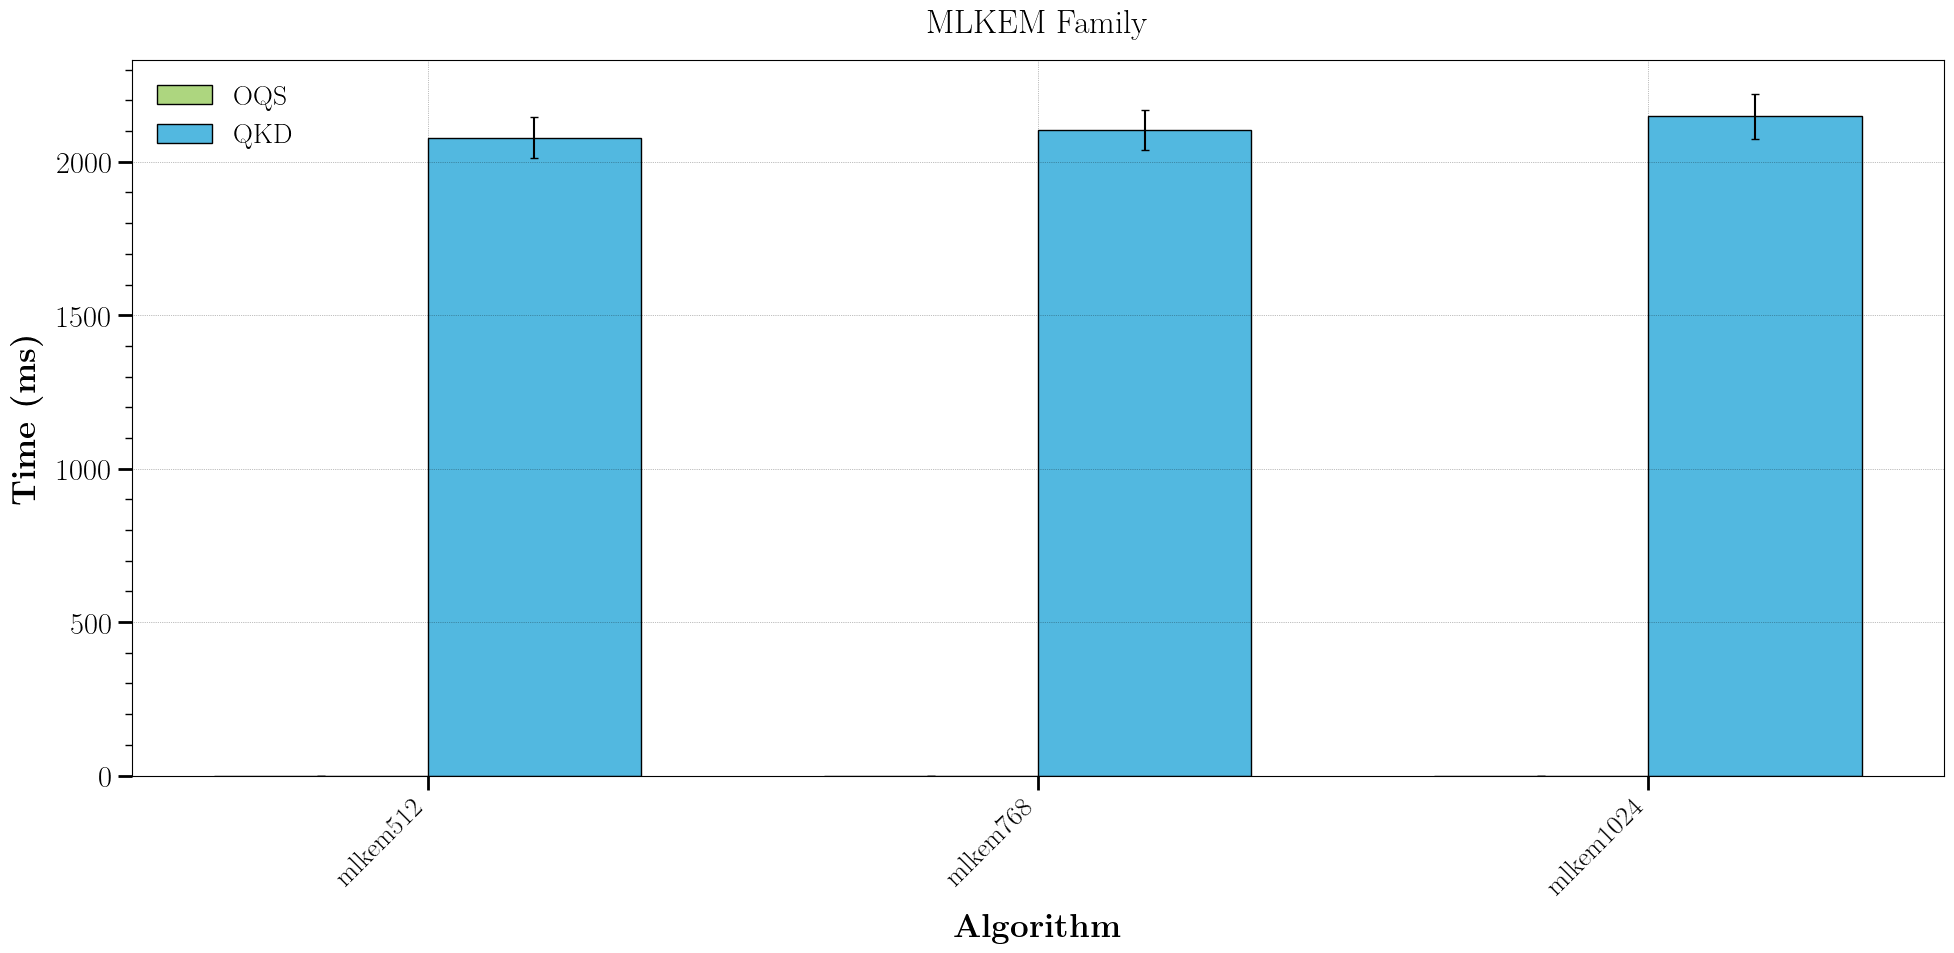

In [25]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

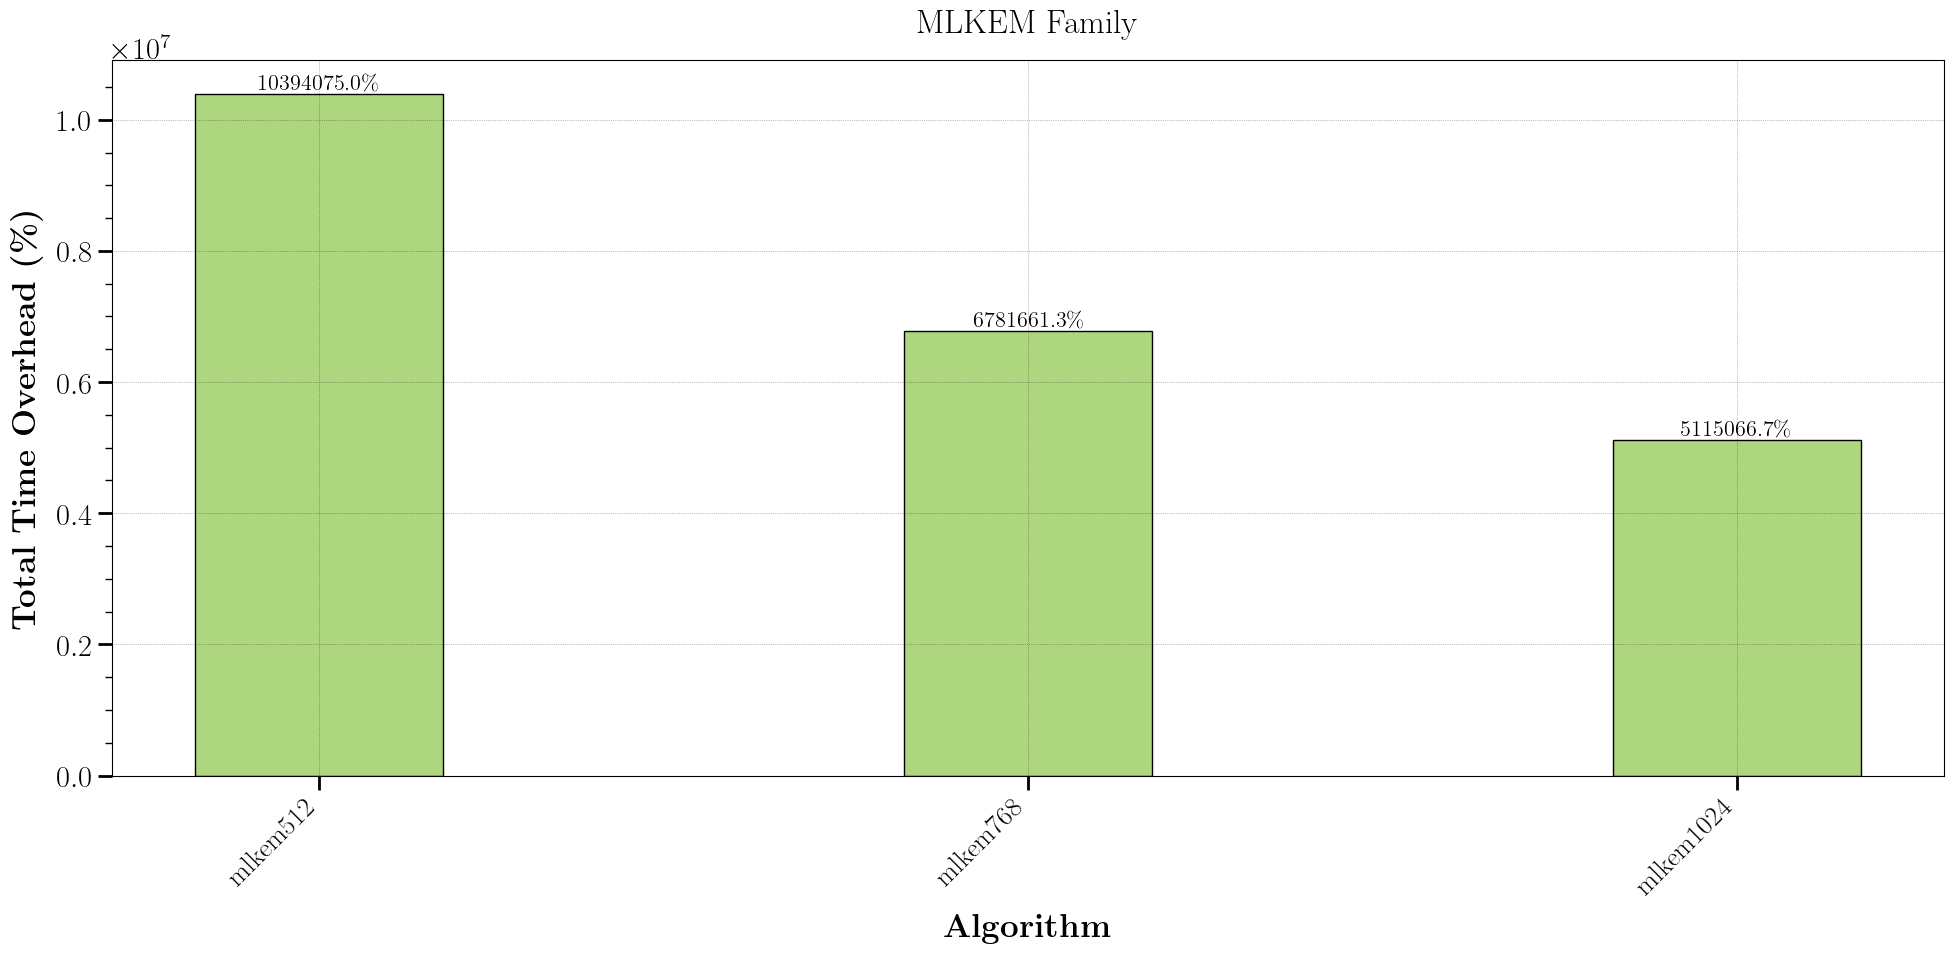

In [26]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', overhead=True, plot_title="mlkem_comparison_overhead.pdf")

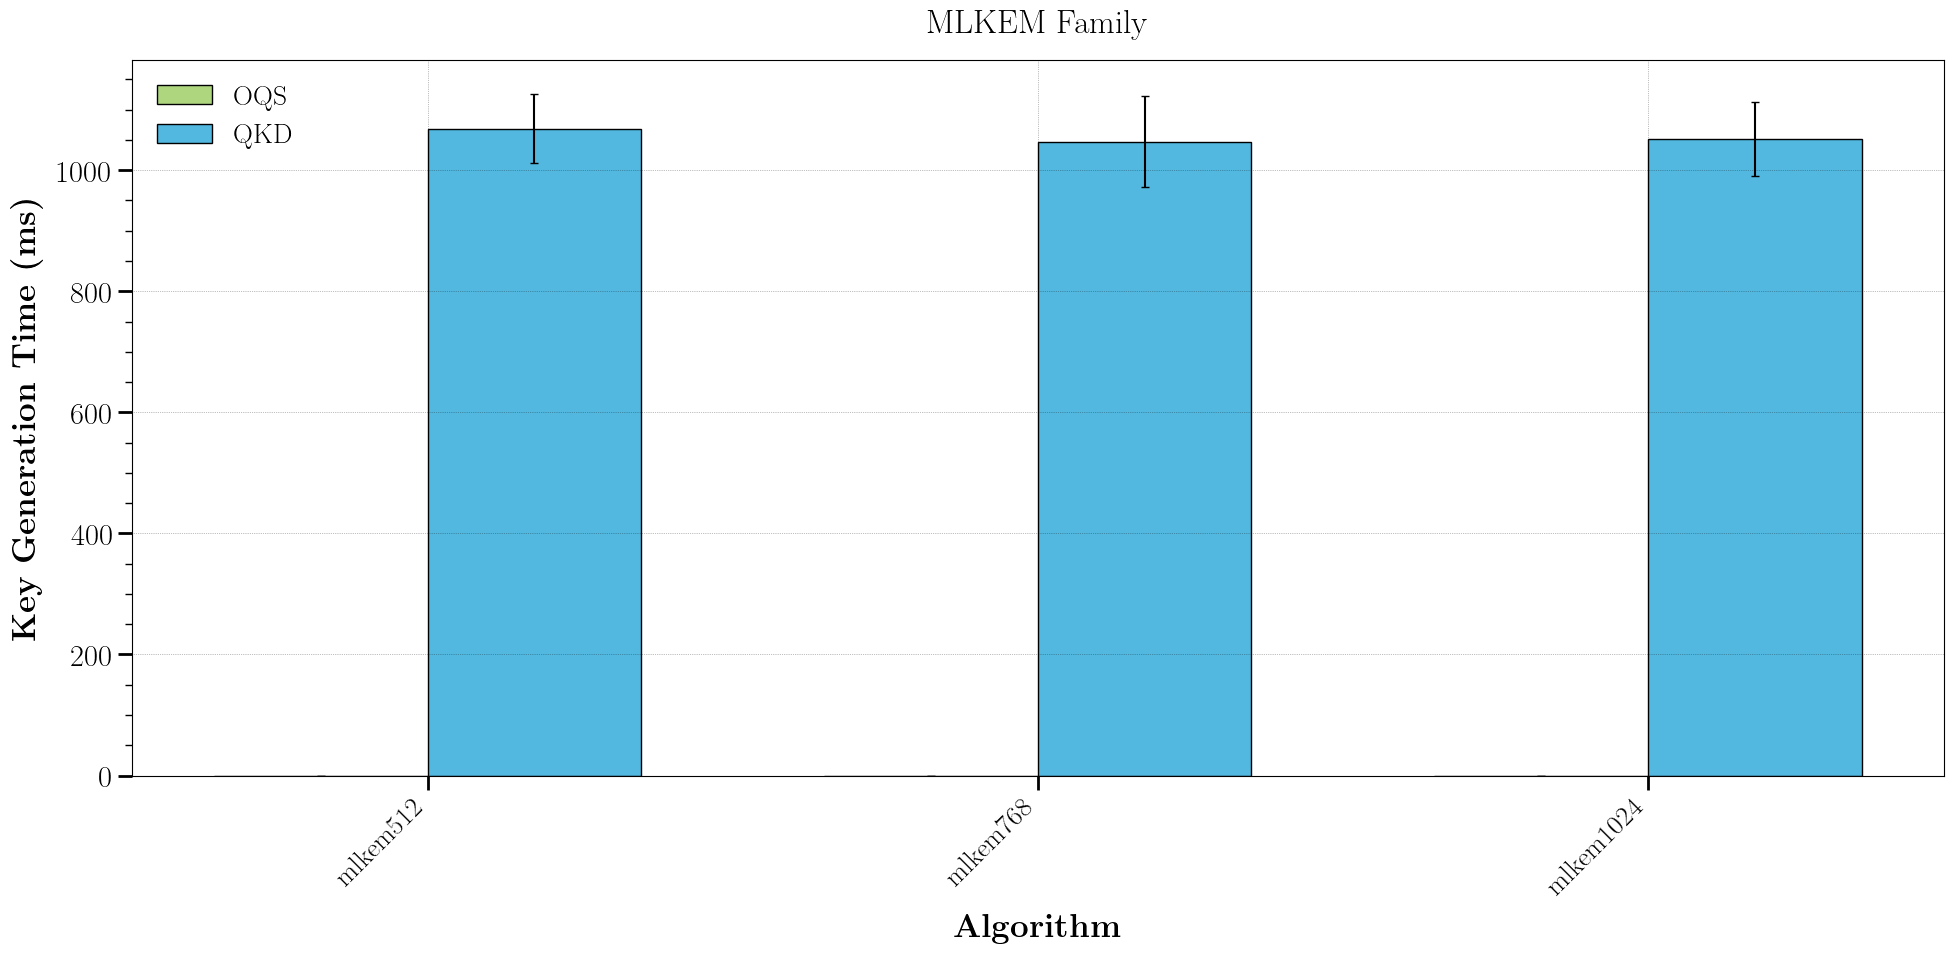

In [27]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

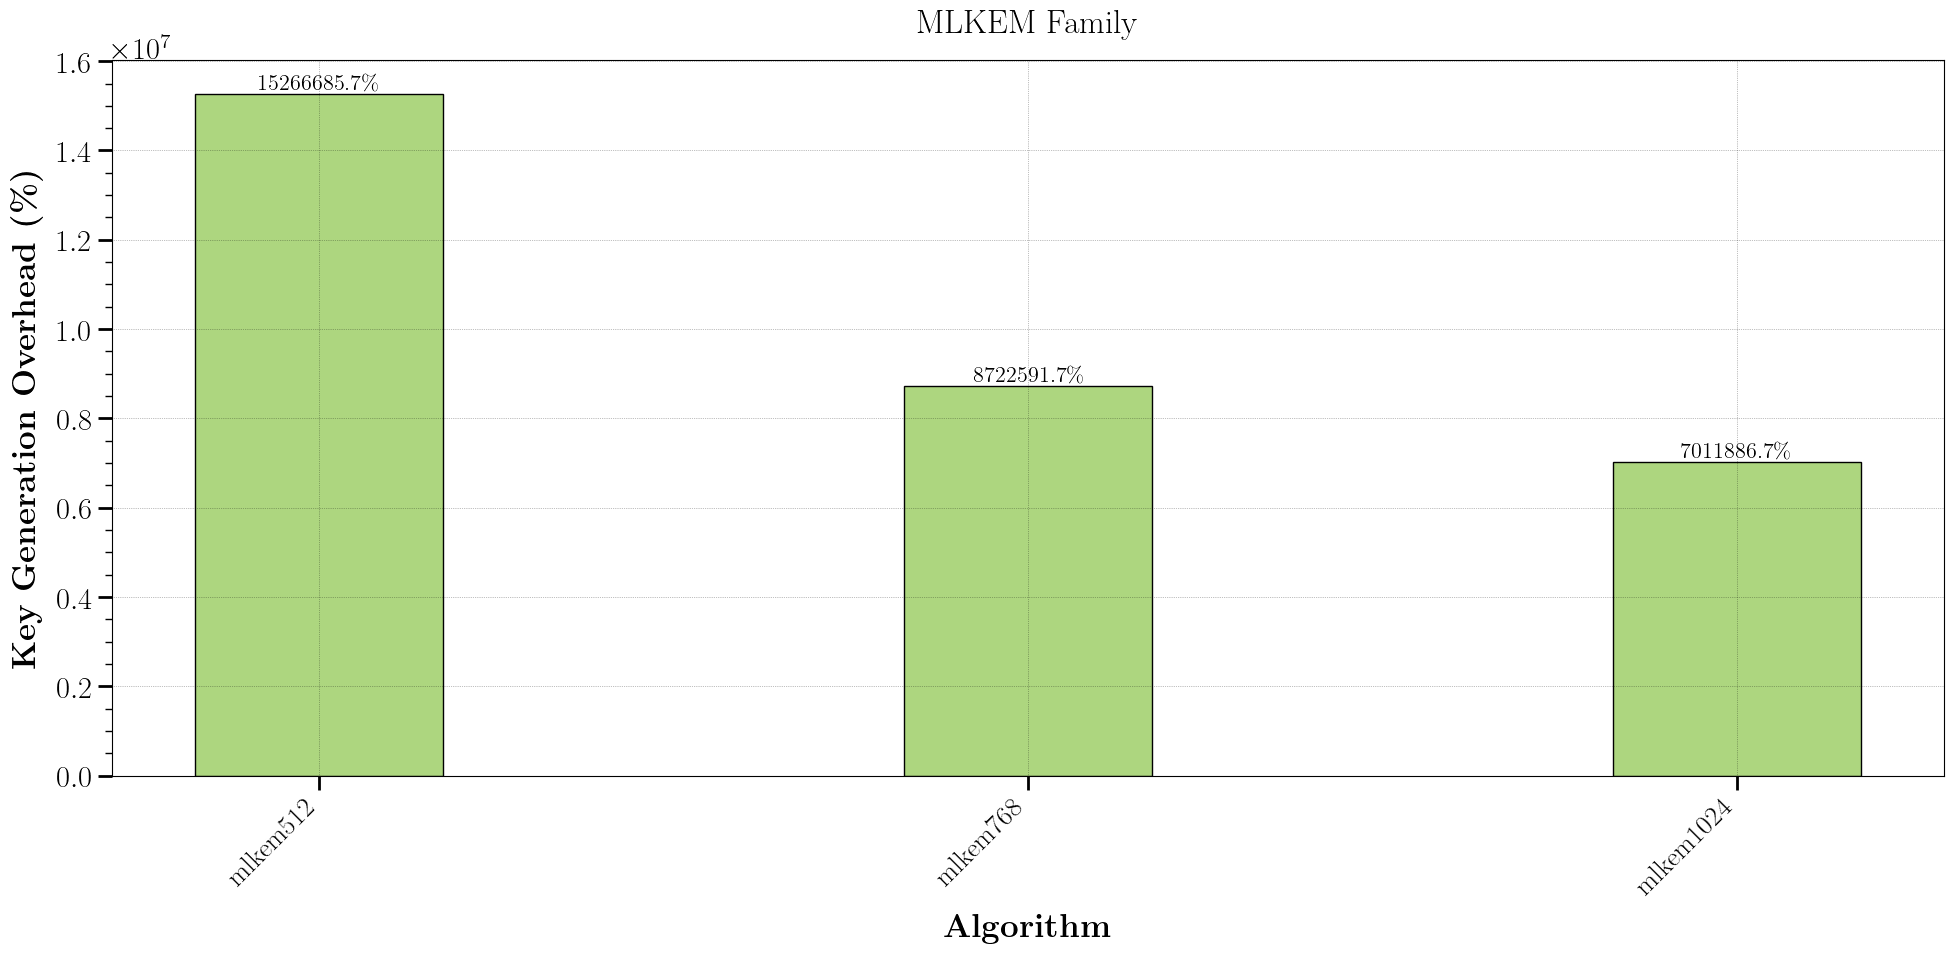

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

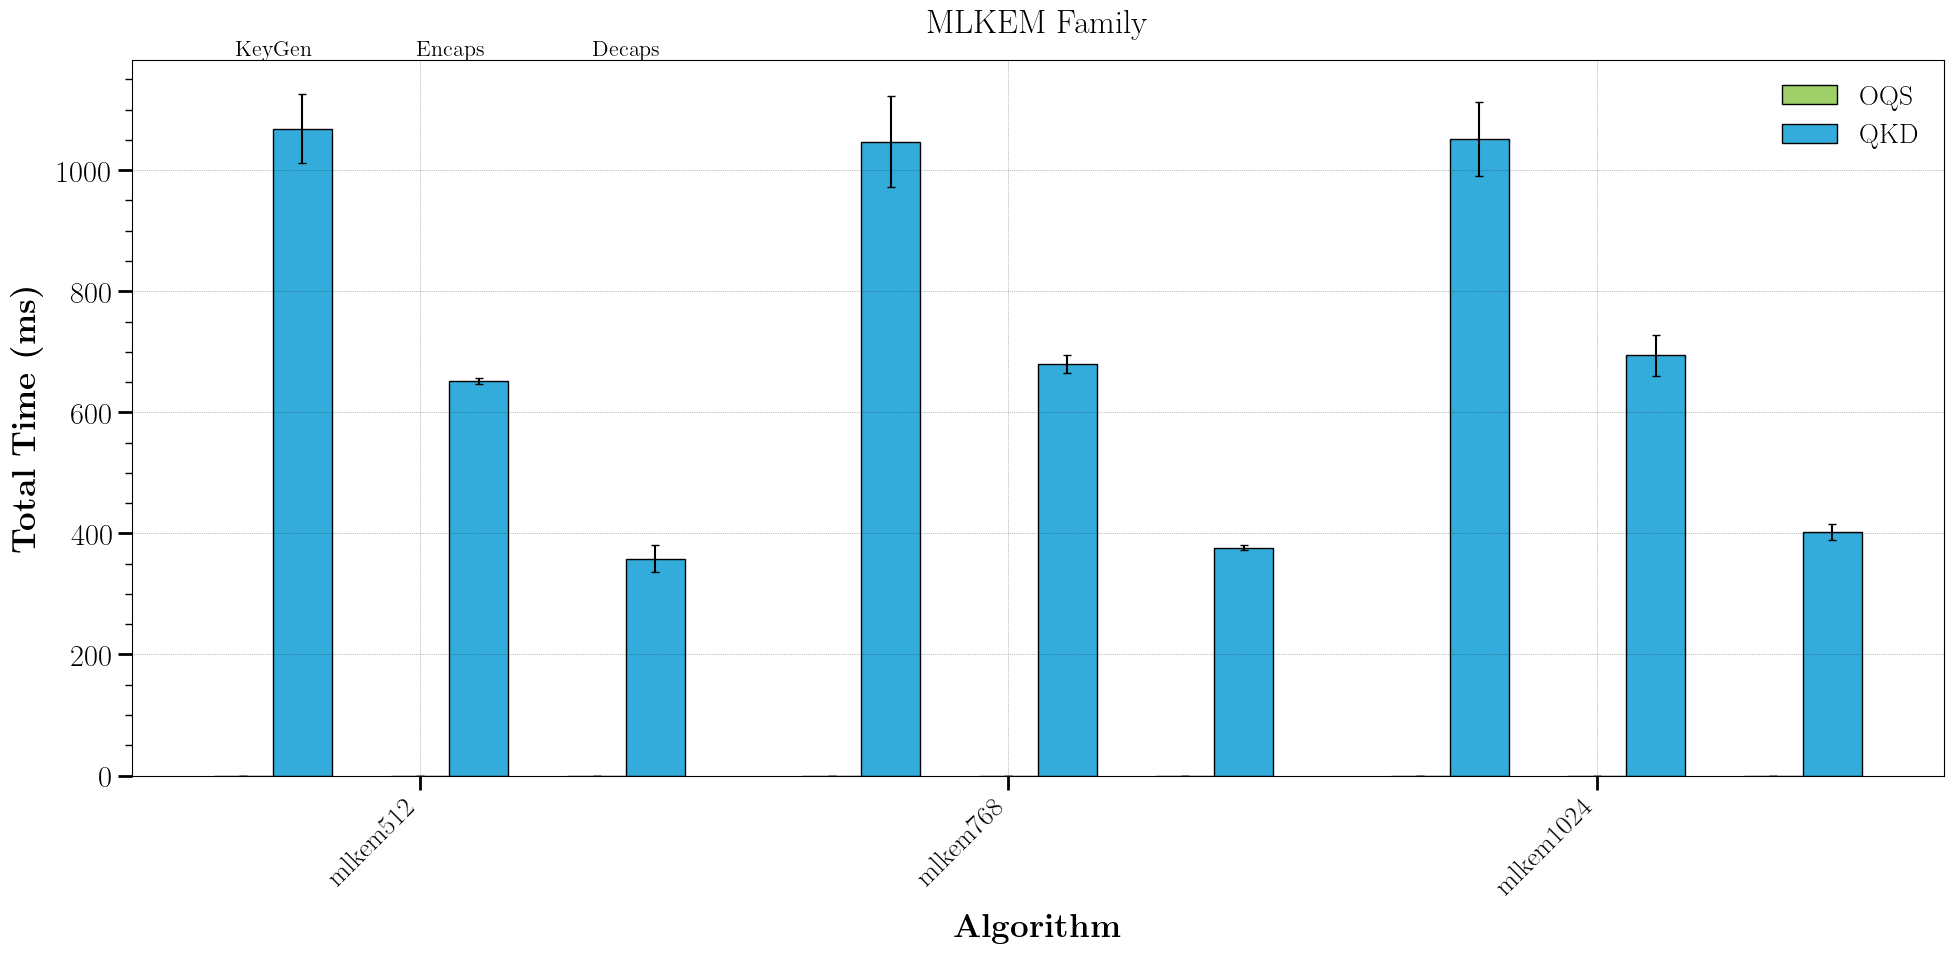

In [29]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

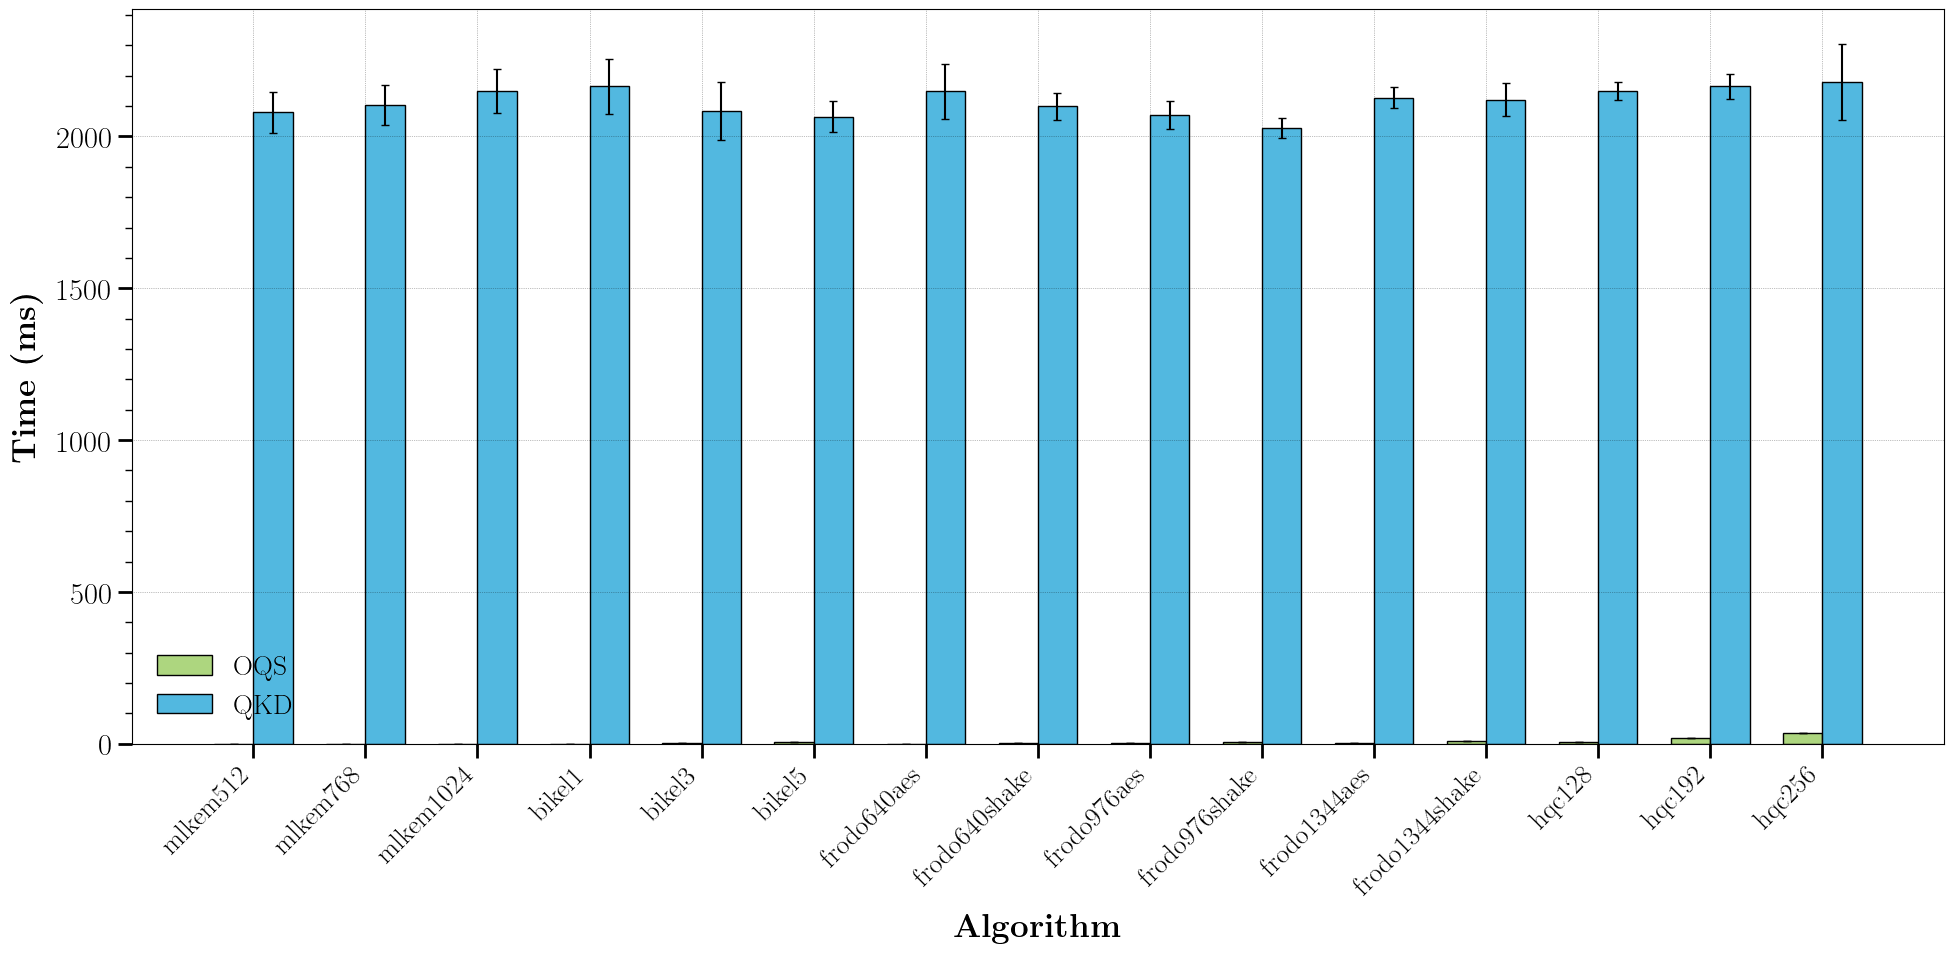

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

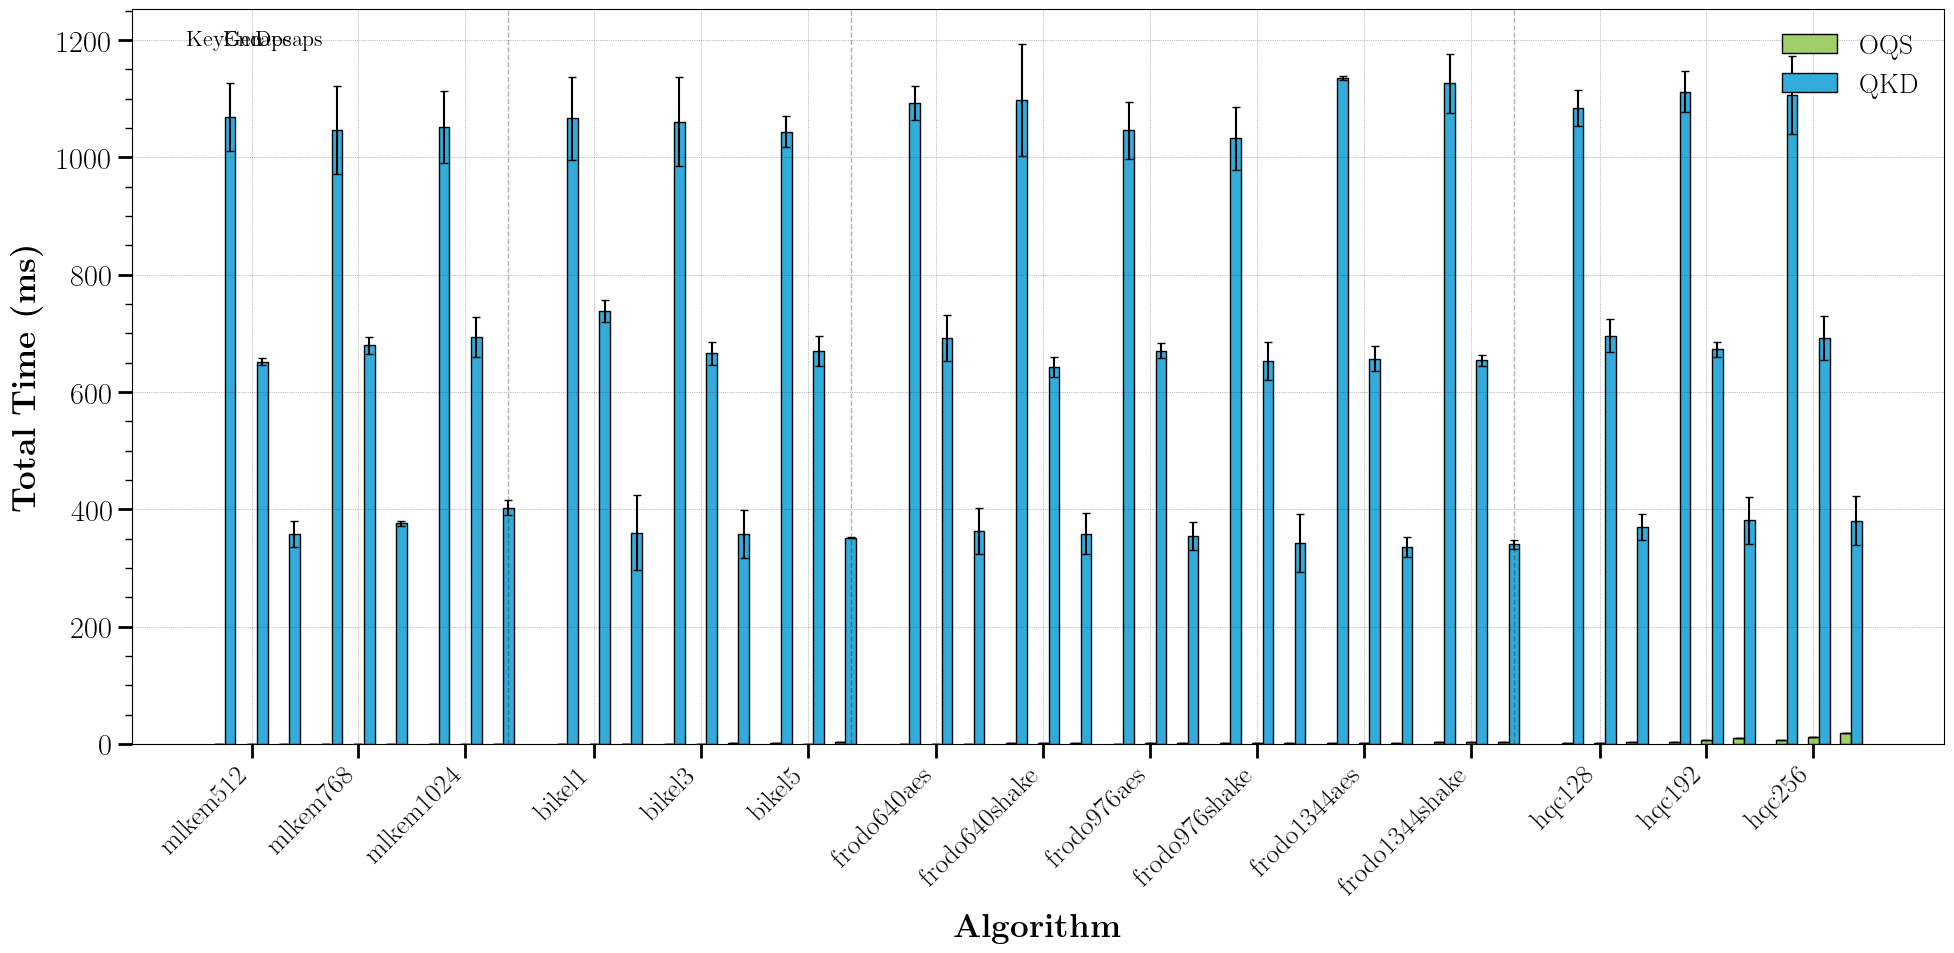

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='all',plot_title="kems_comparison_all.pdf")

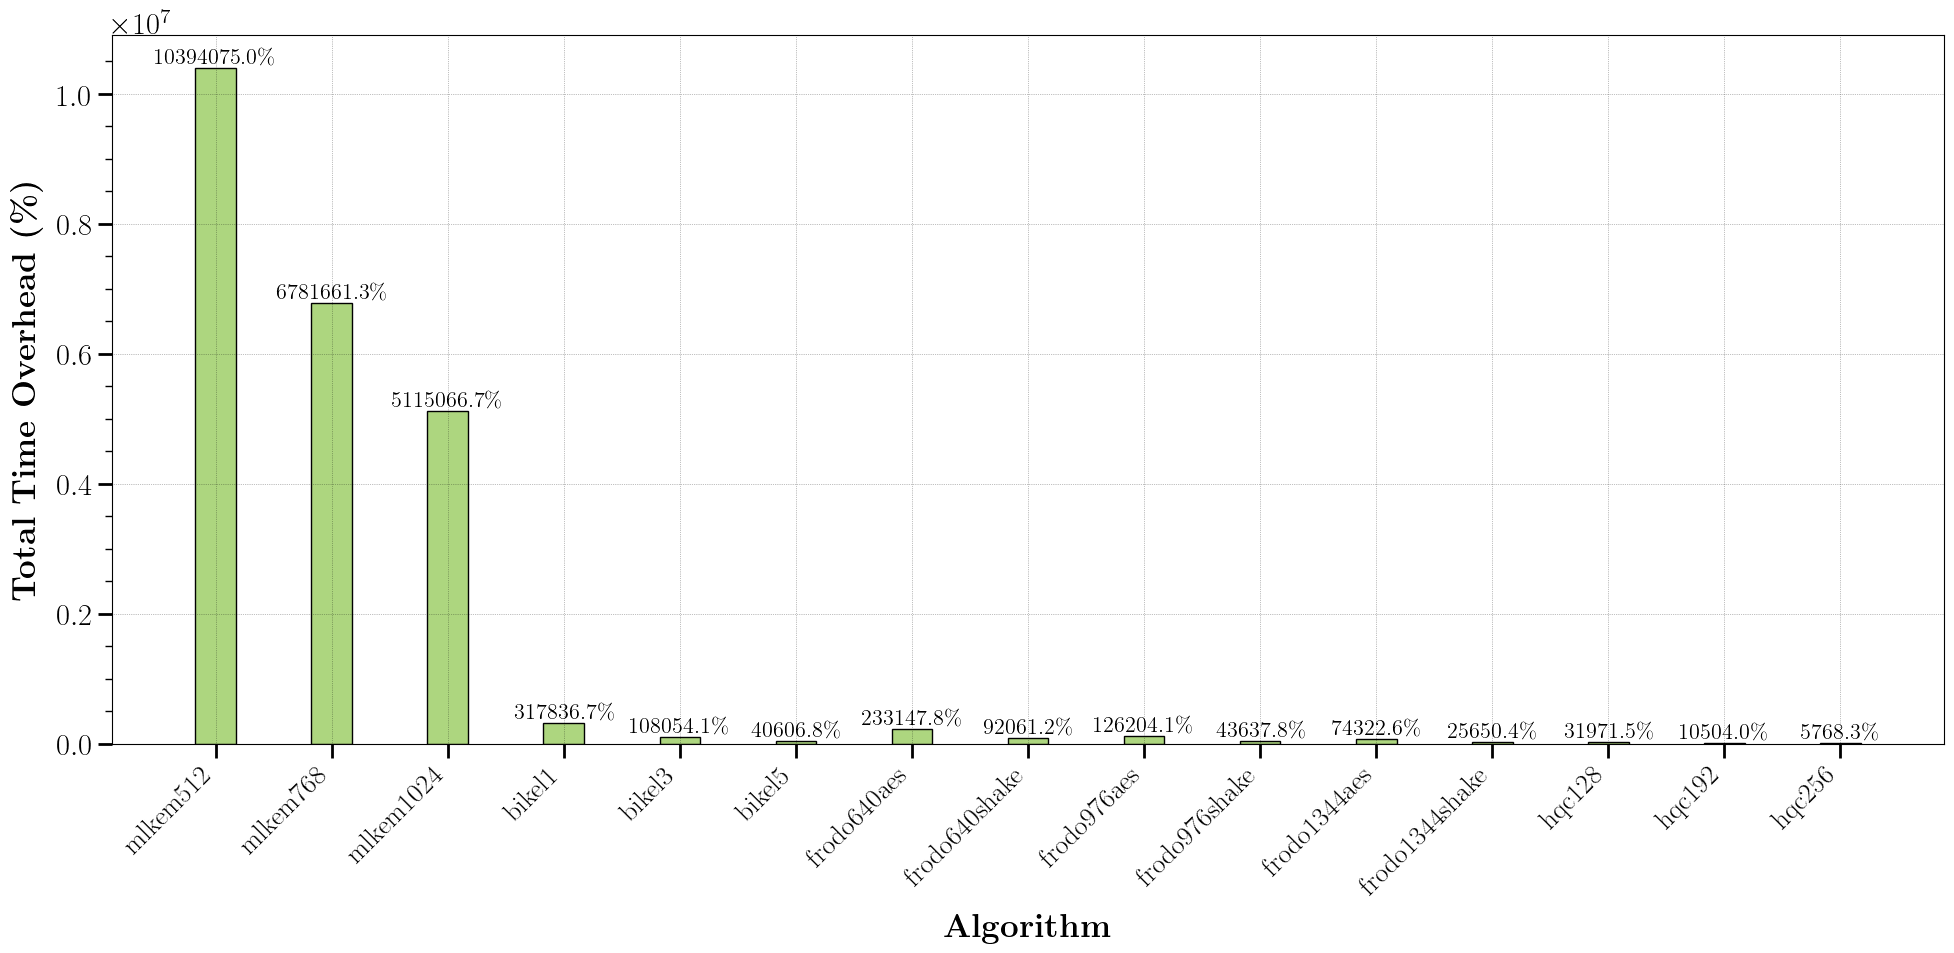

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

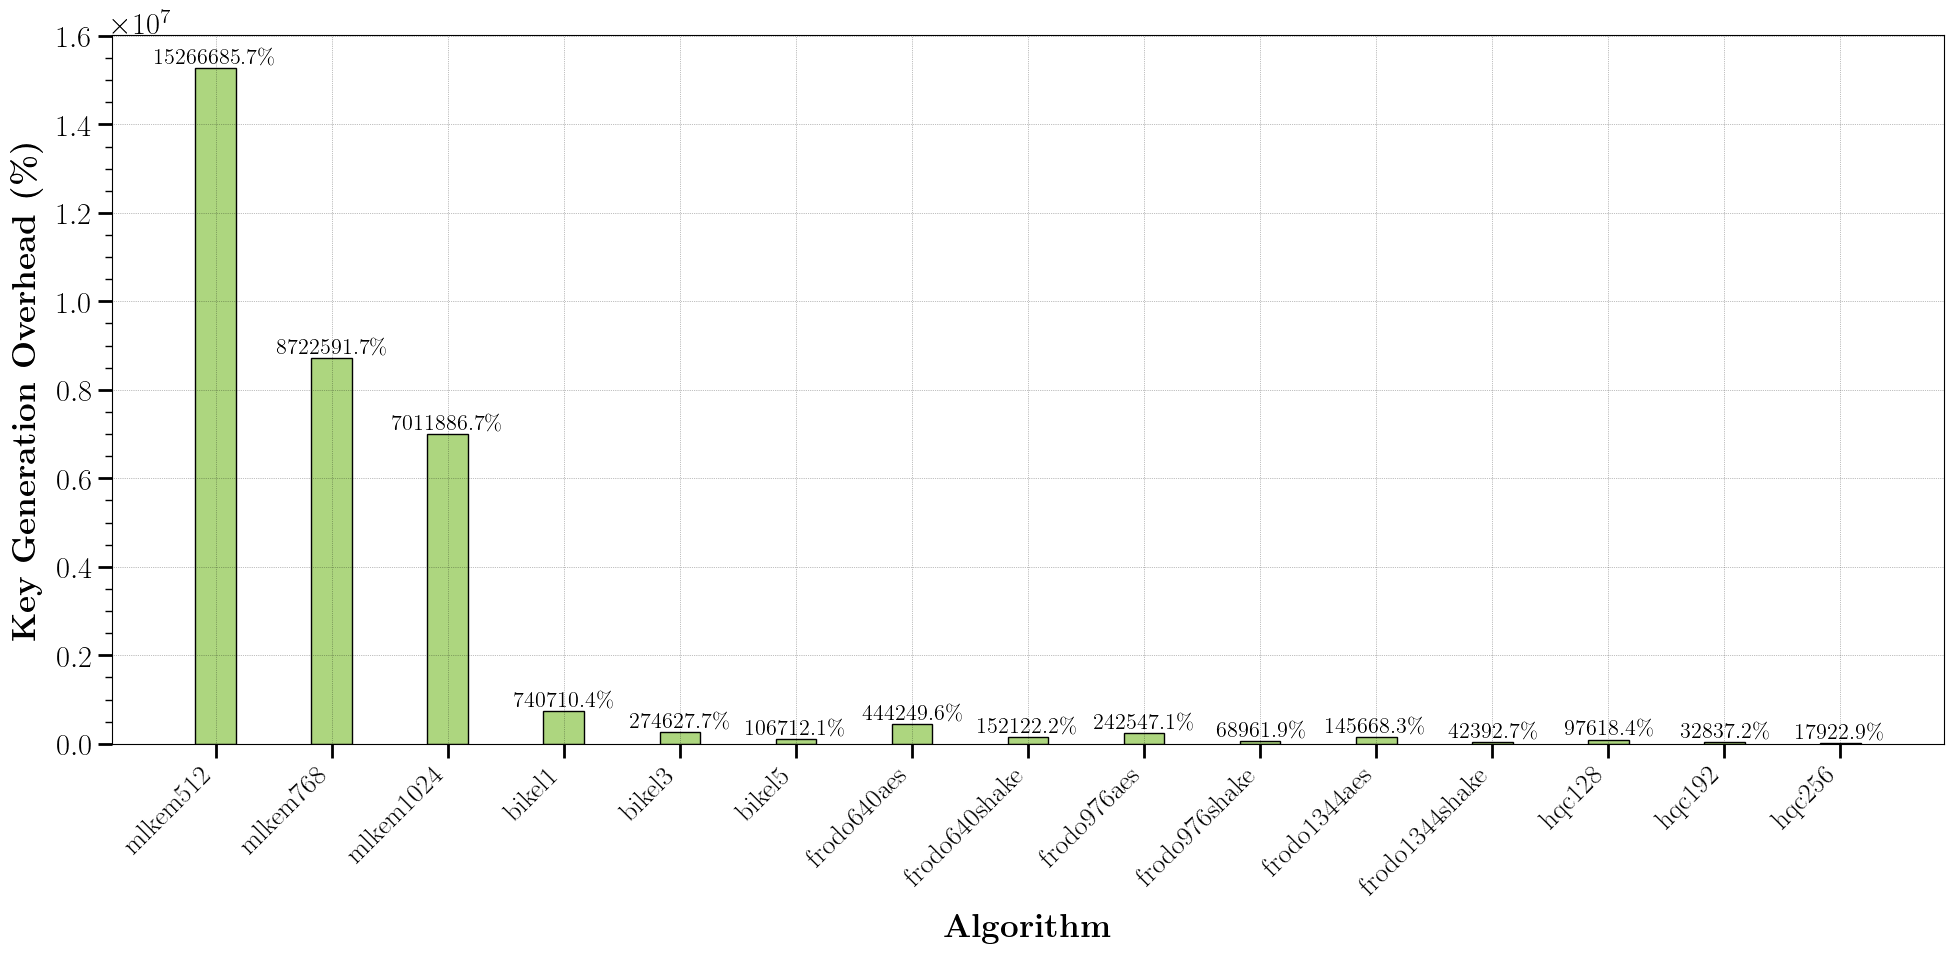

In [33]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kg_overhead.pdf")

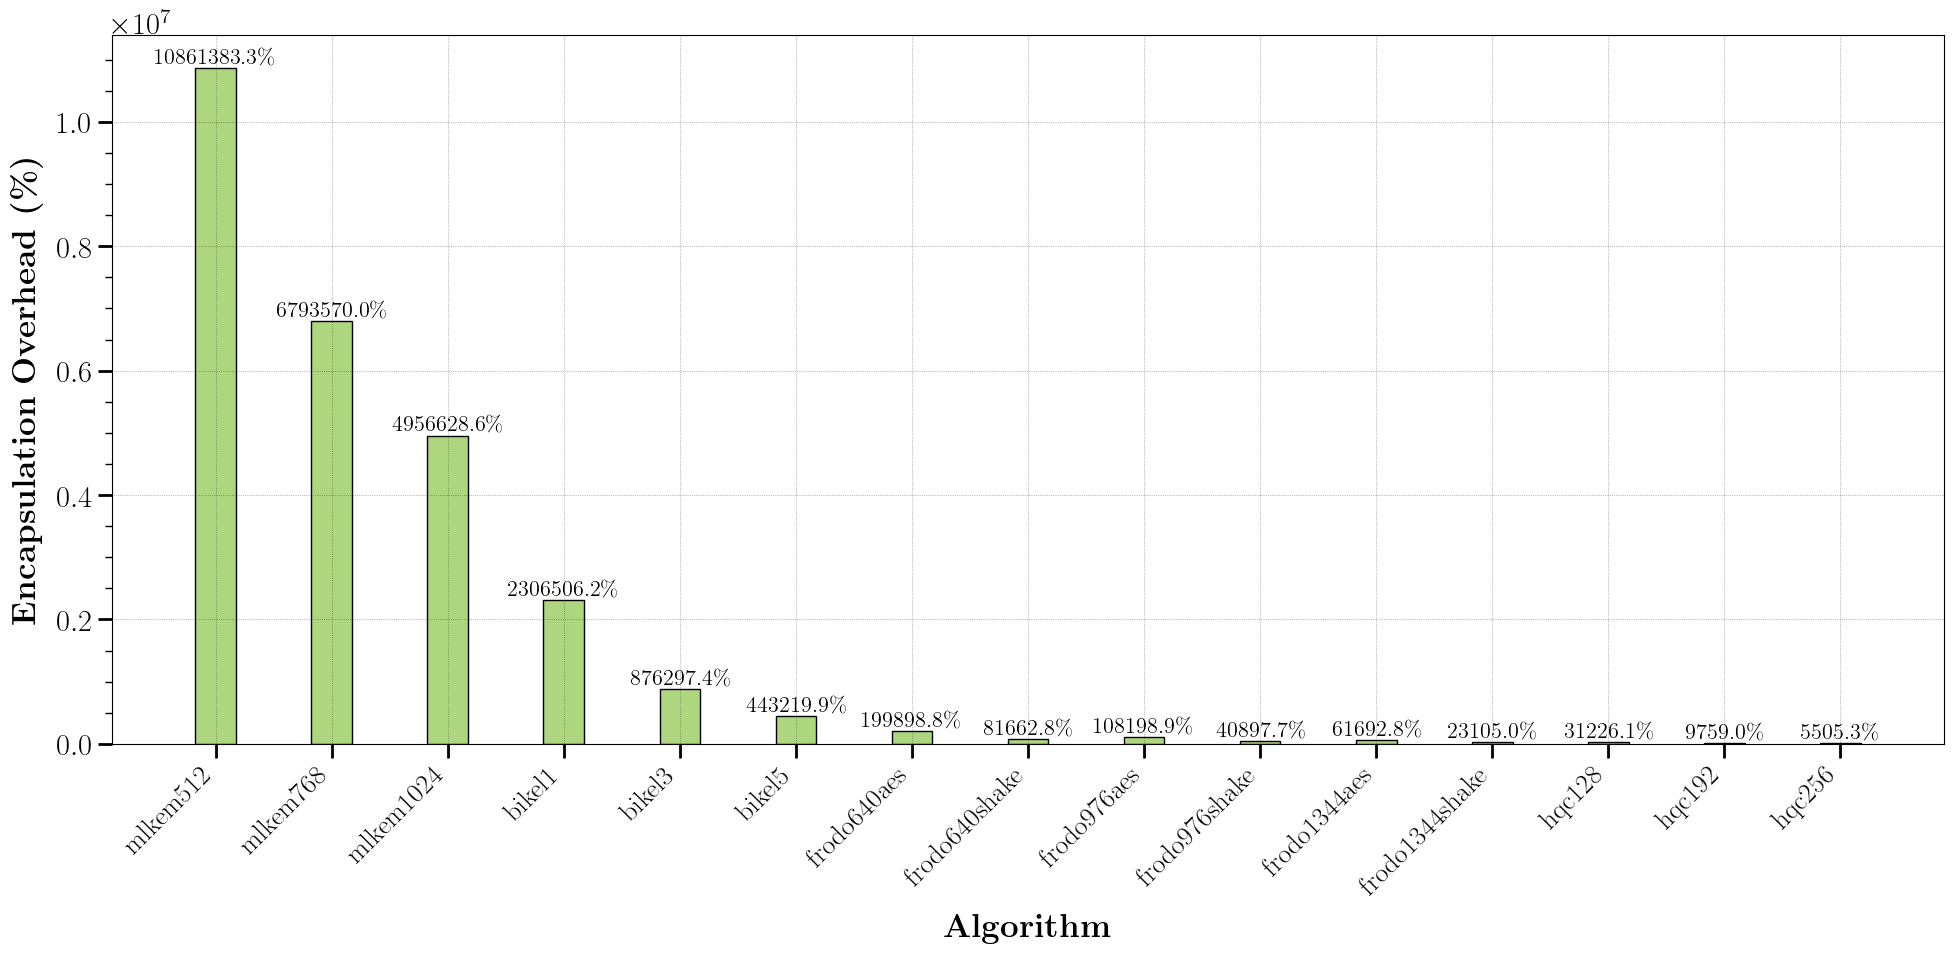

In [34]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encap_overhead.pdf")

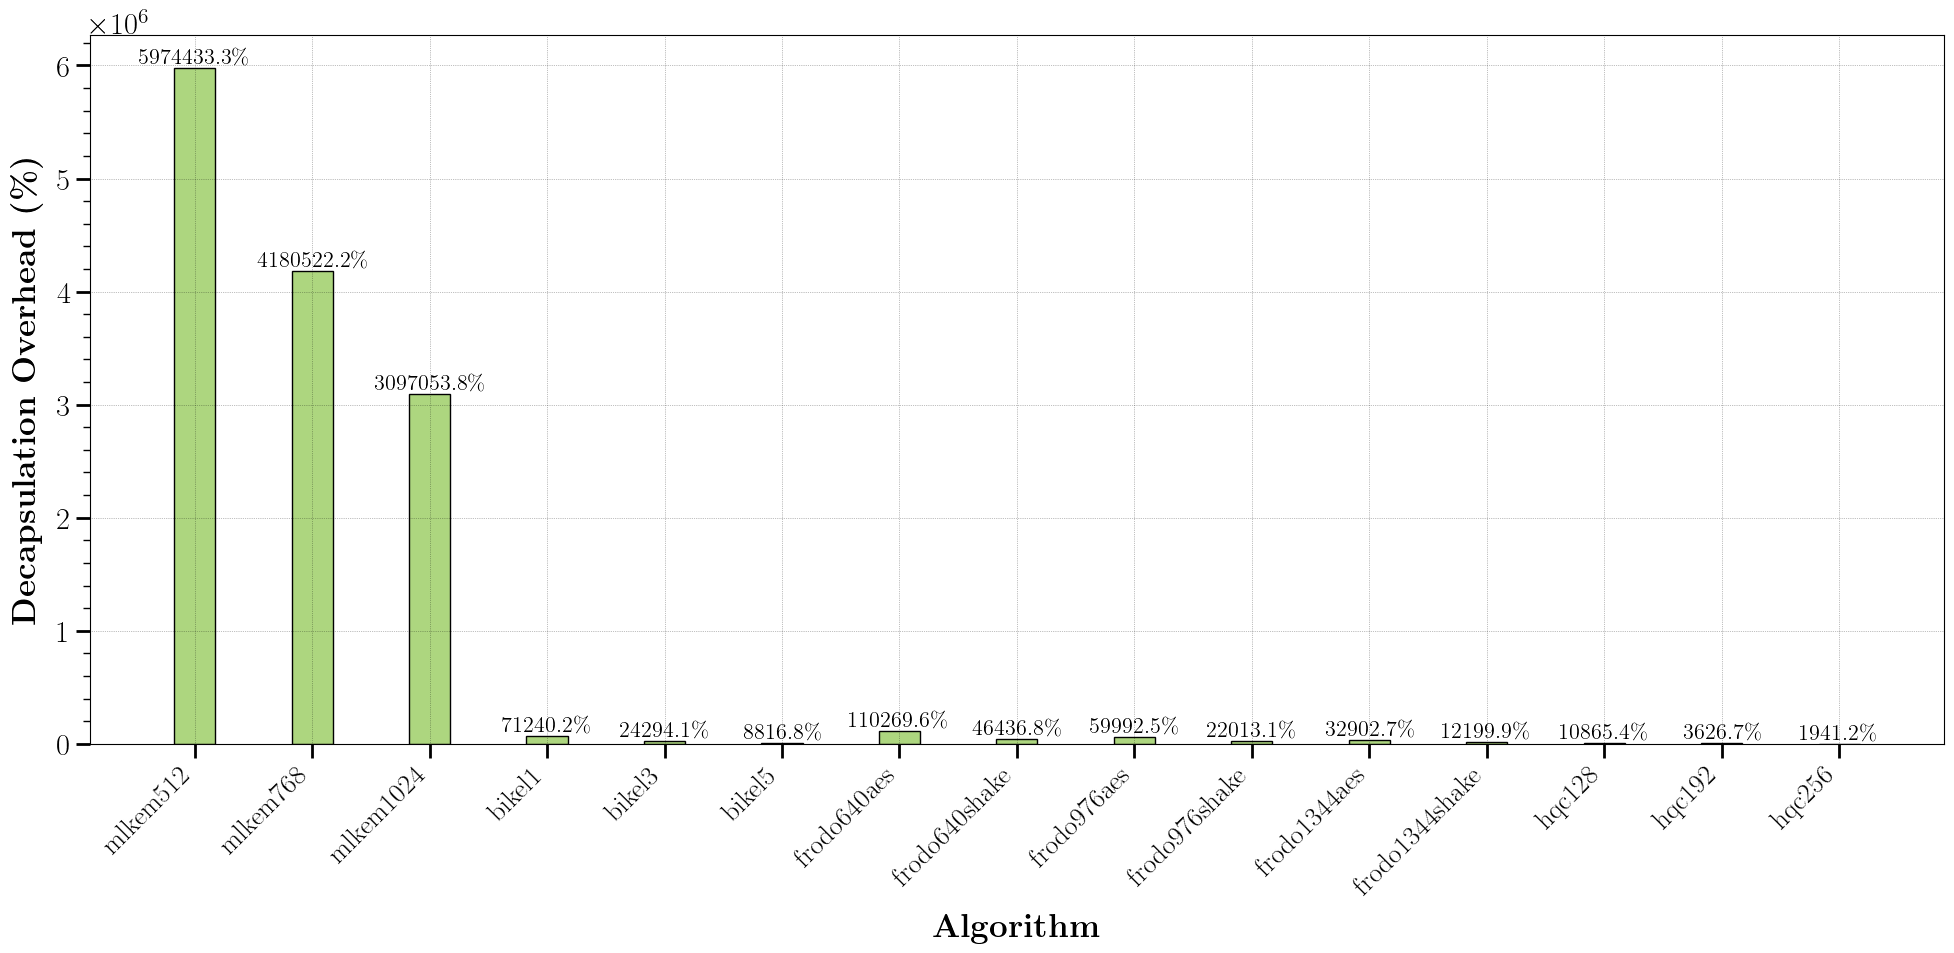

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decap_overhead.pdf")

# BENCHMARKS - TLS

In [3]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_20_iter_20250214.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024          20     14.679     0.192     14.23     15.05
          falcon512           20     14.734     0.188     14.37     15.03
          mldsa44             20     14.288     0.136     14.08     14.54
          mldsa65             20     14.720     0.837     14.00     18.17
          mldsa87             20     14.486     0.241     13.85     14.83
...                          ...        ...       ...       ...       ...
hqc256    mldsa65             20     72.832     0.523     71.89     74.11
          mldsa87             20     72.672     0.529     71.62     73.81
          rsa_2048            20     72.519     0.412     71.90     73.64
          rsa_3072            20     72.422     0.392     71.75     73.41
          rsa_4096            20     72.592     0.575     71.83     74.43

[120 rows x 5 columns]

In [4]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_20_iter_20250214.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024          20    283.314    20.340    228.24    315.76
          falcon512           20    283.198    21.286    237.58    330.03
          mldsa44             20    271.903    28.894    234.86    338.53
          mldsa65             20    275.968    32.520    233.07    336.80
          mldsa87             20    273.646    24.335    236.80    298.67
...                          ...        ...       ...       ...       ...
hqc256    mldsa65             20    369.654    22.799    334.51    389.54
          mldsa87             20    380.128    18.483    335.36    395.42
          rsa_2048            20    349.988    11.779    330.42    387.50
          rsa_3072            20    351.750    18.586    332.69    387.97
          rsa_4096            20    554.035   239.049    335.48    911.42

[120 rows x 5 columns]

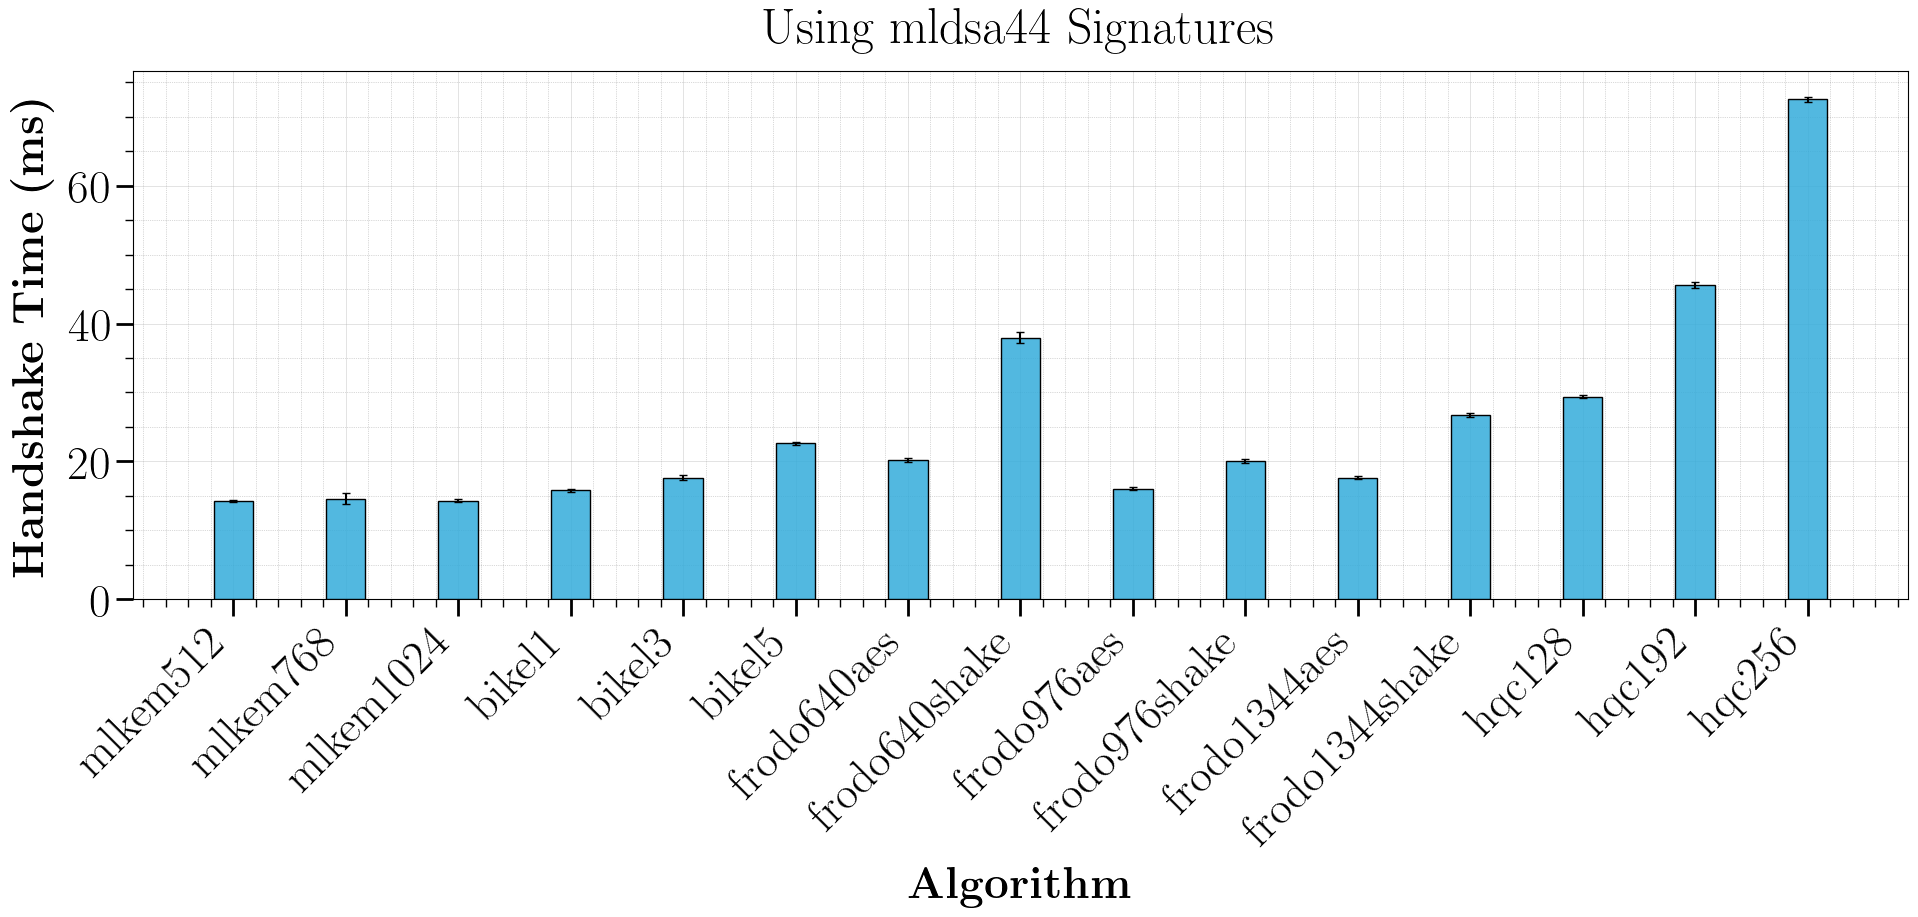

In [5]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="cerberis_CH_OFF_tls_kems_mldsa44.pdf")

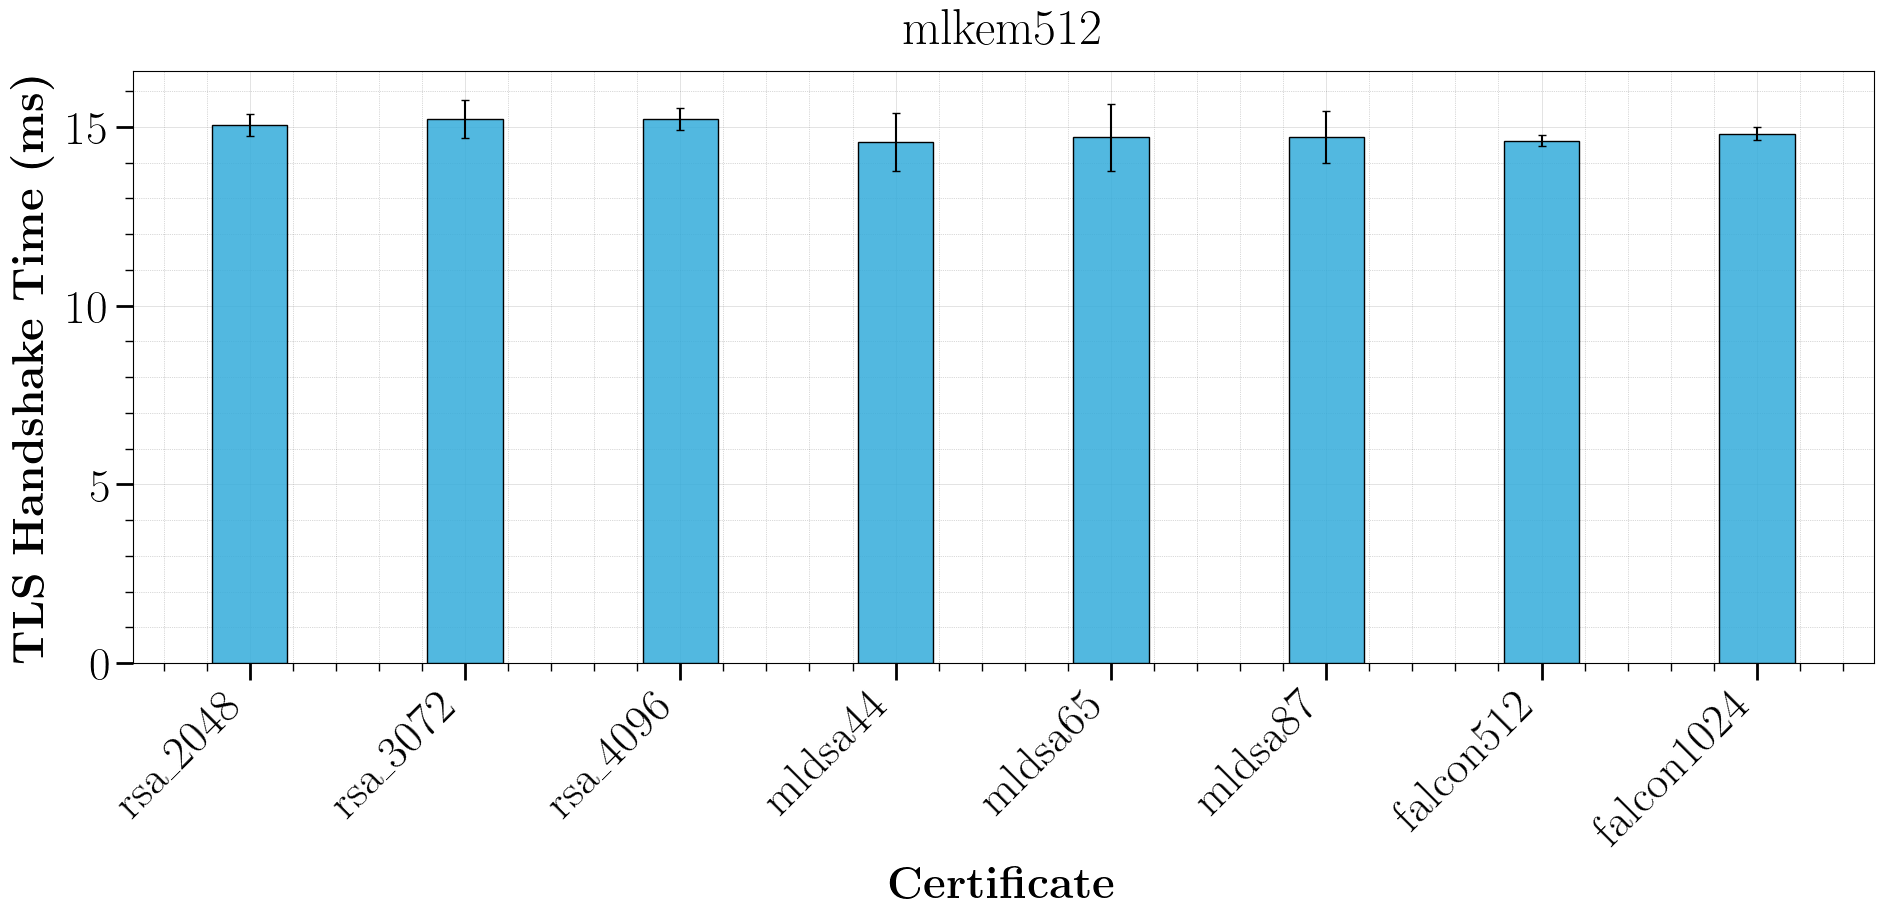

In [6]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="cerberis_CH_OFF_tls_certs_mlkem512.pdf")

In [7]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df.to_csv("data/tls_comparison_stats.csv")

merged_df

Time_count  Time_mean  Time_std  Time_min  \
Provider KEM       Cert                                                    
OQS      mlkem1024 falcon1024          20     14.679     0.192     14.23   
                   falcon512           20     14.734     0.188     14.37   
                   mldsa44             20     14.288     0.136     14.08   
                   mldsa65             20     14.720     0.837     14.00   
                   mldsa87             20     14.486     0.241     13.85   
...                                   ...        ...       ...       ...   
QKD      hqc256    mldsa65             20    369.654    22.799    334.51   
                   mldsa87             20    380.128    18.483    335.36   
                   rsa_2048            20    349.988    11.779    330.42   
                   rsa_3072            20    351.750    18.586    332.69   
                   rsa_4096            20    554.035   239.049    335.48   

                               Time_max  
Provider KEM       Cert                  
OQS      mlkem1024 falcon1024     15.05  
                   falcon512      15.03  
                   mldsa44        14.54  
                   mldsa65        18.17  
                   mldsa87        14.83  
...                                 ...  
QKD      hqc256    mldsa65       389.54  
                   mldsa87       395.42  
                   rsa_2048      387.50  
                   rsa_3072      387.97  
                   rsa_4096      911.42  

[240 rows x 5 columns]

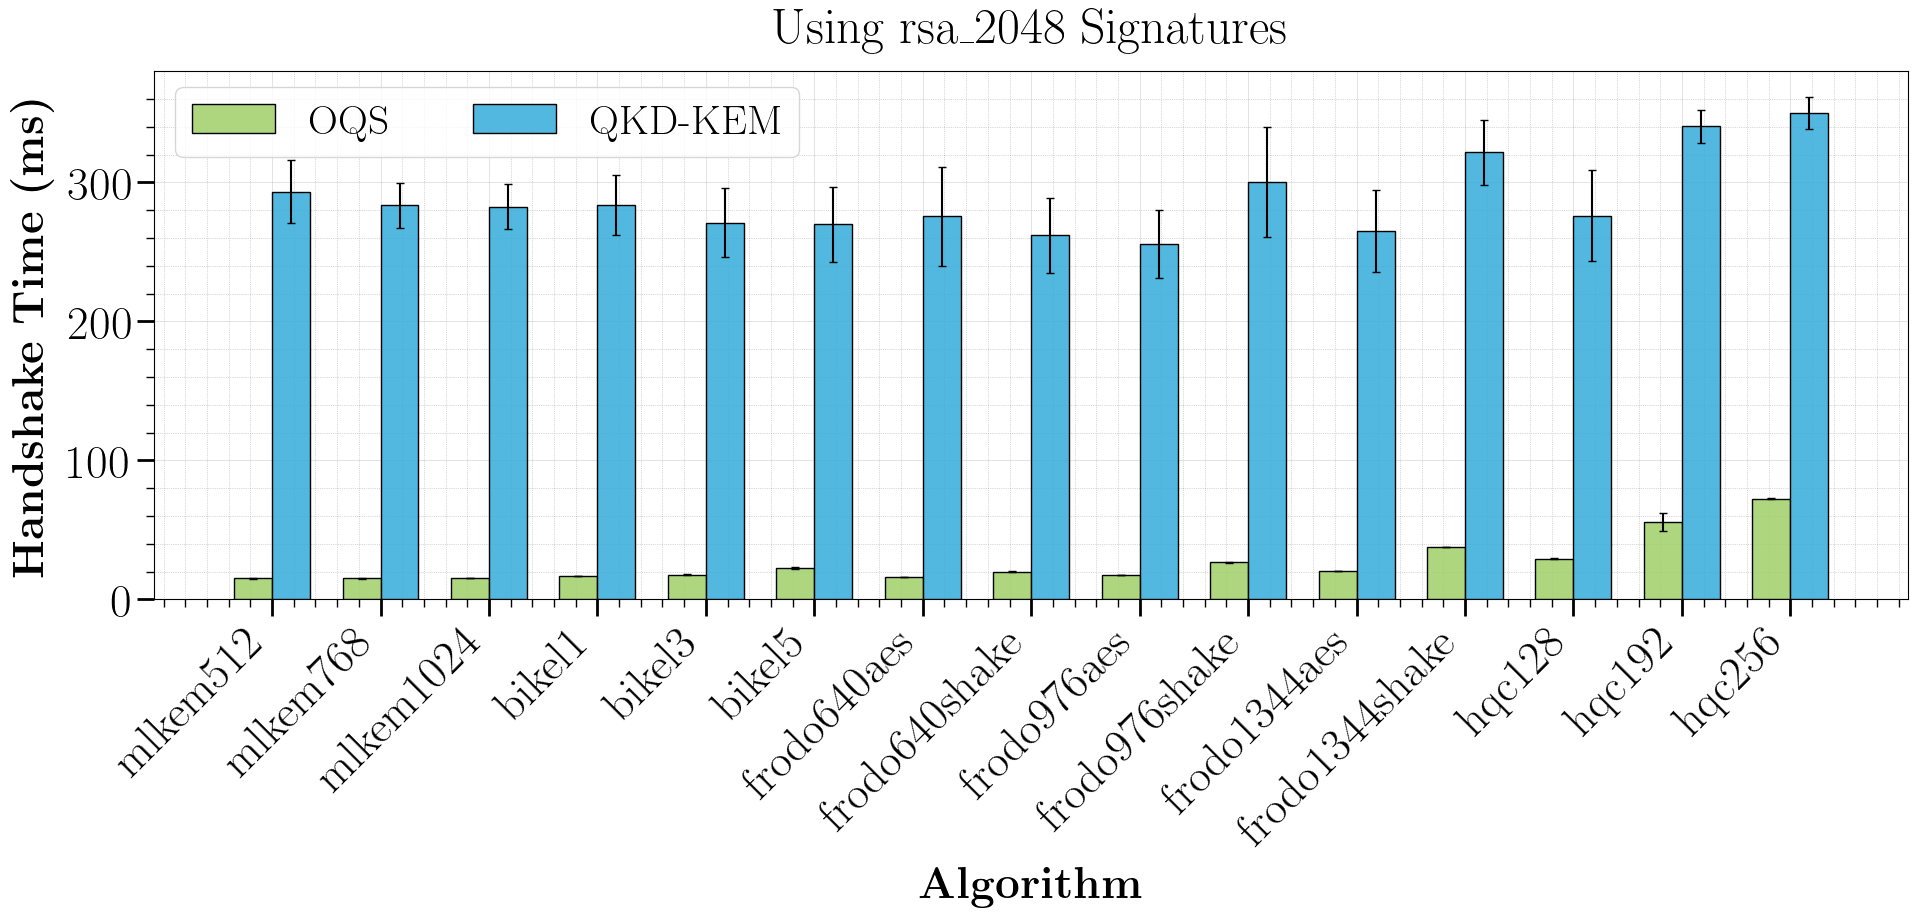

In [8]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='cerberis_CH_OFF_tls_kems_comparison_rsa2048.pdf')

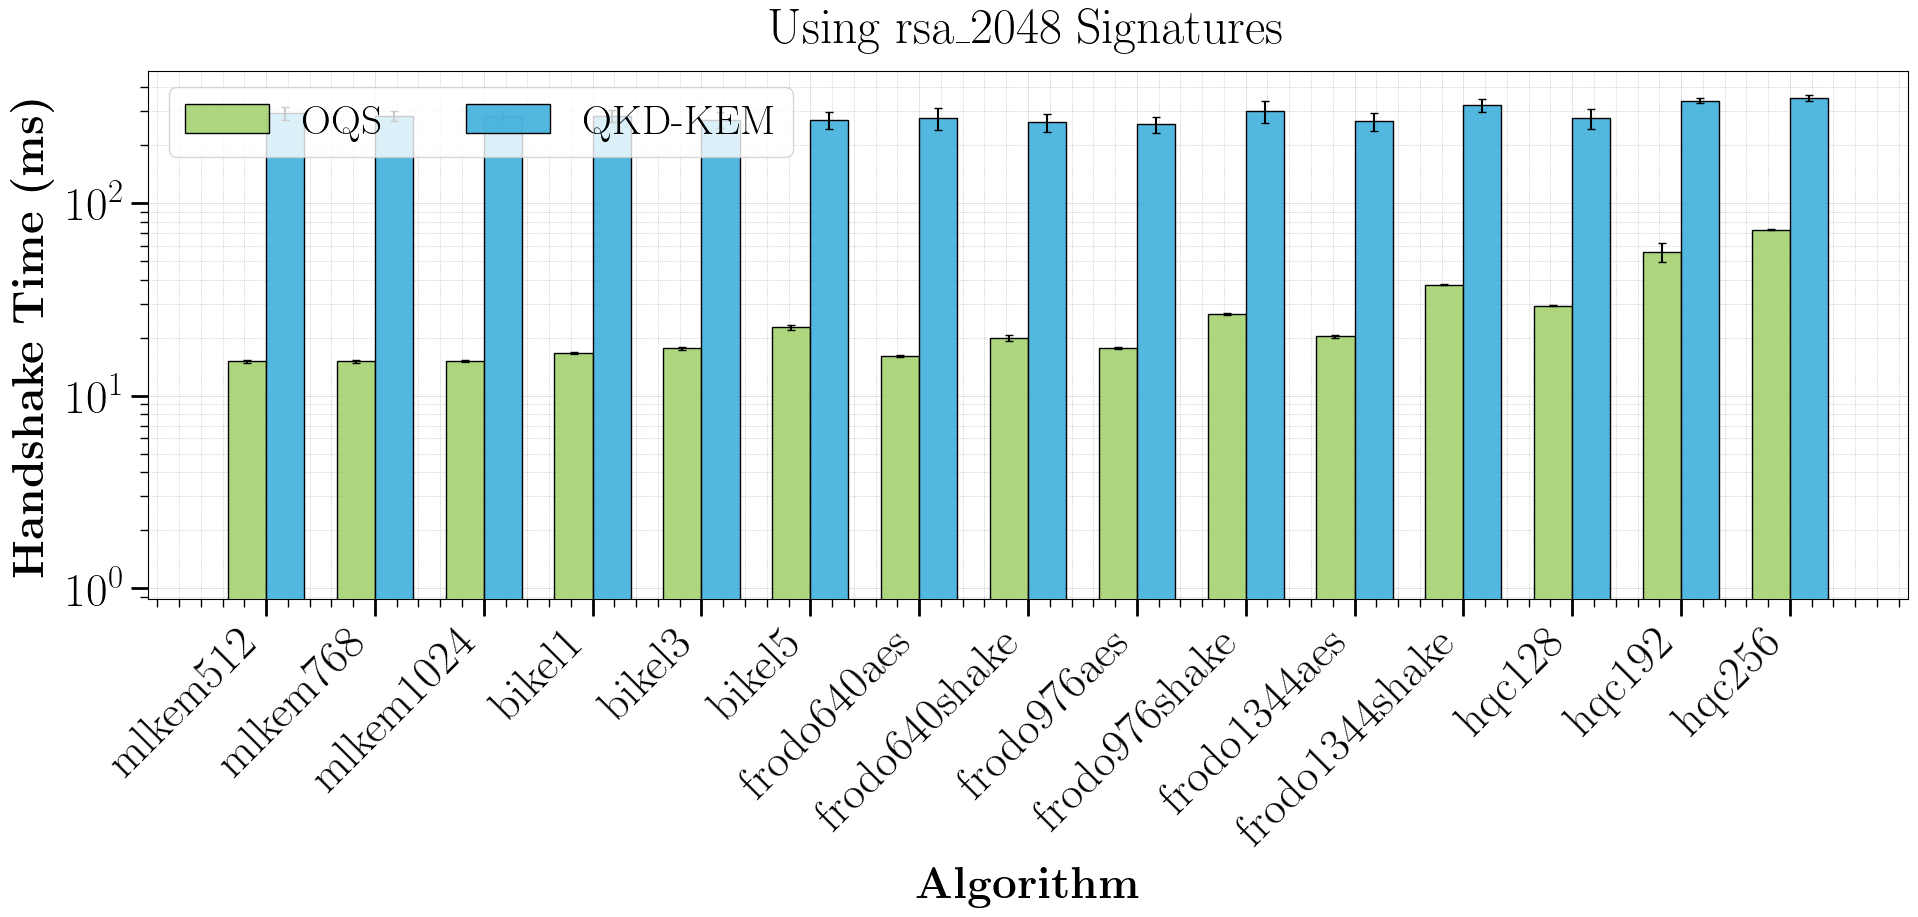

In [9]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', log_scale=True, plot_title='cerberis_CH_OFF_tls_kems_comparison_rsa2048_log.pdf')

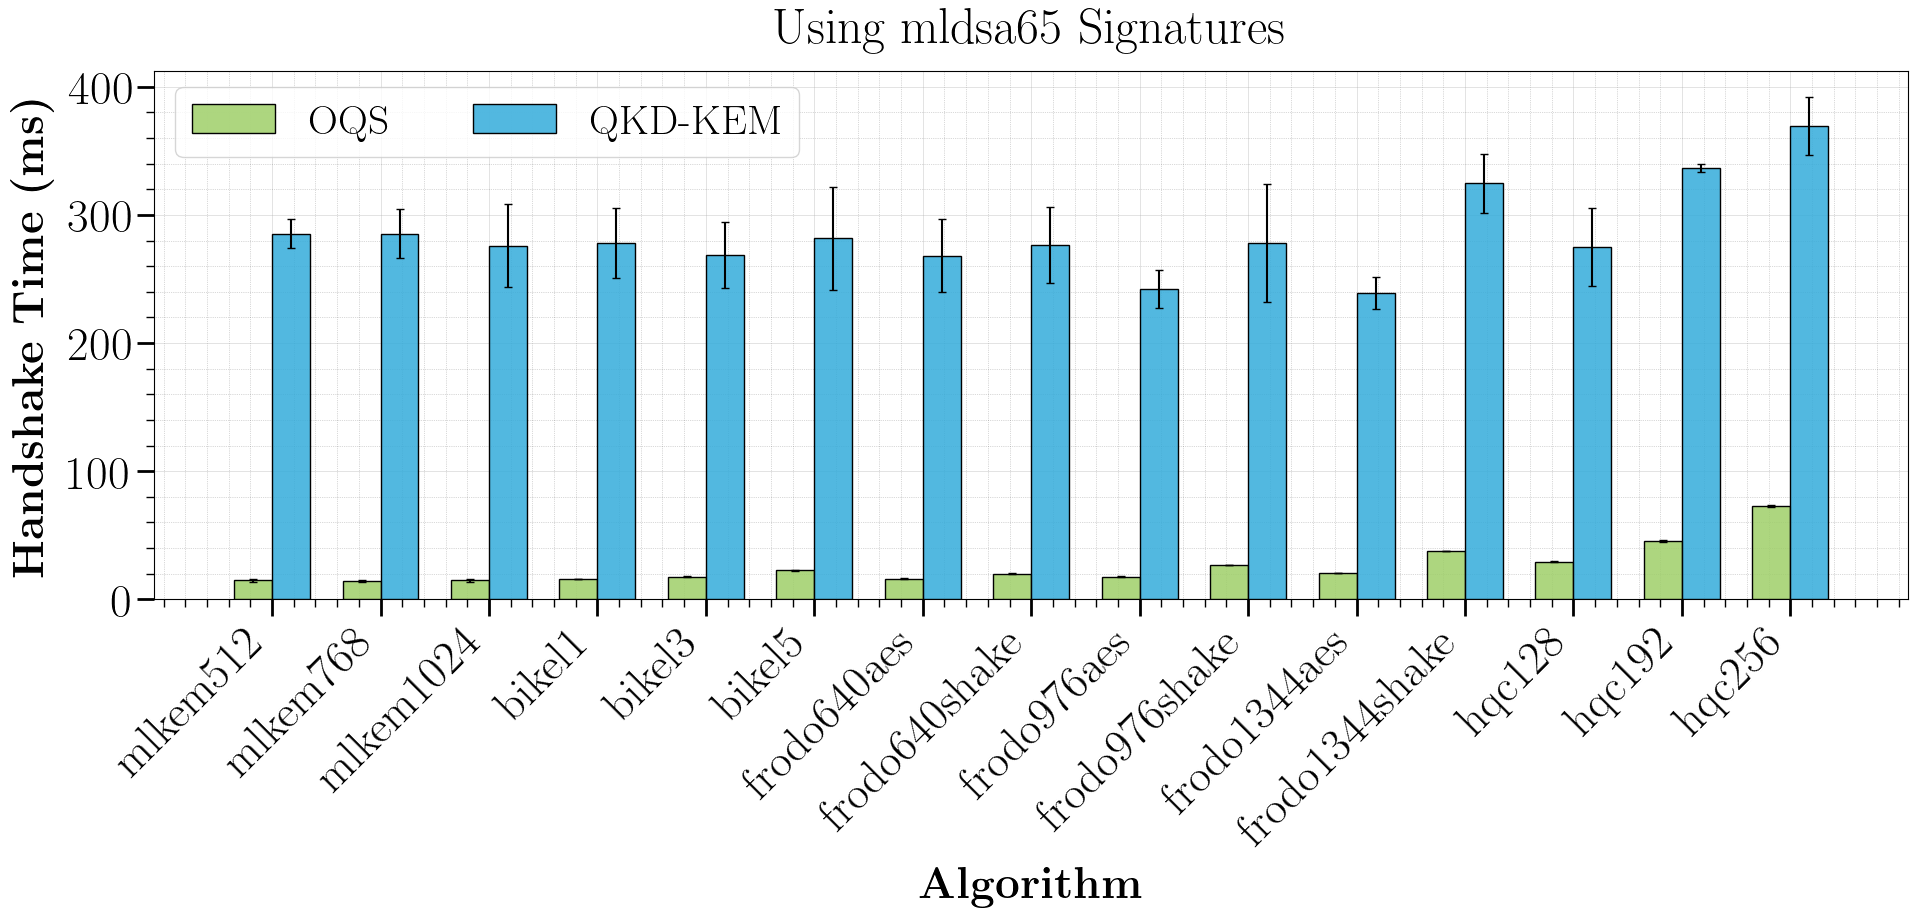

In [10]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='cerberis_CH_OFF_tls_kems_comparison_mldsa65.pdf')

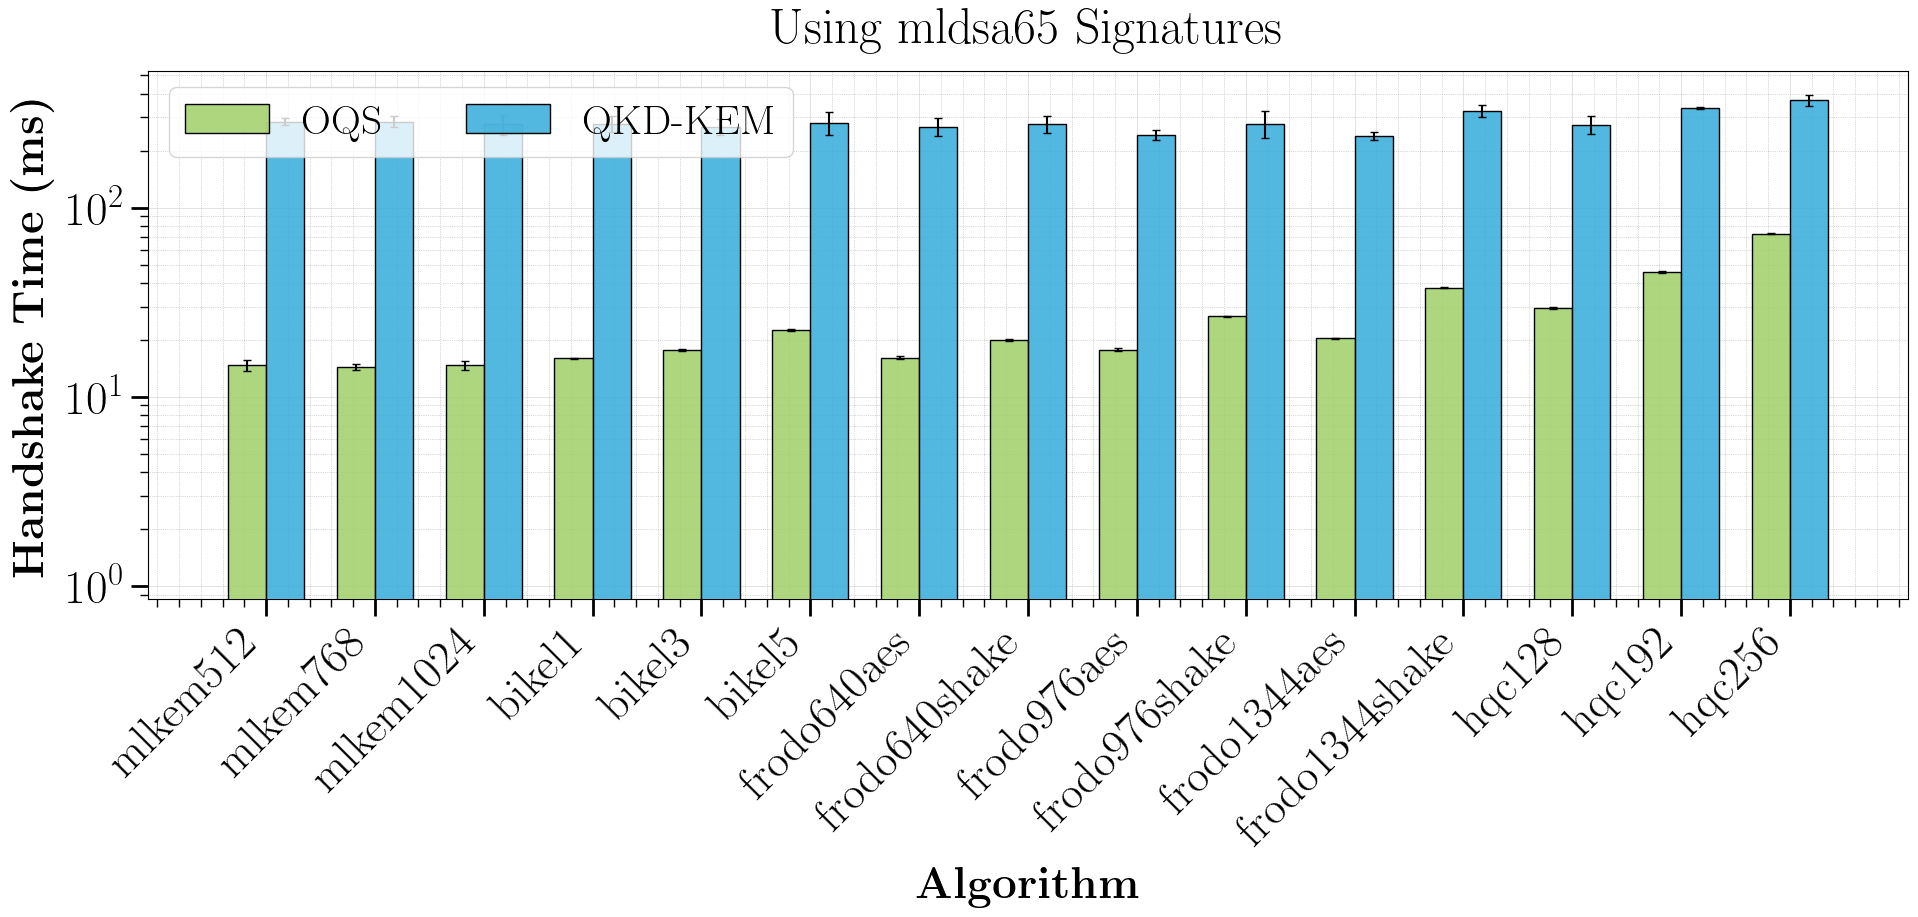

In [11]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', log_scale=True, plot_title='cerberis_CH_OFF_tls_kems_comparison_mldsa65_log.pdf')

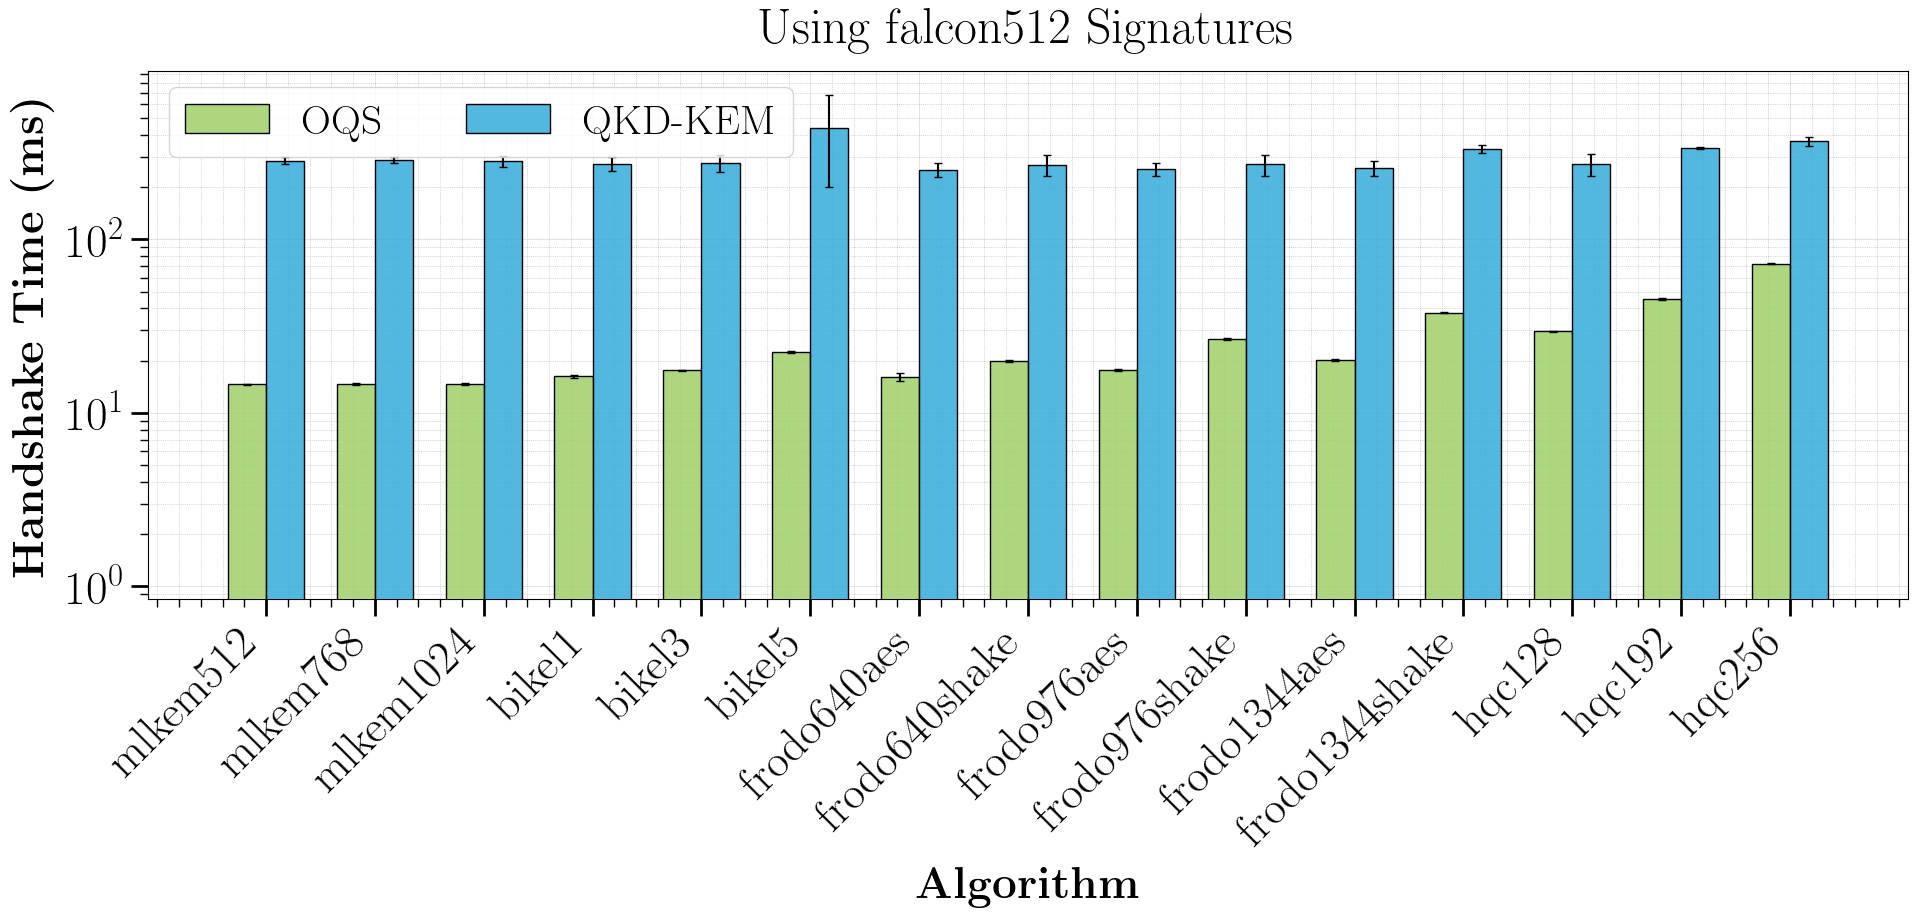

In [12]:
plot_tls_kem_families(input_df=merged_df, cert_type='falcon512', log_scale=True, plot_title='cerberis_CH_OFF_tls_kems_comparison_falcon512_log.pdf')

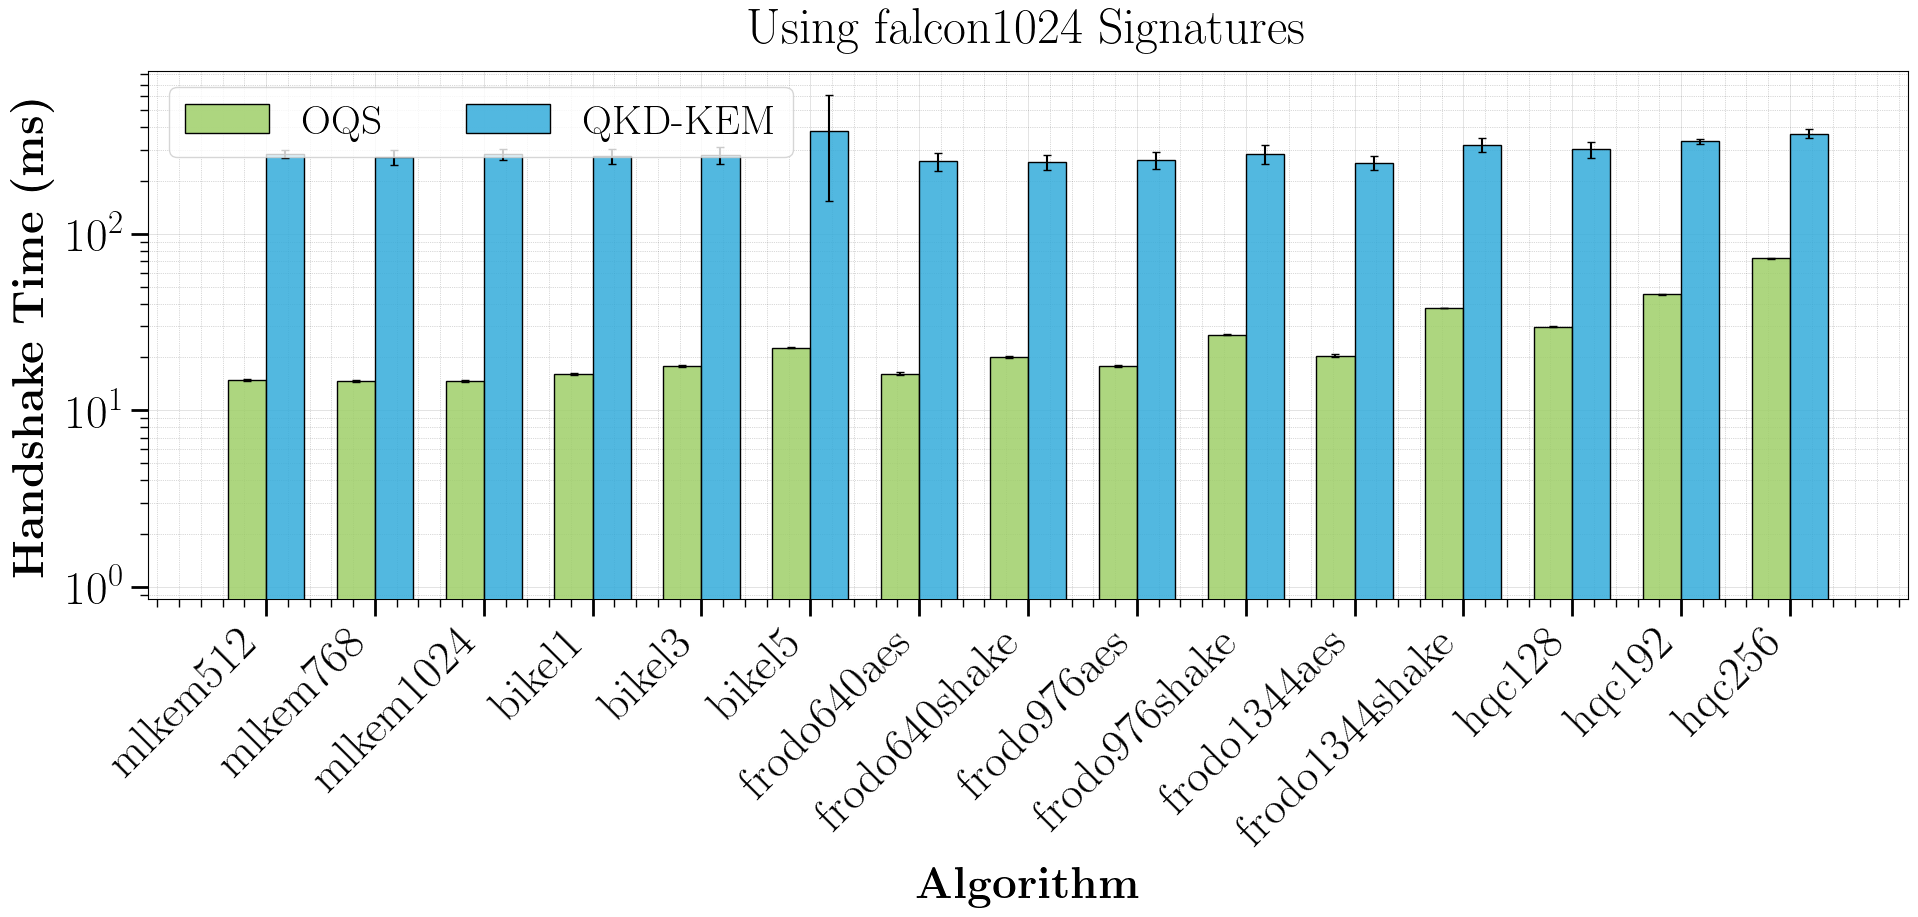

In [13]:
plot_tls_kem_families(input_df=merged_df, cert_type='falcon1024', log_scale=True, plot_title='cerberis_CH_OFF_tls_kems_comparison_falcon1024_log.pdf')